In [1]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   
from scipy.stats import spearmanr
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pylab
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('mypresentation')

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

In [3]:
from load_data import *

smt contain info about all z=0 CLs' mass at different epoch
 merger (calc by r200m) contain T/F info about whether CL experienced merger after a=?
groupbyz0id.get_group(CLno) gives all info for CLno mass(z)
allelldata, 85*15, 85 CLs, [0] is CL id, following 3D gas ell at rlist r500c
e.g. allelldata[:,0] gives all CLids, in increasing number order
 allelldata[?,4] gives CL? ell at rlist[4]=0.3 r500c


In [4]:
print allz0id
print np.unique(df_new['mergers']['z0_parent_id'])
print set(allz0id)-set(np.unique(df_new['mergers']['z0_parent_id']))
noinfoCL=list(set(allz0id)-set(np.unique(df_new['mergers']['z0_parent_id'])))
print noinfoCL


[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  229.  248.  284.  298.  434.  471.
  732.]
[  1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  19  21
  23  25  26  27  29  31  32  33  34  35  39  42  44  45  49  50  53  54
  55  59  61  63  64  65  66  68  69  71  73  74  77  78  79  80  81  82
  83  85  86  88  91  96  98 104 106 108 118 125 131 132 135 138 140 146
 153 156 161 175 201 217 221 229 248 250 284 298 314 434 471 732]
set([8.0, 200.0, 100.0, 149.0, 223.0])
[8.0, 200.0, 100.0, 149.0, 223.0]


In [5]:
# allelldata[:,9]
print rlist[9]
print np.where(allelldata[:,0]==21)
print allelldata[17,9]

0.8
(array([17]),)
0.90023


In [6]:
print np.where(allelldata[:,0]==34)

(array([26]),)


In [7]:
df_new['mergers'][(df_new['mergers']['merger_aexp']>0.7)&\
                   (df_new['mergers']['z0_parent_id']==3)]

z0_parent_id  merger_aexp  main_line_id  merging_id  mass_ratio  \
90              3       0.9265            39         134    0.064765   
91              3       0.9265            39         972    0.007602   
92              3       0.9265            39         134    0.064765   
93              3       0.8514             7         559    0.012206   
94              3       0.8264            63         613    0.026533   
95              3       0.8514             7         920    0.029522   
96              3       0.8264            63         613    0.026533   
97              3       0.7511            30         648    0.030879   
98              3       0.7780            11         598    0.026663   
99              3       0.7780            11        2784    0.020049   
100             3       0.7511            30         330    0.024406   
101             3       0.7511            30         648    0.030879   
102             3       0.7015            72         121    0.012195   
103             3       0.7015            72         324    0.053589   
104             3       0.7015            72        1438    0.023323   

     impact_parameter  track_merging_aexp  num_shared_particles  
90         901.624289              0.9510                 69934  
91         169.833559              0.9510                  9337  
92         901.624289              0.9265                  5016  
93         476.089177              0.8514                  9243  
94         788.743923              0.8514                 30795  
95         460.619409              0.8514                  2891  
96         788.743923              0.8264                  3429  
97         732.094792              0.7780                 43010  
98         943.078784              0.7780                  3981  
99         662.025693              0.7780                  2816  
100        325.704045              0.7511                 19400  
101        732.094792              0.7511                  4700  
102        561.490688              0.7015                  7842  
103        594.338792              0.7015                 31505  
104        438.585367              0.7015                 15057

In [8]:
df_new['mergers'][(df_new['mergers']['merger_aexp']>0.7)&\
                   (df_new['mergers']['z0_parent_id']==34)]

z0_parent_id  merger_aexp  main_line_id  merging_id  mass_ratio  \
1130            34       0.8264           293         112    0.305022   
1131            34       0.8011           103          16    0.619037   
1132            34       0.8011           103         511    0.022020   
1133            34       0.8011           103        3818    0.017930   
1134            34       0.7780           395         494    0.603229   
1135            34       0.7780           395        1569    0.015090   
1136            34       0.7511           392         658    0.043495   
1137            34       0.7511           392        3980    0.013919   
1138            34       0.7263           140         970    0.032201   
1139            34       0.7263           140        2401    0.020816   
1140            34       0.7015           316         969    0.069356   
1141            34       0.7015           316        3452    0.023362   

      impact_parameter  track_merging_aexp  num_shared_particles  
1130        530.000033              0.8264                 54645  
1131        411.427164              0.8011                 40340  
1132        513.466439              0.8011                  4117  
1133        517.097037              0.8011                   773  
1134        418.829653              0.7780                  2064  
1135        336.045487              0.7780                   243  
1136        656.051024              0.7511                  5648  
1137        515.986353              0.7511                  1903  
1138        675.039331              0.7263                   202  
1139        334.757050              0.7263                  2087  
1140        900.396517              0.7015                  2814  
1141        681.111492              0.7015                  2438

#### Calculate Gamma over a specific time range

In [50]:
a=0.7
acutgamma=a
Gamma=calc_Gamma(acutgamma,Mdef='M_total_200m')

default definition is M_total_200m


In [21]:
print M500c[np.where(allz0id==21)]
print Gamma[np.where(allz0id==98)]

[  4.25800000e+14]
[ 3.34882867]


### plot radius vs. ell

In [22]:
# mask=[]
# gammabins=np.arange(Gamma.min(),Gamma.max(),1.)
# for i in range(len(gammabins)-1):
#     mask.append((Gamma<gammabins[i+1])&(Gamma>gammabins[i]))
# print len(mask)

# cnorm_gamma=colors.Normalize(vmin=Gamma.min(),vmax=Gamma.max())
# scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# for jm in range(len(mask)):
#     med=[];up=[];down=[]
#     print 'sample size:',np.sum(mask[jm])
#     color=scalarmap_gamma.to_rgba(jm+1)
#     for i in range(1,len(rlist)):
#         tmpdata=allelldata[mask[jm]][:,i]
#         ellmed=np.percentile(tmpdata[~np.isnan(tmpdata)],50)
#         ellup=np.percentile(tmpdata[~np.isnan(tmpdata)],88)
#         elldown=np.percentile(tmpdata[~np.isnan(tmpdata)],12)
#         med.append(ellmed); up.append(ellup); down.append(elldown)
#     med=np.array(med); up=np.array(up); down=np.array(down)
#     print len(med),len(up),len(down)
#     plt.errorbar(rlist[1:],med,yerr=[med-down,up-med],c=color,label=r'$\Gamma_{200m}$ '+str(gammabins[jm])+'-'+str(gammabins[jm+1]))
# plt.legend()
# plt.xlabel('r/r500c')
# plt.ylabel('c/a')
# plt.title(r'3D gas ellipticity $\Gamma$ (a='+str(np.around(a,decimals=2))+'~1)')
# plt.savefig('figures/gamma_'+str(a)+'_3D_gas_ell_vs_r_r500c_errorbar.eps')

# plt.show()

#### Plot Spearmann coefficient:

### whole sample 
filter_whole

In [9]:
filt=(allz0id==np.array(noinfoCL))
print filt
for unid in noinfoCL:
    filt=filt|(allz0id==unid)
filter_whole=~filt
print filter_whole
print allz0id[filter_whole]


False
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True]
[   1.    2.    3.    4.    5.    6.    7.    9.   10.   11.   13.   14.
   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.   32.
   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.   55.
   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.   79.
   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  104.  106.
  108.  125.  131.  132.  135.  140.  146.  153.  156.  161.  175.  201.
  217.  229.  248.  284.  298.  434. 

/Users/hqchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [10]:
# df_new['mergers'][(df_new['mergers']['mass_ratio']>0.33) & (df_new['mergers']['merger_aexp']>0.7)]

#### filter major minor merger

In [11]:
Gammadef='200m'
acutgamma=0.7
Gamma=calc_Gamma(acutgamma,Mdef='M_total_'+Gammadef)

acutmerger=0.7 # within 0.7-1 no major merger

# mr=3 #merger mass ratio
# selectid=merger['z0_parent_id'][~(merger['1:'+str(mr)+' after a='+str(acutmerger)])]
# selectid=list(set(selectid))

majormergerid=np.unique(df_new['mergers']['z0_parent_id']\
                [(df_new['mergers']['mass_ratio']>0.33) & (df_new['mergers']['merger_aexp']>0.7)])

minormajormergerid=np.unique(df_new['mergers']['z0_parent_id']\
                [(df_new['mergers']['mass_ratio']>0.16) & (df_new['mergers']['merger_aexp']>0.7)])
minormergerid=set(minormajormergerid)-set(majormergerid)

print majormergerid

#selectid: without major merger (>1:3)
selectid=list(set(allz0id)-set(majormergerid))

#sid: very smooth accretion, without even minor merger (1:6)
sid=set(allz0id)-set(minormajormergerid)

default definition is M_total_200m
[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]


In [12]:
print df_new['mergers']

      z0_parent_id  merger_aexp  main_line_id  merging_id  mass_ratio  \
0                1       0.8783             5         496    0.016654   
1                1       0.8783             5         496    0.016654   
2                1       0.8514            11         421    0.114087   
3                1       0.8264             4         925    0.019100   
4                1       0.8264             4        2854    0.012873   
5                1       0.8011            17         539    0.022337   
6                1       0.8011            17        2192    0.018633   
7                1       0.7780            12        1127    0.036574   
8                1       0.7780            12        2744    0.013568   
9                1       0.7511             5         180    0.017231   
10               1       0.7511             5        1036    0.012428   
11               1       0.7015             2        5416    0.013102   
12               1       0.6750             6      

In [13]:
print df_new['mergers']['merger_aexp'][(df_new['mergers']['mass_ratio']==np.max(df_new['mergers']['mass_ratio']))]

2726    0.3001
Name: merger_aexp, dtype: float64


### exclude mergers

In [12]:
filt=(allz0id==minormajormergerid[0])
for unid in list(minormajormergerid)+noinfoCL:#+[8,200,100,223]:
    filt=filt|(allz0id==unid)
filter_relax=~filt
print sum(filter_relax)
print filter_relax, allz0id

28
[ True  True  True False False  True False False False False False False
  True  True  True False False  True False False  True  True  True False
  True False False False  True  True  True False False False False  True
 False False False False  True False False  True False False False False
 False False False  True  True  True  True False False False False False
  True False False False False False  True  True False False False False
 False  True False False False False  True False False False False False
  True] [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  22

default definition is M_total_200m
SpearmanrResult(correlation=-0.38149972632731255, pvalue=0.045160296096053106)
SpearmanrResult(correlation=-0.18390804597701149, pvalue=0.34885827222813293)
SpearmanrResult(correlation=-0.10618500273672687, pvalue=0.59072523516915931)
SpearmanrResult(correlation=0.025725232621784347, pvalue=0.89661381460959777)
SpearmanrResult(correlation=0.15927750410509031, pvalue=0.41818205735191605)
SpearmanrResult(correlation=0.09414340448823208, pvalue=0.6337121100027221)
SpearmanrResult(correlation=-0.013136288998357963, pvalue=0.94710375477246356)
SpearmanrResult(correlation=-0.070060207991242476, pvalue=0.72314596046837054)
SpearmanrResult(correlation=-0.027371014352392371, pvalue=0.89003801554727091)
SpearmanrResult(correlation=0.012588943623426383, pvalue=0.94930491103293768)
SpearmanrResult(correlation=0.034482758620689655, pvalue=0.86170978878804561)
default definition is M_total_200m
SpearmanrResult(correlation=-0.12370005473453749, pvalue=0.530572483885

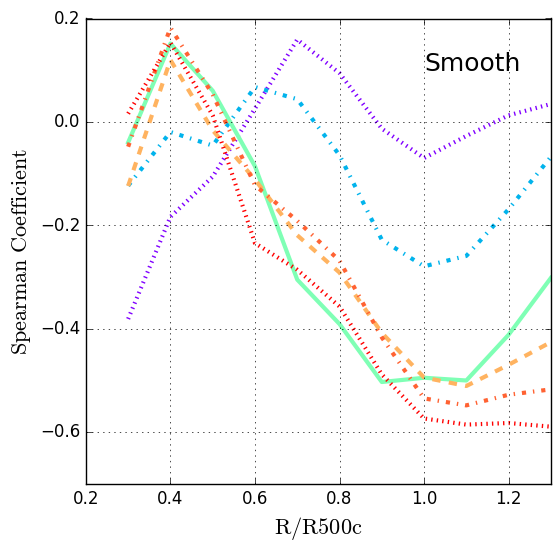

In [13]:
plt.figure(figsize=(6,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)
# lsty=[':','-.','--','-','-','--','-.',':']
# lwd=[2,2,2,2,1.5,1.5,1.5,1.5]
lsty=[':','-.','-','--','-.',':']
for ig,spco_acutgamma in enumerate([0.5,0.6,0.7,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma,Mdef='M_total_200m')[filter_relax]
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[filter_relax][:,spco_ir]
        r_spco.append(rlist[spco_ir])
        print spearmanr(spco_Gamma,spco_ell_r500c)
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.plot(r_spco,spco,lw=3,ls=lsty[ig],c=color)
#         plt.plot(r_spco,spco,label=str(spco_acutgamma),ls=lsty[ig],c=color)

# leg = plt.legend(ncol=2)
# leg.set_title(r'$\Gamma_{200m} \rm \ definition$', prop = {'size':'x-large'})

# plt.title(r'$\rm exclude \   all \ merger \ clusters$')
plt.xlabel(r'$\rm R/R500c$')
plt.ylabel(r'$\rm Spearman \ Coefficient$')
# plt.ylabel('spearman coef (3D ell vs Gamma)')
plt.annotate('Smooth',(1.0,0.1),fontsize=18)


plt.xlim([0.2,1.3])
plt.ylim([-0.7,0.2])
plt.grid()

plt.savefig('spearman_coef_R_r200m_ex_all_merger.png')
plt.savefig('spearman_coef_R_r200m_ex_all_merger.eps')

plt.show()

default definition is M_total_200m
[-0.10112052 -0.03834211 -0.05012586 -0.0082206  -0.03596926  0.08476524
  0.11811368  0.15299717  0.11423295  0.15114132  0.1322071 ]
default definition is M_total_200m
[-0.12190851 -0.03606118 -0.08453518 -0.12297358  0.01271123  0.08090358
 -0.00145006  0.11090133 -0.00091671  0.05887664  0.08774522]
default definition is M_total_200m
[-0.11855035 -0.06180883 -0.10656399 -0.16878035 -0.08433768 -0.04732854
 -0.10972531 -0.07501231 -0.06561929 -0.06537557 -0.00876773]
default definition is M_total_200m
[-0.22836348 -0.19247686 -0.17340519 -0.22749094 -0.22765262 -0.14499891
 -0.1707277  -0.1937465  -0.21884898 -0.12739707 -0.13819804]
default definition is M_total_200m
[-0.26447694 -0.12565882 -0.16017399 -0.13803626 -0.11733954  0.13632445
 -0.10854876 -0.10925635 -0.09664004 -0.08949384 -0.00172352]
default definition is M_total_200m
[-0.16237702 -0.05553428  0.00599064 -0.03727923 -0.00414495  0.05162623
  0.01413461 -0.06096543 -0.01935572 -0.02

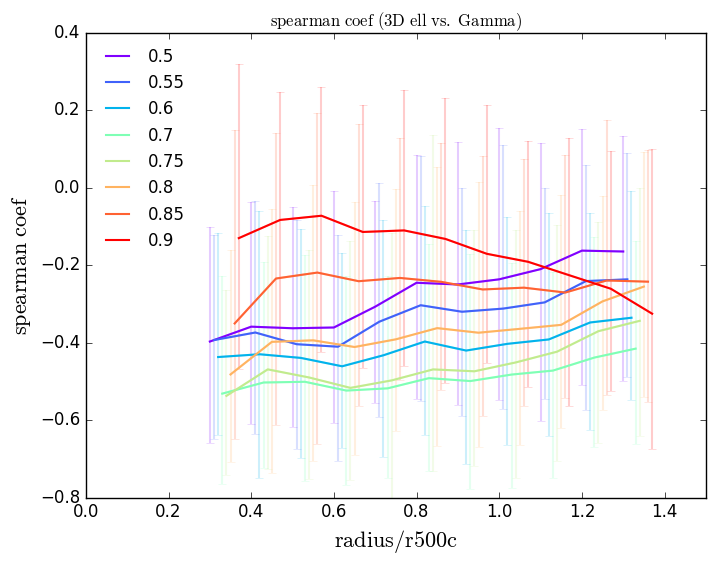

In [14]:
plt.figure(figsize=(8,6))
cnorm_gamma=colors.Normalize(vmin=0.5,vmax=0.9)
scalarmap_gamma=cm.ScalarMappable(norm=cnorm_gamma,cmap=cm.rainbow)


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    spco_up=[];spco_lo=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
        tmpspearmanr=[]
        for j in range(500):
            index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
            subsampleGamma=[spco_Gamma[i] for i in index]
            subsampleell=[spco_ell_r500c[i] for i in index]
            tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
        spco_up.append(max(tmpspearmanr)),spco_lo.append(min(tmpspearmanr))
    spco=np.array(spco);spco_up=np.array(spco_up);spco_lo=np.array(spco_lo);r_spco=np.array(r_spco)
    print spco_up
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    plt.errorbar(r_spco+0.01*irun,spco,yerr=[spco-spco_lo,spco_up-spco],alpha=0.2,c=color)
    


for irun,spco_acutgamma in enumerate([0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9]):
    spco_Gamma=calc_Gamma(spco_acutgamma)
    spco=[]
    r_spco=[]
    rindex=[4,5,6,7,8,9,10,11,12,13,14]
    for spco_ir in rindex:
        spco_ell_r500c=allelldata[:,spco_ir]
        r_spco.append(rlist[spco_ir])
        spco.append(spearmanr(spco_Gamma,spco_ell_r500c)[0])
    color=scalarmap_gamma.to_rgba(spco_acutgamma)
    r_spco=np.array(r_spco)
    plt.plot(r_spco+0.01*irun,spco,c=color,label=str(spco_acutgamma))
    plt.legend()
plt.xlim([0,1.5])
plt.ylim([-0.8,0.4])


plt.xlabel(r'$\rm radius/r500c$')
plt.ylabel(r'$\rm spearman \ coef$')
plt.title(r'$\rm spearman \ coef \ (3D \ ell \ vs. \ Gamma)$')
plt.savefig('spearman_coef_err.png')
plt.savefig('spearman_coef_err.eps')
plt.savefig('spearman_coef_err.pdf')
plt.show()

#### plot Gamma vs. c/a at certain r

In [31]:
# plt.scatter(Gamma,ell_r500c)
# for i, txt in enumerate(allz0id):
#     txt=str(int(txt))
#     plt.annotate(txt, (Gamma[i],ell_r500c[i]))
# plt.ylim([0.2,1])
# plt.xlim([0,max(Gamma)+0.5])
# plt.xlabel(r'$\Gamma_{200m} \left(a=%.2f - 1\right)$'%np.around(a,decimals=2))
# plt.ylabel(r'$c/a \ \left(r=%.2f  \ r_{500c}\right)$'%rlist[ir])
# plt.annotate('spearmanr='+str(np.around(spearmanr(Gamma,ell_r500c)[0],4)),(0,0.3))

# print pearsonr(Gamma,ell_r500c)
# print spearmanr(Gamma,ell_r500c)


# tmpspearmanr=[]
# for j in range(500):
#     index=np.random.choice(len(allz0id),int(len(allz0id)*0.9))
#     subsampleGamma=[Gamma[i] for i in index]
#     subsampleell=[ell_r500c[i] for i in index]
#     # print 'quiet Gamma~ell pearson',pearsonr(subsampleGamma,subsampleell)
#     tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
# print max(tmpspearmanr),min(tmpspearmanr)
# plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# # plt.savefig('Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
# plt.savefig('tmp.eps')

# plt.show()



In [14]:
print majormergerid

[  4   5   7  10  11  17  23  25  34  35  45  49  50  53  55  61  66  78
  79  80  81  91  96 118 131 138 146 153 156 217 221 250 284 298 434 471]


In [15]:
# mergerdef='200m'
# merger=pd.read_csv('../data/mergers_'+mergerdef+'.csv')

In [12]:
print np.where(allz0id==81)
print M500c[50]

(array([50]),)
3.507e+14


In [13]:
ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

0.8


### load new observables

In [14]:
cl,myLxnogc=np.loadtxt('../data/Lxlist_gascentercut.txt',unpack=True)
cl,myLxtotal=np.loadtxt('../data/Lxlist_tot.txt',unpack=True)
cl,myLxnosub=np.loadtxt('../data/Lxlist_bulk.txt',unpack=True)


cl,myTxnogc=np.loadtxt('../data/Txlist_gascentercut.txt',unpack=True)
myTxnogc=myTxnogc/1.16e7
cl,myTxtotal=np.loadtxt('../data/Txlist_tot.txt',unpack=True)
myTxtotal=myTxtotal/1.16e7



z0idnew=[]

for i,idnew in enumerate(ids_90):
    if idnew in allz0id[filter_whole]:
        z0idnew.append(idnew)


print z0idnew
Gammadef='200m'
acutgamma=0.7
Gamma=calc_Gamma(acutgamma,Mdef='M_total_'+Gammadef)

ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

irin=4
inner_ell=allelldata[:,irin]
irout=9
outer_ell=allelldata[:,irout]

Gamma_new=[]
ell_r500c_new=[]
Mtot500c_new=[]
Mtot200m_new=[]
Yx_new=[]
myTxnogascore=[]
myTxtot=[]
myLxnogascore=[]
myLxtot=[]
myLxbulk=[]



fnt=[]
Tx500cEz_tot=[]
Tx500cEz_tot_nocore=[]
Tx500cEz_bulk=[]
Tx500cEz_bulk_nocore=[]

Lx500cEz_tot=[]
Lx500cEz_tot_nocore=[]
Lx500cEz_bulk=[]
Lx500cEz_bulk_nocore=[]

M500c_new=[]
Mgas500c=[]
Mhse500c=[]

inner_ell_new=[]
outer_ell_new=[]
for ids in z0idnew:
    #old database

    i=np.where(allz0id==ids)[0][0]   
    Gamma_new.append(Gamma[i])
    ell_r500c_new.append(ell_r500c[i])
    inner_ell_new.append(inner_ell[i])
    outer_ell_new.append(outer_ell[i])
    Mtot500c_new.append(Mtot500c[i])
    Mtot200m_new.append(Mtot200m[i])
    myLxtot.append(myLxtotal[i])
    myLxnogascore.append(myLxnogc[i])
    myLxbulk.append(myLxnosub[i])
    myTxtot.append(myTxtotal[i])
    myTxnogascore.append(myTxnogc[i])
    Yx_new.append(Yx[i])
    

    #new database
    j=np.where(ids_90==ids)[0][0]
    fnt.append(fnt_90[j])
    Tx500cEz_tot.append(Tx500cEz_tot_90[j])
    Tx500cEz_tot_nocore.append(Tx500cEz_tot_nocore_90[j])
    Tx500cEz_bulk.append(Tx500cEz_bulk_90[j])
    Tx500cEz_bulk_nocore.append(Tx500cEz_bulk_nocore_90[j])
    
    
    Lx500cEz_tot.append(Lx500cEz_tot_90[j])
    Lx500cEz_tot_nocore.append(Lx500cEz_tot_nocore_90[j])
    Lx500cEz_bulk.append(Lx500cEz_bulk_90[j])
    Lx500cEz_bulk_nocore.append(Lx500cEz_bulk_nocore_90[j])    
    
    M500c_new.append(M500c_90[j])
    Mgas500c.append(Mgas500c_90[j])
    Mhse500c.append(Mhse500c_90[j])
    
Mhse500c=np.array(Mhse500c)
Mgas500c=np.array(Mgas500c)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 21.0, 23.0, 25.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 39.0, 42.0, 44.0, 45.0, 49.0, 50.0, 53.0, 54.0, 55.0, 59.0, 61.0, 63.0, 65.0, 66.0, 68.0, 69.0, 71.0, 73.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 86.0, 88.0, 91.0, 96.0, 98.0, 104.0, 106.0, 108.0, 125.0, 131.0, 132.0, 135.0, 140.0, 146.0, 153.0, 156.0, 161.0, 175.0, 201.0, 217.0, 229.0, 248.0, 284.0, 298.0, 434.0, 471.0, 732.0]
default definition is M_total_200m
0.8


In [15]:
mergingtime=[]
for icl in z0idnew:
    mr=df_new['mergers'][df_new['mergers']['z0_parent_id']==icl]
    mr=mr[mr['merger_aexp']>0.7]

    if len((mr['merger_aexp'][mr['mass_ratio']>0.33]))<1:
        mergingtime.append(0)
    else:
        tm= (mr['merger_aexp'][mr['mass_ratio']>0.33]).as_matrix().max()
        mergingtime.append(tm)
print mergingtime,len(mergingtime) 

[0, 0, 0, 0.72629999999999995, 0.87829999999999997, 0, 0.92649999999999999, 0, 0.85140000000000005, 0.92649999999999999, 0, 0, 0, 0, 0.87829999999999997, 0, 0, 0.90010000000000001, 0.70150000000000001, 0, 0, 0, 0, 0, 0, 0.80110000000000003, 0.90010000000000001, 0, 0, 0, 0.95099999999999996, 0.82640000000000002, 0.77800000000000002, 0.70150000000000001, 0, 0.87829999999999997, 0, 0.85140000000000005, 0, 0, 0.90010000000000001, 0, 0, 0, 0, 0, 0.82640000000000002, 0.80110000000000003, 0.92649999999999999, 0.92649999999999999, 0, 0, 0, 0, 0, 0.85140000000000005, 0.70150000000000001, 0, 0, 0, 0, 0, 0.77800000000000002, 0, 0, 0, 0.75109999999999999, 0.77800000000000002, 0.92649999999999999, 0, 0, 0, 0.90010000000000001, 0, 0, 0.77800000000000002, 0.80110000000000003, 0.85140000000000005, 0.82640000000000002, 0] 80


In [133]:
Massdef='M_{tot,500c}'
MtotDict={'M_{HSE,500c}':Mhse500c,'M_{gas,500c}':Mgas500c,\
          'M_{tot,500c}':Mtot500c_new, 'M_{tot,200m}':Mtot200m_new}
M=MtotDict[Massdef]
# print Mtot

obsstr='Lx_{bulk,nocore}';
obsDict={'Tx_{tot}':Tx500cEz_tot,\
         'M_{gas,500c}':Mgas500c,\
         'Tx_{tot,nocore}':Tx500cEz_tot_nocore,\
#          'Tx_{tot,nocore}':myTxnogascore,\
         'Tx_{bulk}':Tx500cEz_bulk,'Tx_{bulk,nocore}':Tx500cEz_bulk_nocore,\
        'Yx':Yx_new,\
        'Lx_{tot,nocore}':Lx500cEz_tot_nocore,\
        'Lx_{bulk}':myLxbulk,\
         'Lx_{bulk,nocore}':Lx500cEz_bulk_nocore
        };

obsUnitDict={'Tx_{tot}':'keV','Tx_{tot,nocore}':'keV','Tx_{bulk,nocore}':'keV',\
             'Tx_{bulk}':'keV','Lx_{tot}':'erg/s','Lx_{bulk}':'erg/s',\
             'Lx_{bulk,nocore}':'erg/s','myTx':'keV','Lx_{tot,no gas core}':'erg/s',\
            'Lx_{tot,nocore}':'erg/s','M_{gas,500c}':'M_\odot',\
             'Yx':'keV \ M_\odot'};

obs=obsDict[obsstr]
unitstr=obsUnitDict[obsstr]


In [134]:
np.savetxt('tmp.txt',np.transpose(np.array([M, obs])))

## Plot scaling relation

$$M_{gas}\propto M$$
$$T\propto \Delta^{1/3}M^{2/3}$$
$$L_{bol}\propto \Delta^{7/6}M^{4/3}$$
$$L_{T>2keV}\propto \Delta M$$
$$Y\propto \Delta^{1/3} M^{5/3}$$
### fix slope or not?



In [135]:
from matplotlib.ticker import FormatStrFormatter
def change_tick(ax,fontsize=18):
#     ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
        

slope= 1.11004898651
intercept= 28.3715028543
correlation r_value= 0.859767493621
p_value= 1.7956065719e-24
Standard error of the estimated gradient= 0.0746564777921
scatter from best-fit= 0.111662845198


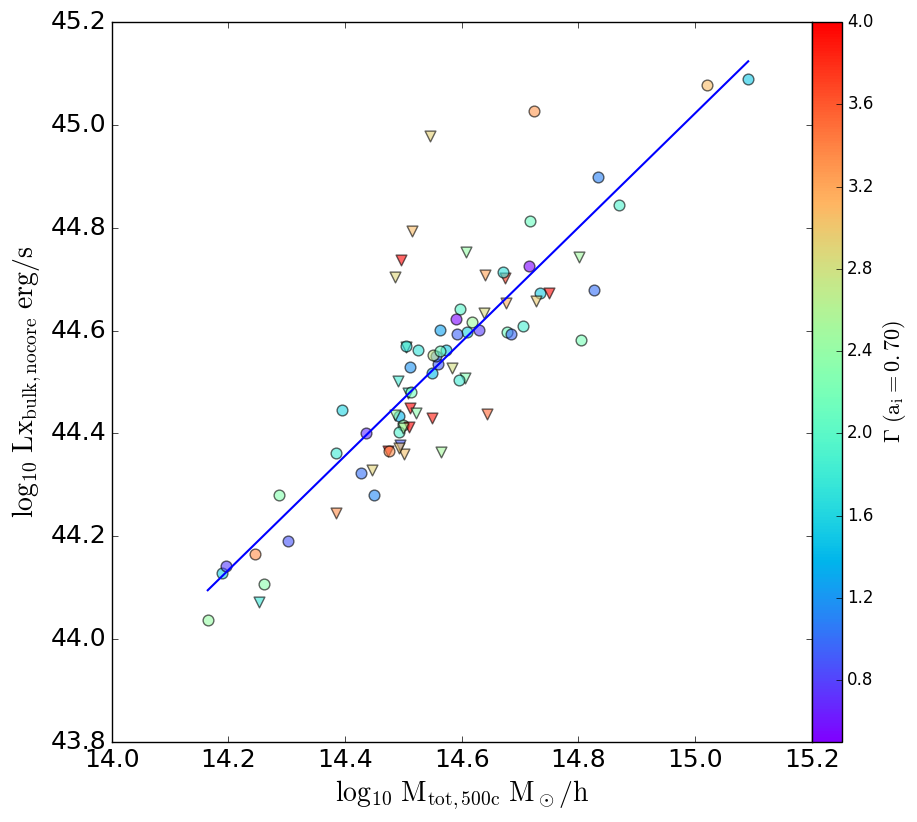

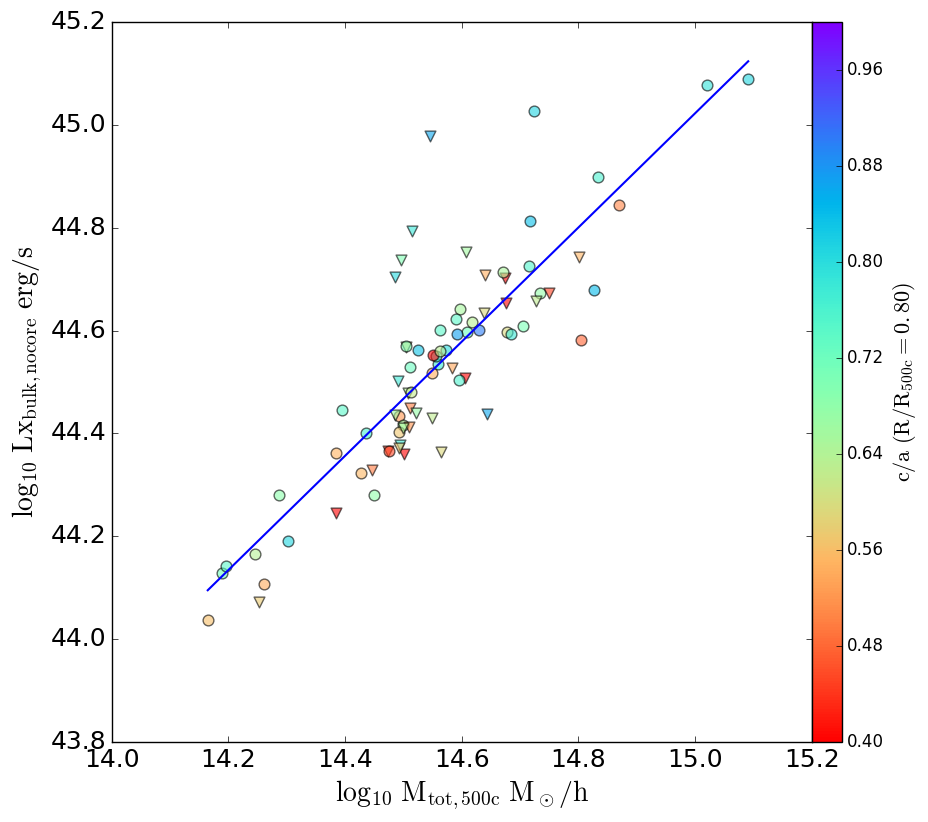

80
SpearmanrResult(correlation=-0.094233473980309429, pvalue=0.40572682556022899)


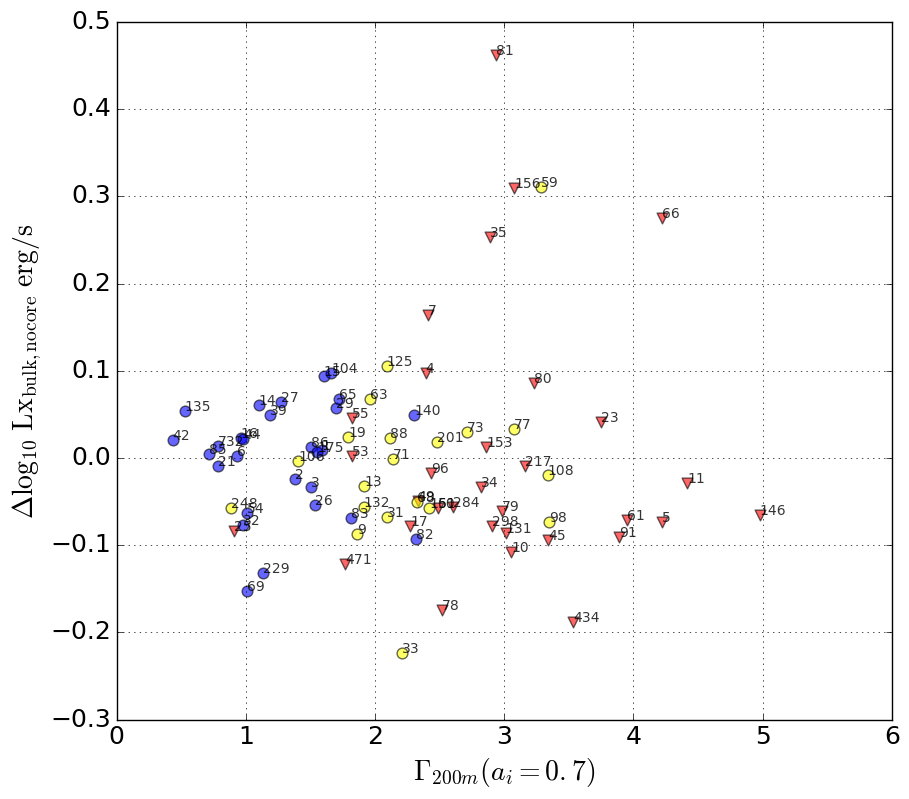

80


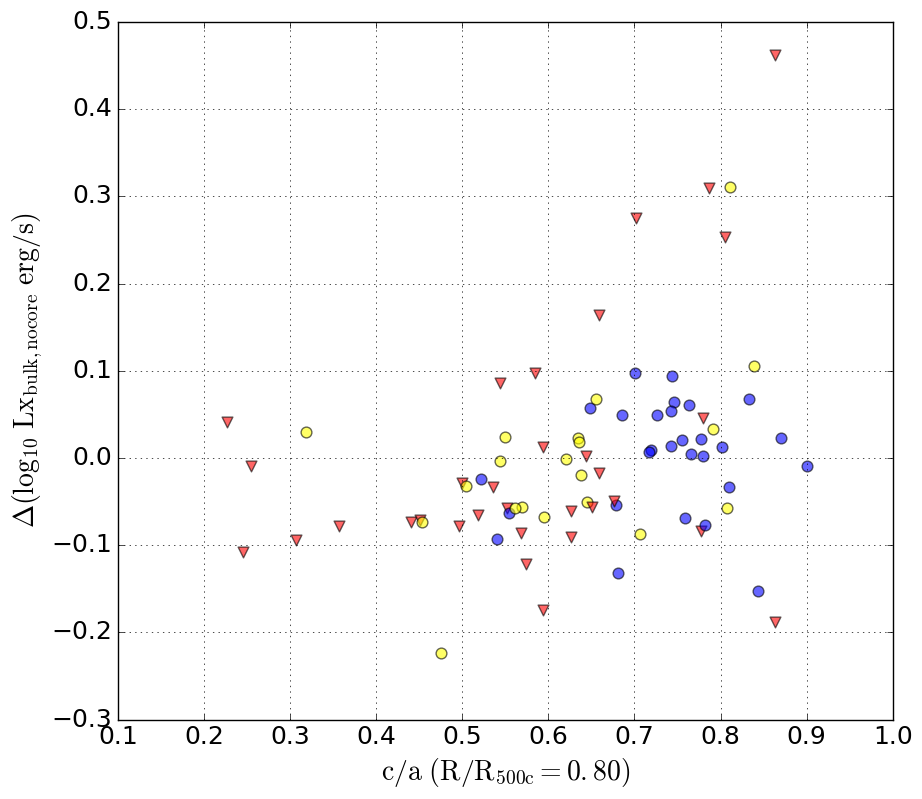

In [136]:
M=np.array(M)
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.log10(M),np.log10(obs))
print 'slope=',slope
print 'intercept=',intercept
print 'correlation r_value=',r_value
print 'p_value=',p_value
print 'Standard error of the estimated gradient=',std_err
line = slope*np.log10(M)+intercept
print 'scatter from best-fit=', (np.sum(((np.log10(obs)-line))**2)/(len(obs)-2))**0.5



fig=plt.figure(figsize=(10,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
# ax.plot(np.log10(M), line)
tm=np.array([M.min(),M.max()])
pltline = slope*np.log10(tm)+intercept
ax.plot(np.log10(tm), pltline)

change_tick(ax)
# ax.plot(np.log10(Mtot[filter_relax]), line_exmajor,'.')


cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapgamma.to_rgba(Gamma_new[i])
    if ids in majormergerid:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=60,alpha=0.6)
    else:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=60,alpha=0.6)
    txt=str(int(z0idnew[i])) 
#     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)
# plt.xlim(14.0,15.2)
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)

plt.ylabel(r'$\rm log_{10} \ %s  \ %s $'%(obsstr,unitstr),fontsize=20)

colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel(r'$\rm \Gamma \ (a_i= %.2f)$'%(np.around(a,decimals=2)))
# plt.savefig('figures/scaling_'+Massdef+'_'+obsstr+'_color_gamma.eps')
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_gamma.png')
# plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_gamma.eps')

plt.show()




fig=plt.figure(figsize=(10,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
# ax.plot(np.log10(M), line)
ax.plot(np.log10(tm), pltline)
change_tick(ax)

cnormell=colors.Normalize(vmin=0.4,vmax=1)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

# xlabels=dict(zip([Massdef,obstr],['M_{HSE,500c}',]))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapell.to_rgba(ell_r500c_new[i])
    if ids in majormergerid:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=60,alpha=0.6)
    else:
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=60,alpha=0.6)
    txt=str(int(z0idnew[i]))
    
#     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)

# plt.xlabel(r'$\rm log10 \ %s \ Msun/h$'%(Massdef))
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)
plt.ylabel(r'$\rm log_{10} \ %s \ %s$'%(obsstr,unitstr),fontsize=20)

colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]))
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.png')
# plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.eps')
plt.show()


plt.figure(figsize=(10,9))


ax=plt.gca()
change_tick(ax)
# plt.yticks(np.arange(-0.2,0.2,0.1))


# plt.xlabel(r"$\Gamma{0}(a={1}\sim 1)$".format(Gammadef,np.around(a,decimals=2)))
plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
plt.ylabel(r'$\rm \Delta log_{10} \ %s \ %s $'%(obsstr,unitstr),fontsize=20)

print len(z0idnew)
spx=[]
spy=[]
DT=[]
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    DT.append(np.log10(obs[i])-line[isubsample])
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=60,alpha=0.6)
        else:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=60,alpha=0.6)
    else:
        plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=60,alpha=0.6)
    txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3)
#     if z0idnew[i]==82:
    plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),\
                     alpha=0.8,fontsize=10)
    spx.append(Gamma_new[i])
    spy.append(np.log10(obs[i])-line[isubsample])
    
print spearmanr(spx,spy)
plt.grid()
plt.savefig('Gamma_'+obsstr+'_deviation.png')
# plt.savefig('Gamma_'+obsstr+'_deviation.eps')

plt.show()


plt.figure(figsize=(10,9))
# plt.xlabel(r"$\Gamma{0}(a={1}\sim 1)$".format(Gammadef,np.around(a,decimals=2)))
plt.xlabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

print len(z0idnew)
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=60,alpha=0.6)
        else:
            plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=60,alpha=0.6)
    else:
        plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=60,alpha=0.6)
    txt=str(int(z0idnew[i])) 
# #     if z0idnew[i]==82:
#     plt.annotate(txt, (ell_r500c_new[i],(np.log10(obs[i])-line[isubsample])),\
#                      alpha=0.8,fontsize=10)
plt.grid()
plt.savefig('coa_'+obsstr+'_deviation.png')
# plt.savefig('coa_'+obsstr+'_deviation.eps')

plt.show()


### plot MHSE vs T
### exclude majormergers

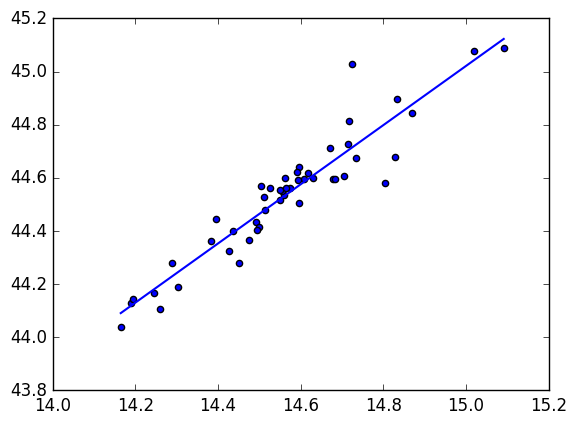

slope= 1.11363357939
intercept= 28.3167843132
correlation r_value= 0.939267978867
p_value= 5.35167151092e-23
Standard error of the estimated gradient= 0.0599931499957
standard deviation from best-fit= 0.0820200270792


In [137]:
M_cutell=[]
G_cutell=[]
obs_cutell=[]

for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    if ids not in majormergerid:
            M_cutell.append(M[i])
            G_cutell.append(Gamma_new[i])
            obs_cutell.append(obs[i])

slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.log10(M_cutell),np.log10(obs_cutell))
M_cutell=np.array(M_cutell)
plt.scatter(np.log10(M_cutell),np.log10(obs_cutell))
  
tm=np.array([M_cutell.min(),M_cutell.max()])
pltline = slope*np.log10(tm)+intercept
plt.plot(np.log10(tm),pltline)
plt.show()  
print 'slope=',slope
print 'intercept=',intercept
print 'correlation r_value=',r_value
print 'p_value=',p_value
print 'Standard error of the estimated gradient=',std_err
line = slope*np.log10(M_cutell)+intercept
print 'standard deviation from best-fit=', (np.sum(((np.log10(obs_cutell)-line))**2)/(len(obs_cutell)-2))**0.5
# print slope*14.6+intercept
# print len(obs_cutell)

In [130]:
0.0568

0.0568

slope= 1.11004898651
intercept= 28.3715028543
correlation r_value= 0.859767493621
p_value= 1.7956065719e-24
Standard error of the estimated gradient= 0.0746564777921
scatter from best-fit= 0.111662845198


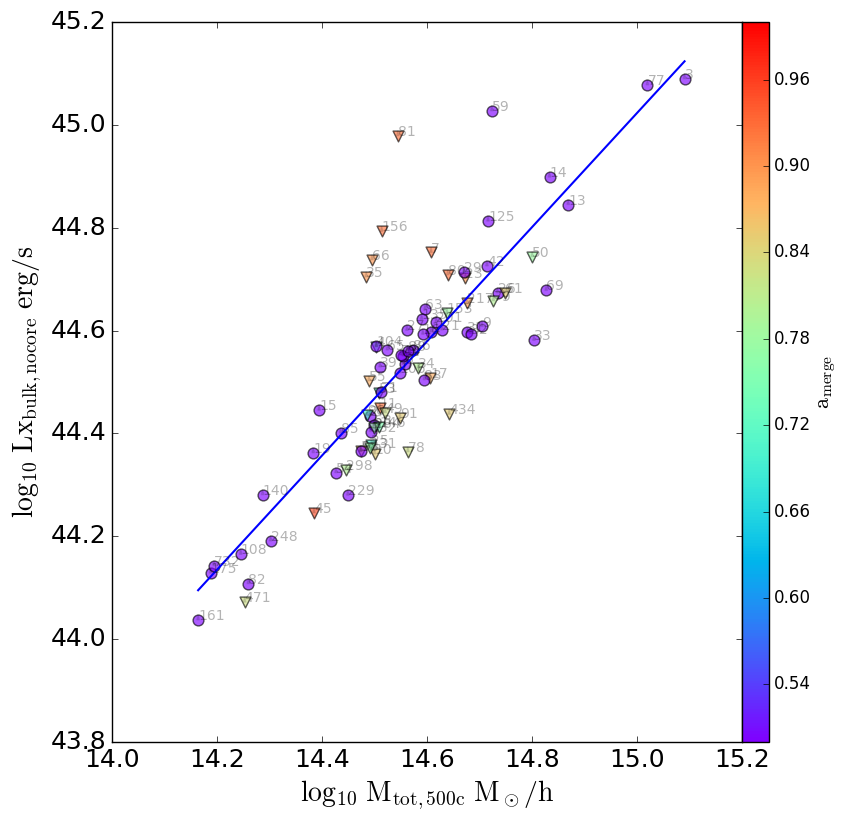

In [138]:
M=np.array(M)
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(np.log10(M),np.log10(obs))
print 'slope=',slope
print 'intercept=',intercept
print 'correlation r_value=',r_value
print 'p_value=',p_value
print 'Standard error of the estimated gradient=',std_err
line = slope*np.log10(M)+intercept
print 'scatter from best-fit=', (np.sum(((np.log10(obs)-line))**2)/(len(obs)-2))**0.5



fig=plt.figure(figsize=(9,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
# ax.plot(np.log10(M), line)
tm=np.array([M.min(),M.max()])
pltline = slope*np.log10(tm)+intercept
ax.plot(np.log10(tm), pltline)

change_tick(ax)
# ax.plot(np.log10(Mtot[filter_relax]), line_exmajor,'.')


cnormgamma=colors.Normalize(vmin=0.5,vmax=1)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
cmap='rainbow'

for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapgamma.to_rgba(mergingtime[i])
    if ids in majormergerid:
#         pass
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=60,alpha=0.6)
        ax.scatter(np.log10(M[i]),np.log10(Lx500cEz_bulk_nocore[i]),c=color,marker='v',s=60,alpha=0.1)
        ax.arrow(np.log10(M[i]), np.log10(obs[i]), 0, np.log10(Lx500cEz_bulk_nocore[i])-np.log10(obs[i]),\
                 head_width=0.005, head_length=0.01, fc='k', ec='k',alpha=0.1)
    else:
            
        ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=60,alpha=0.6)
        ax.scatter(np.log10(M[i]),np.log10(Lx500cEz_bulk_nocore[i]),c=color,s=60,alpha=0.1)
        ax.arrow(np.log10(M[i]), np.log10(obs[i]), 0, np.log10(Lx500cEz_bulk_nocore[i])-np.log10(obs[i]),\
                 head_width=0.005, head_length=0.01, fc='k', ec='k',alpha=0.1)
#     else:
#         ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=60,alpha=0.6)
    txt=str(int(z0idnew[i])) 
    ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)
# plt.xlim(14.0,15.2)
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)

plt.ylabel(r'$\rm log_{10} \ %s  \ %s $'%(obsstr,unitstr),fontsize=20)

colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
# colorb_ax.set_ylabel(r'$\rm \Gamma \ (a_i= %.2f)$'%(np.around(a,decimals=2)))
colorb_ax.set_ylabel(r'$\rm a_{merge}$')


plt.savefig('showshift.png')
plt.show()

In [55]:
df_new['mergers'][(df_new['mergers']['z0_parent_id']==156)\
                  & (df_new['mergers']['merger_aexp']>0.7)]

z0_parent_id  merger_aexp  main_line_id  merging_id  mass_ratio  \
3171           156       0.9265           367         102    0.429704   
3172           156       0.9510           439         364    0.047107   
3173           156       0.9265           367         102    0.429704   
3174           156       0.8783           310        1101    0.014393   
3175           156       0.8264           727        3269    0.011461   
3176           156       0.7780           144        4290    0.016381   
3177           156       0.7511           618         472    0.452341   
3178           156       0.7511           618         595    0.097863   
3179           156       0.7263           962         564    0.108540   
3180           156       0.7263           962         828    0.379845   
3181           156       0.7263           962        1425    0.042848   
3182           156       0.7015          1277        1583    0.151508   
3183           156       0.7015          1277        3081    0.024057   

      impact_parameter  track_merging_aexp  num_shared_particles  
3171        238.662665              0.9510                 91467  
3172       1036.257402              0.9510                   313  
3173        238.662665              0.9265                 19060  
3174        406.404994              0.8783                  1618  
3175        351.605895              0.8264                  1928  
3176        304.660314              0.7780                  2432  
3177        574.859095              0.7511                 33547  
3178        446.193790              0.7511                  7490  
3179        861.428726              0.7263                  1497  
3180        769.792765              0.7263                  3112  
3181        646.620907              0.7263                  2754  
3182        936.291068              0.7015                  2202  
3183        822.006259              0.7015                   208

In [82]:
alist=[0.5,0.6,0.7,0.75,0.8,0.85,0.9]
def plot_Gamma_spearman(yquan,ylabel,subsample='all'):
    spDT=[]
    
    
    for ia,ai in enumerate(alist):
        Gamma_new=[]
        acutgamma=ai
        Gamma=calc_Gamma(acutgamma,Mdef='M_total_200m')

        for ids in z0idnew:
            i=np.where(allz0id==ids)[0][0]
            Gamma_new.append(Gamma[i])
        
        spx=[]
        spy=[]
        plt.figure(figsize=(10,9))
        for isubsample,ids in enumerate(z0idnew):
            i=np.where(z0idnew==ids)[0][0]
            if ids in minormajormergerid:
                if ids in majormergerid:
                    if subsample=='all':
                        spx.append(Gamma_new[i])
                        spy.append(yquan[i])   
                        plt.scatter(Gamma_new[i],yquan[i],c='red',marker='v',s=80,alpha=0.6)
                    else:
                        pass
    #                 plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
                else:
                    if subsample=='all' or subsample=='exmajor':
                        spx.append(Gamma_new[i])
                        spy.append(yquan[i])
                        plt.scatter(Gamma_new[i],yquan[i],c='yellow',s=80,alpha=0.6)
                    else:
                        pass
            else:
                spx.append(Gamma_new[i])
                spy.append(yquan[i])
                plt.scatter(Gamma_new[i],yquan[i],c='b',s=80,alpha=0.6)

            txt=str(int(z0idnew[i])) 
        #     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
        #                      alpha=0.8,fontsize=16)
    #         spx.append(fnt[i])
    #         spy.append(ell_r500c_new[i])
        print spearmanr(spx,spy)
        spDT.append(spearmanr(spx,spy)[0])
        ax=plt.gca()

        change_tick(ax)

    # plt.yticks(np.arange(-0.2,0.2,0.1))

    #     plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
    #     plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
        plt.ylabel(ylabel,fontsize=20)
        plt.xlabel(r'$\rm a_i=%f$'%(alist[ia]),fontsize=20)
        plt.savefig('tmp'+str(ir)+'.png')
        plt.show()
    return alist,spDT
#     plt.plot(alist,spDT)
#     plt.xlabel(r'$\rm  a$',fontsize=20)
#     plt.ylabel(r'$\rm Spearman \ Coef \ c/a \ vs. $'+ylabel)
#     plt.savefig('Spearman.png')
#     plt.show()




default definition is M_total_200m
SpearmanrResult(correlation=-0.36458040318799817, pvalue=0.00088479886722390587)


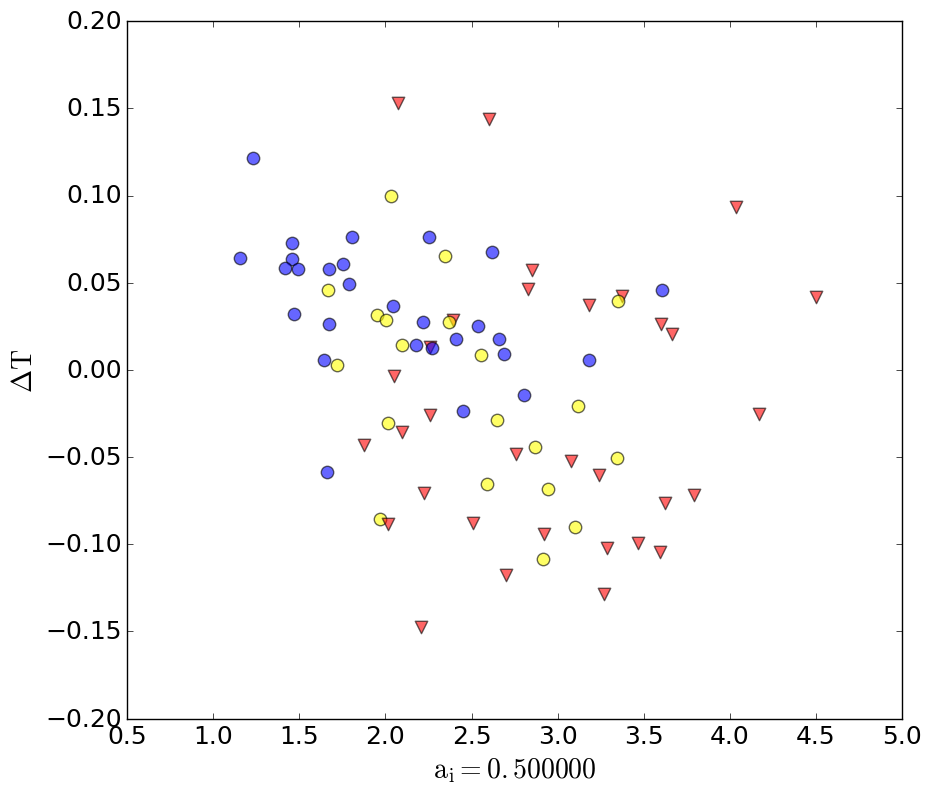

default definition is M_total_200m
SpearmanrResult(correlation=-0.44064697609001413, pvalue=4.3022483026860516e-05)


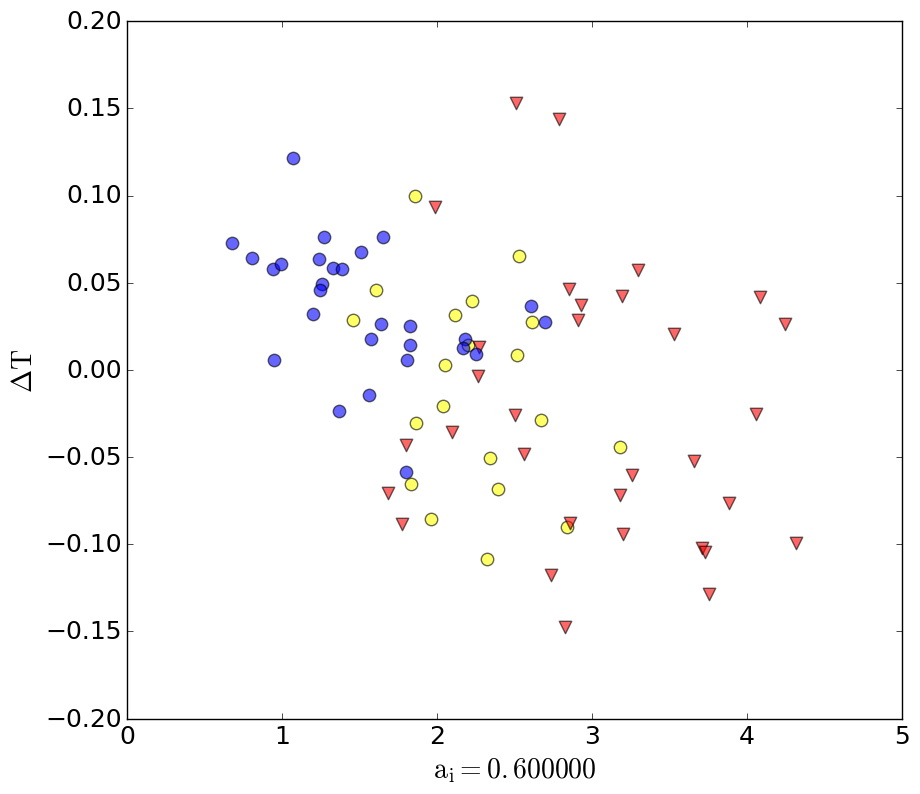

default definition is M_total_200m
SpearmanrResult(correlation=-0.52283169245194561, pvalue=6.5213691747021081e-07)


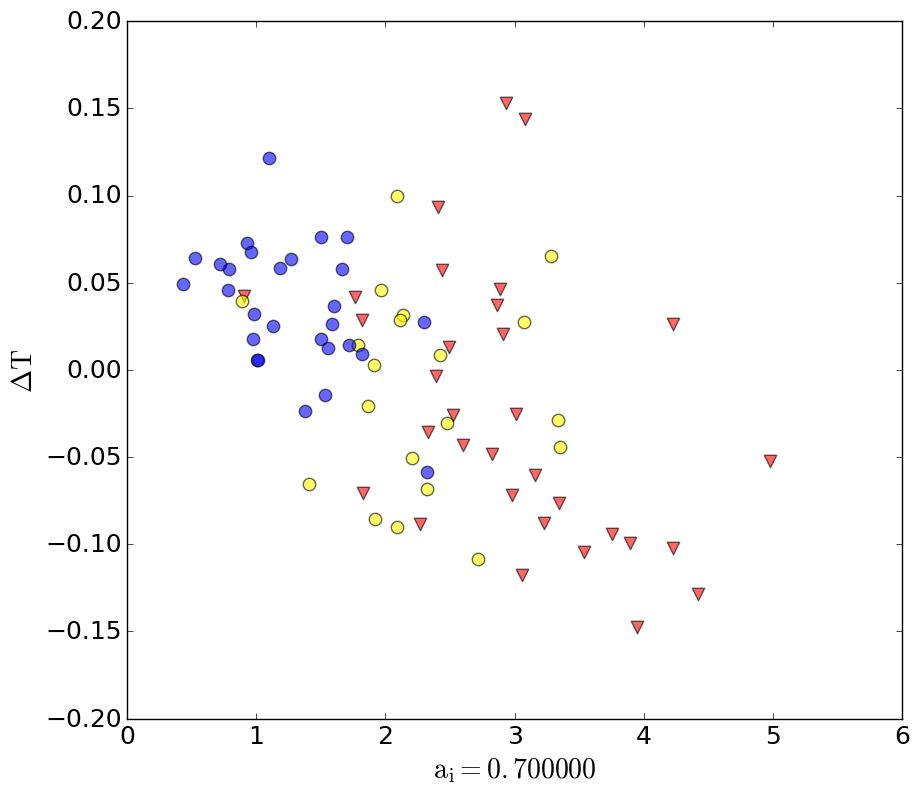

default definition is M_total_200m
SpearmanrResult(correlation=-0.53844350679793718, pvalue=2.5815736099281138e-07)


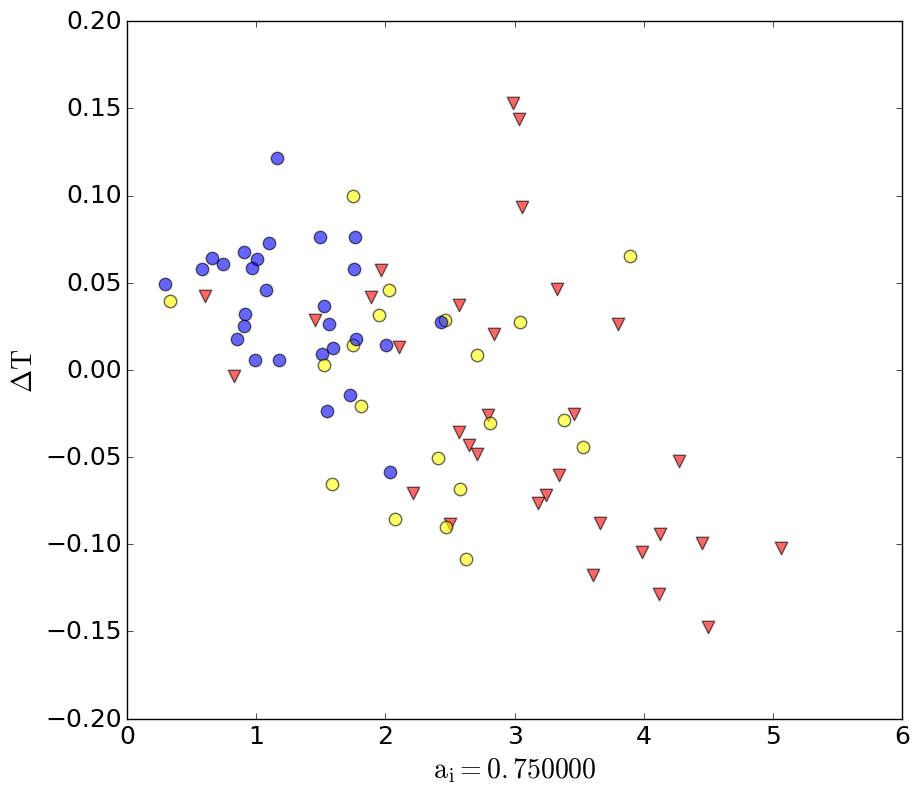

default definition is M_total_200m
SpearmanrResult(correlation=-0.53216127519924994, pvalue=3.7693569464540187e-07)


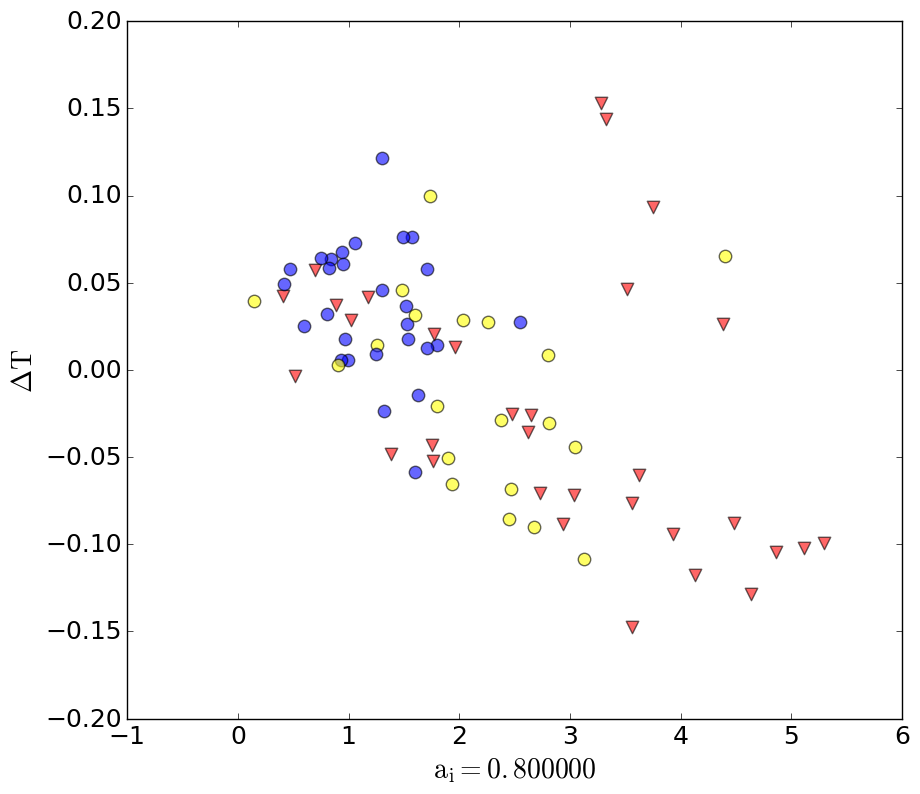

default definition is M_total_200m
SpearmanrResult(correlation=-0.37294889826535399, pvalue=0.00065666382596836731)


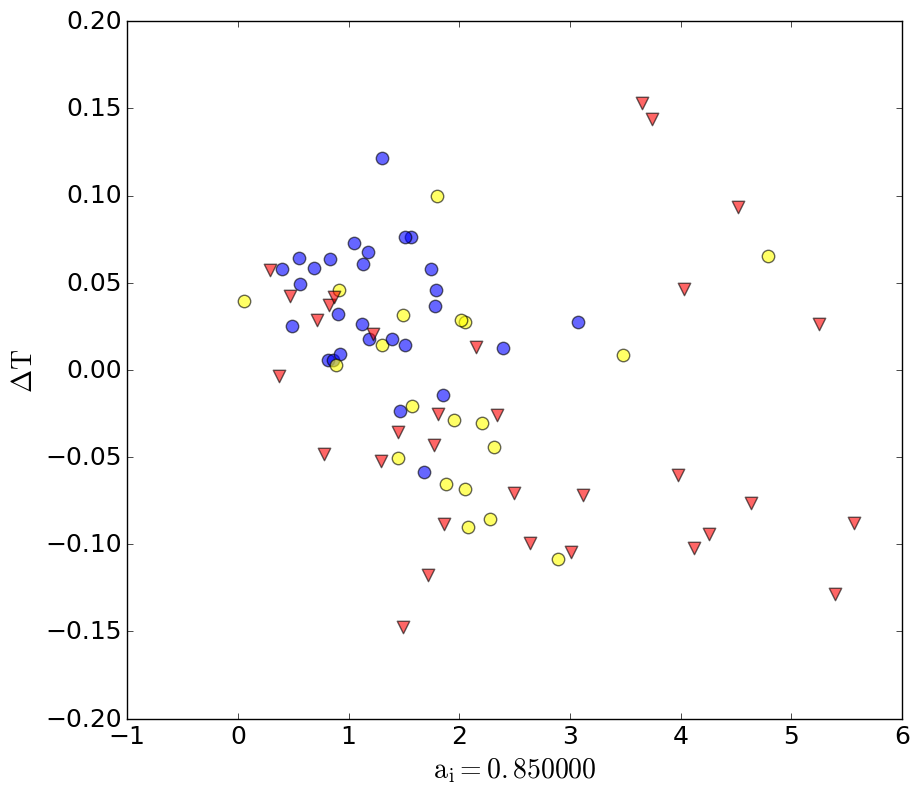

default definition is M_total_200m
SpearmanrResult(correlation=-0.1775199249882794, pvalue=0.11517863542729714)


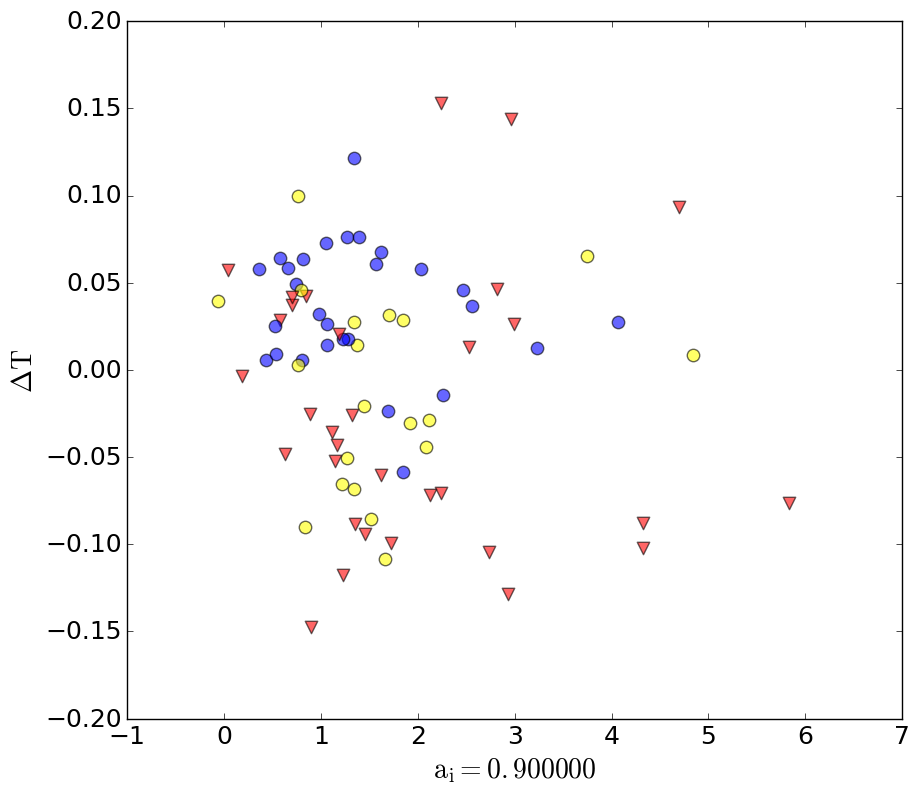

default definition is M_total_200m
SpearmanrResult(correlation=-0.50803300043421618, pvalue=0.00022763795559668405)


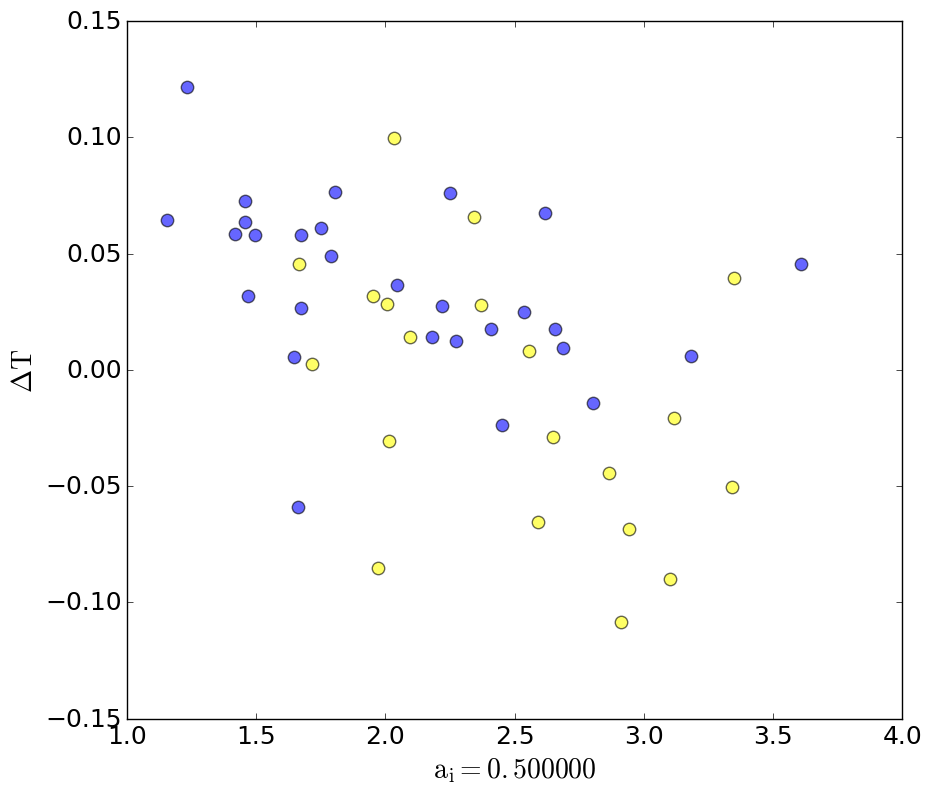

default definition is M_total_200m
SpearmanrResult(correlation=-0.52876682587928781, pvalue=0.00011177090196129693)


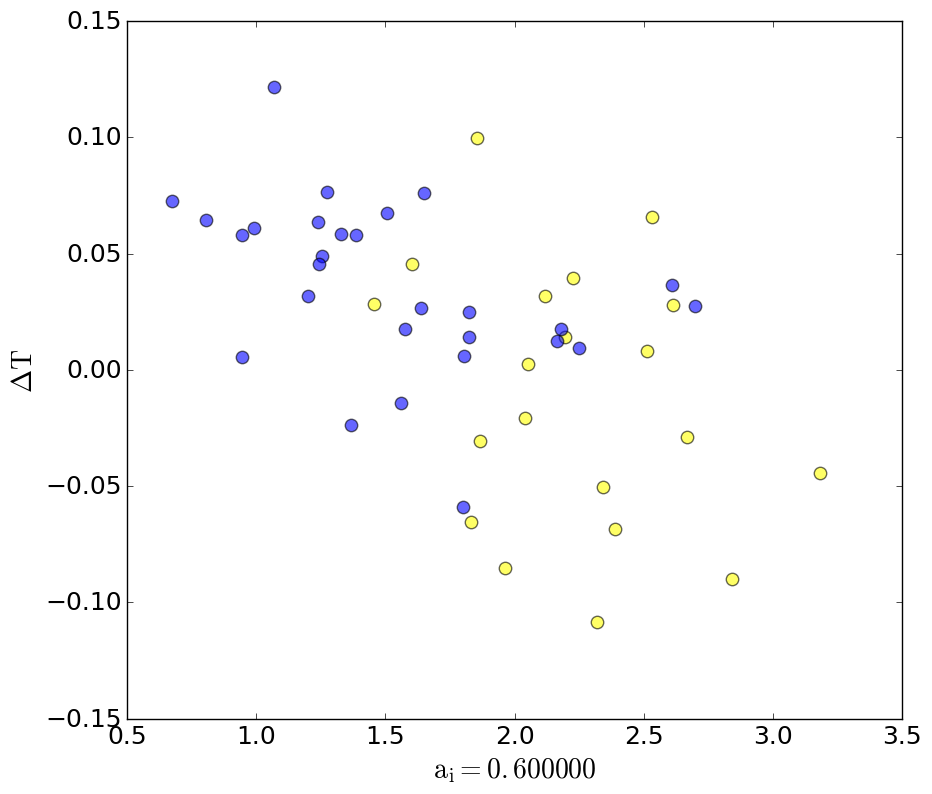

default definition is M_total_200m
SpearmanrResult(correlation=-0.48339122883195834, pvalue=0.0005007193432546382)


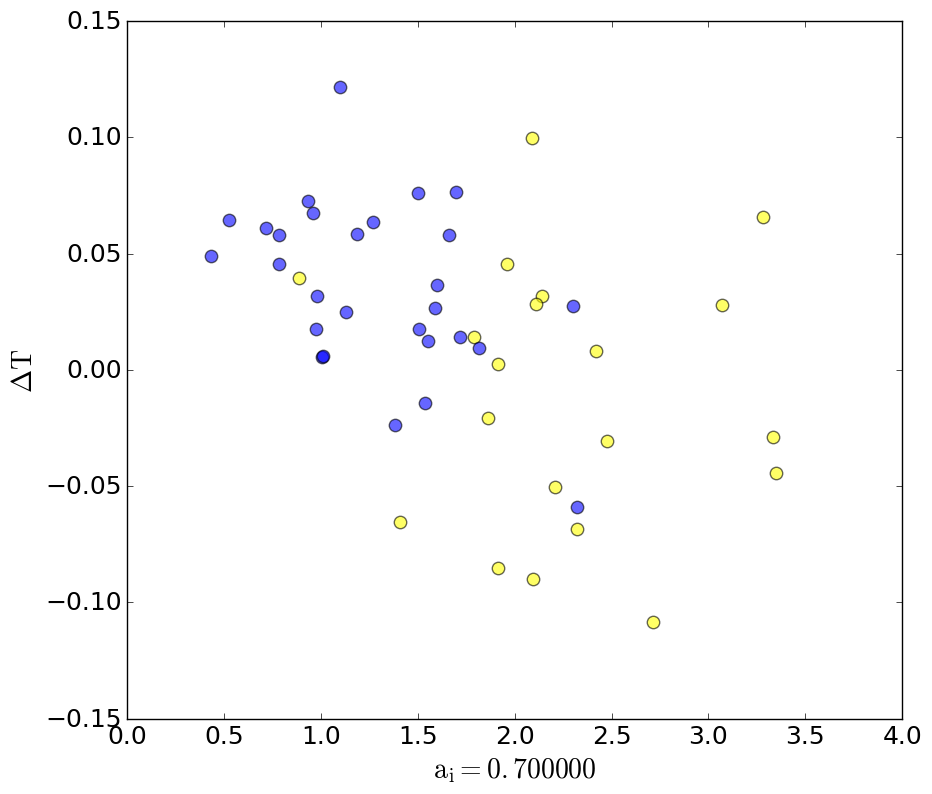

default definition is M_total_200m
SpearmanrResult(correlation=-0.4944637429439861, pvalue=0.0003539616074872734)


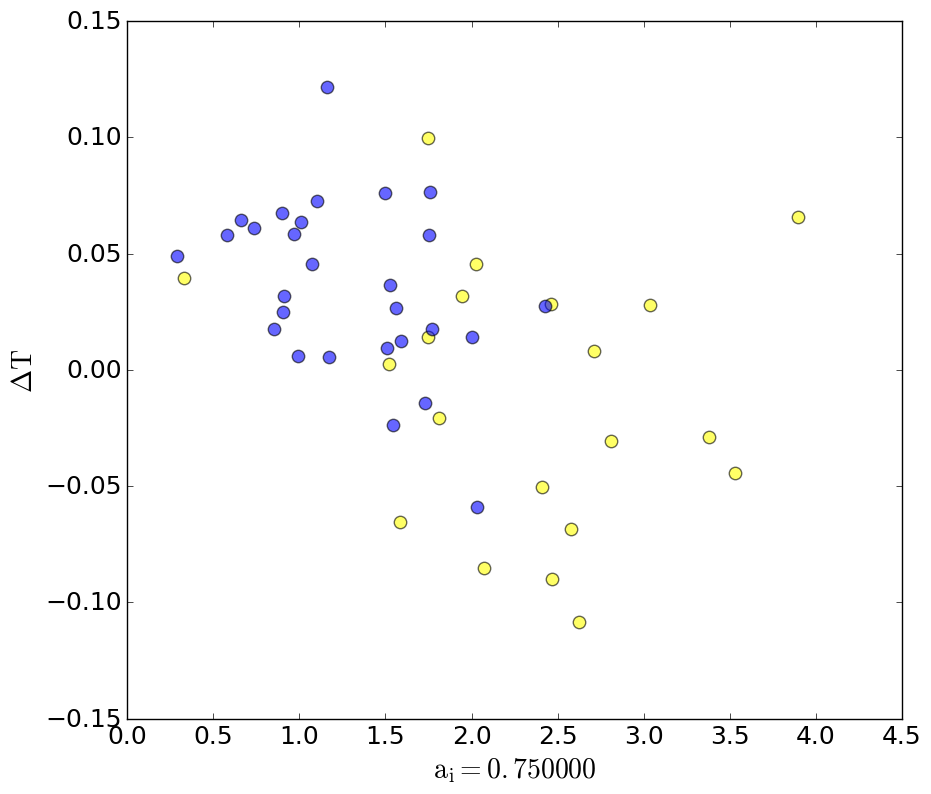

default definition is M_total_200m
SpearmanrResult(correlation=-0.48947025618758139, pvalue=0.00041449748922143788)


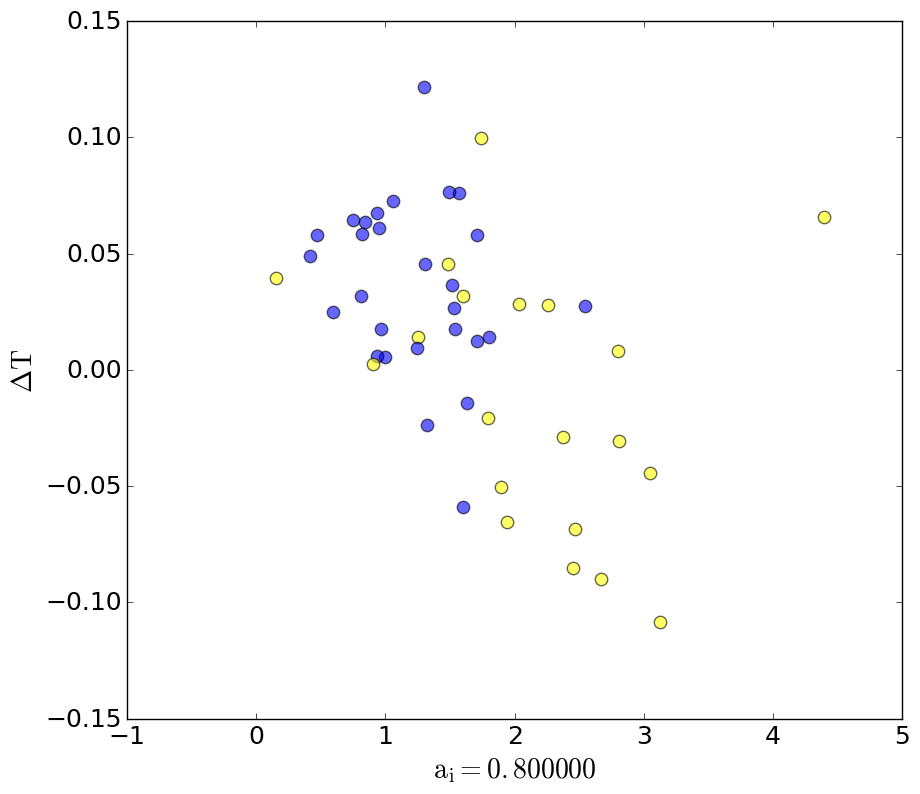

default definition is M_total_200m
SpearmanrResult(correlation=-0.3963308727746418, pvalue=0.0052922259788703088)


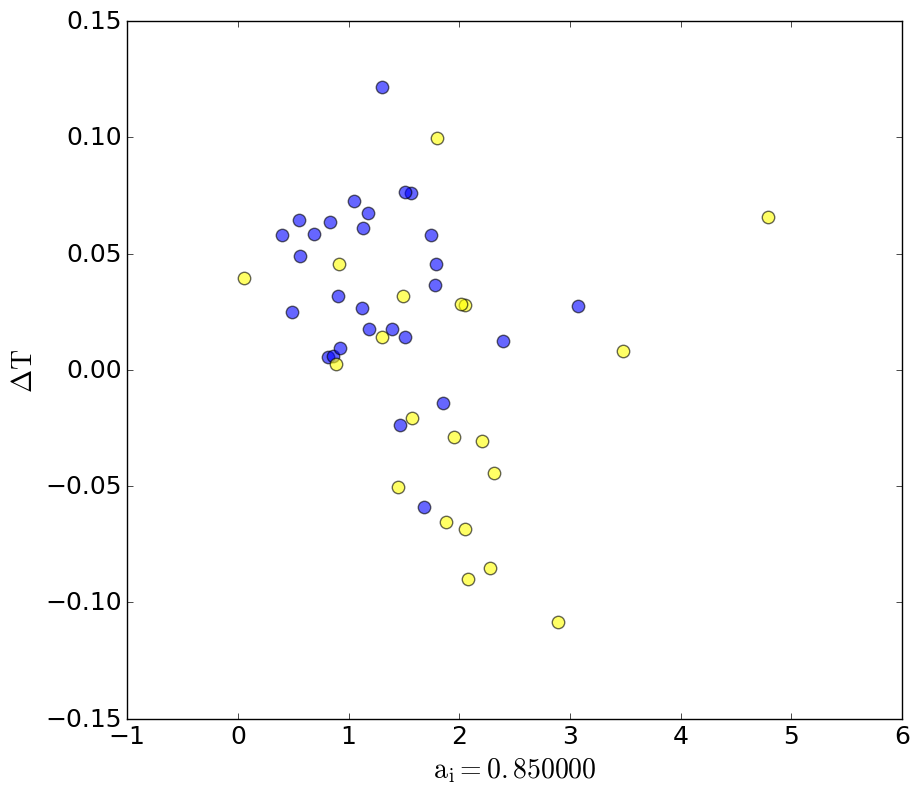

default definition is M_total_200m
SpearmanrResult(correlation=-0.18747286148501954, pvalue=0.20196935607791386)


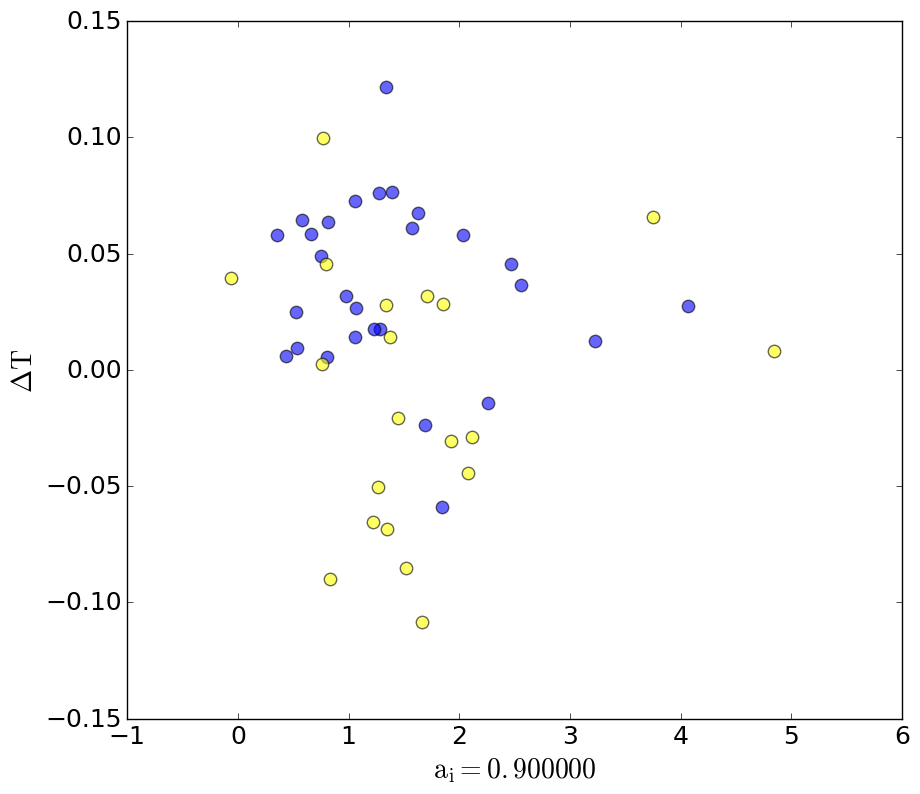

default definition is M_total_200m
SpearmanrResult(correlation=-0.4772851669403394, pvalue=0.010220060165266158)


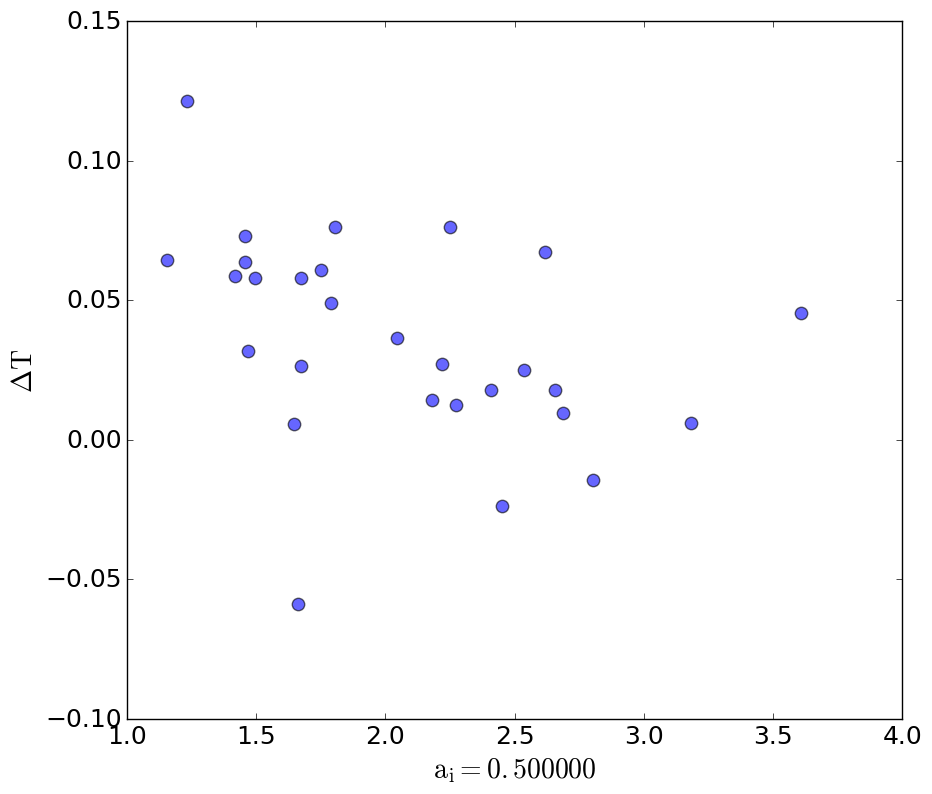

default definition is M_total_200m
SpearmanrResult(correlation=-0.4980842911877395, pvalue=0.0069891952204228468)


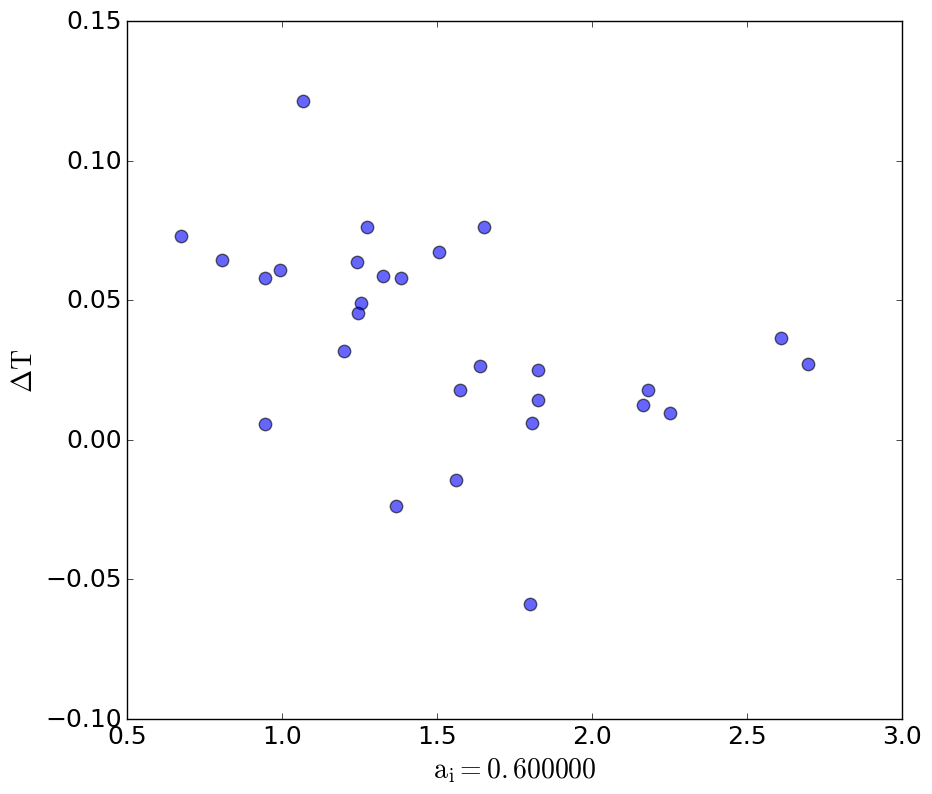

default definition is M_total_200m
SpearmanrResult(correlation=-0.36781609195402298, pvalue=0.054143804822237775)


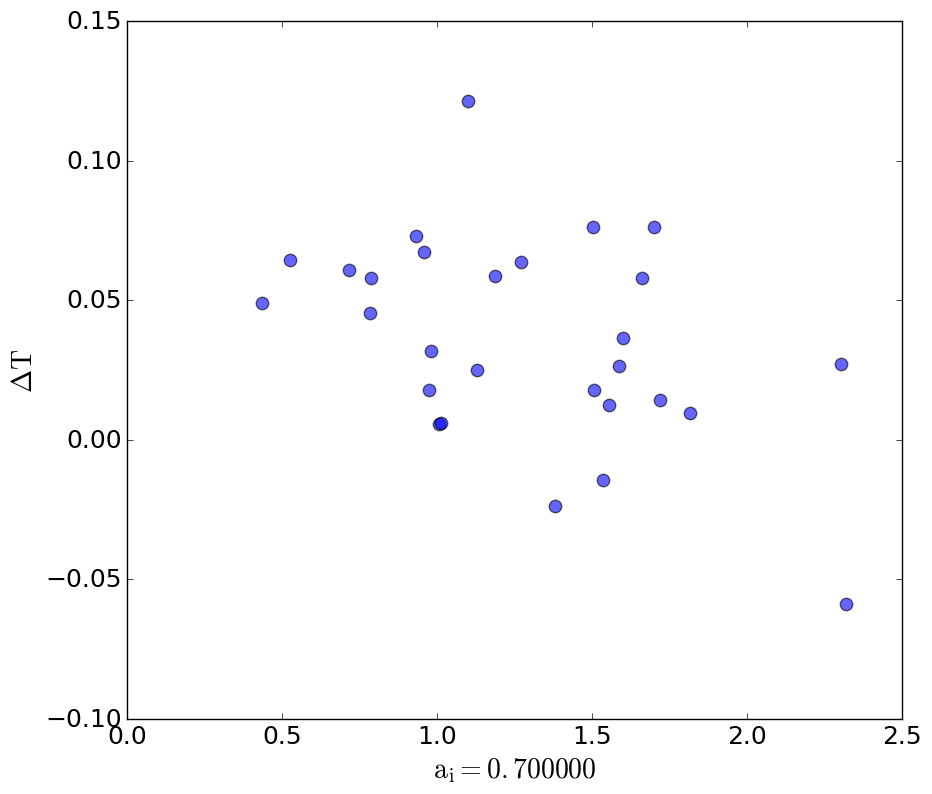

default definition is M_total_200m
SpearmanrResult(correlation=-0.36672140120415986, pvalue=0.054919021033382018)


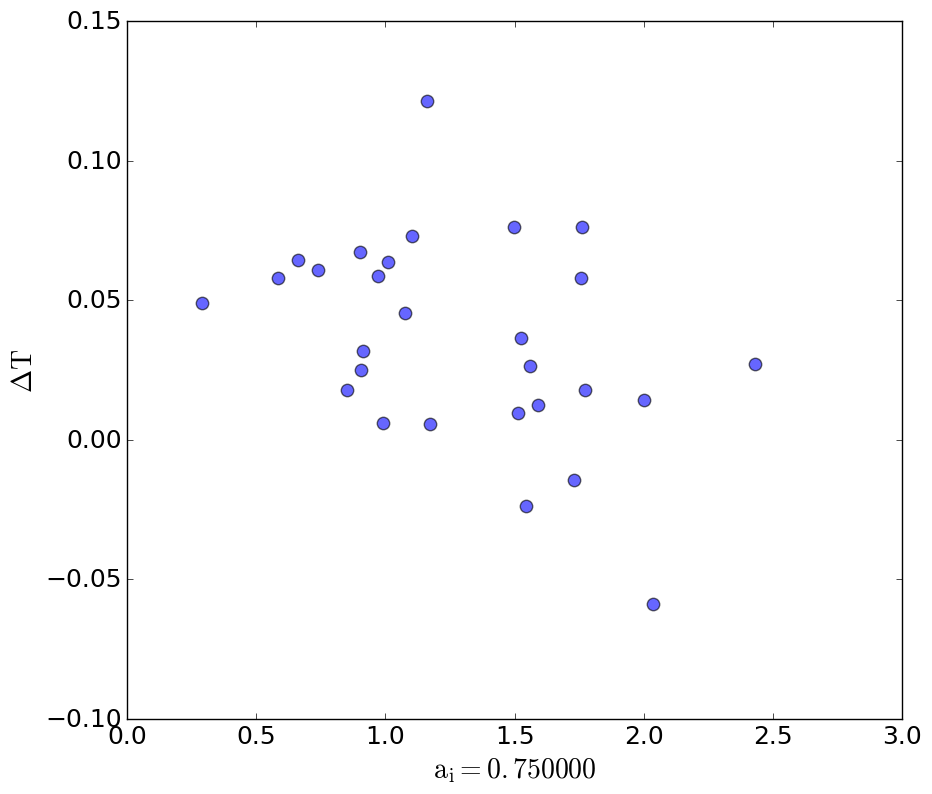

default definition is M_total_200m
SpearmanrResult(correlation=-0.29064039408866993, pvalue=0.13350760508418344)


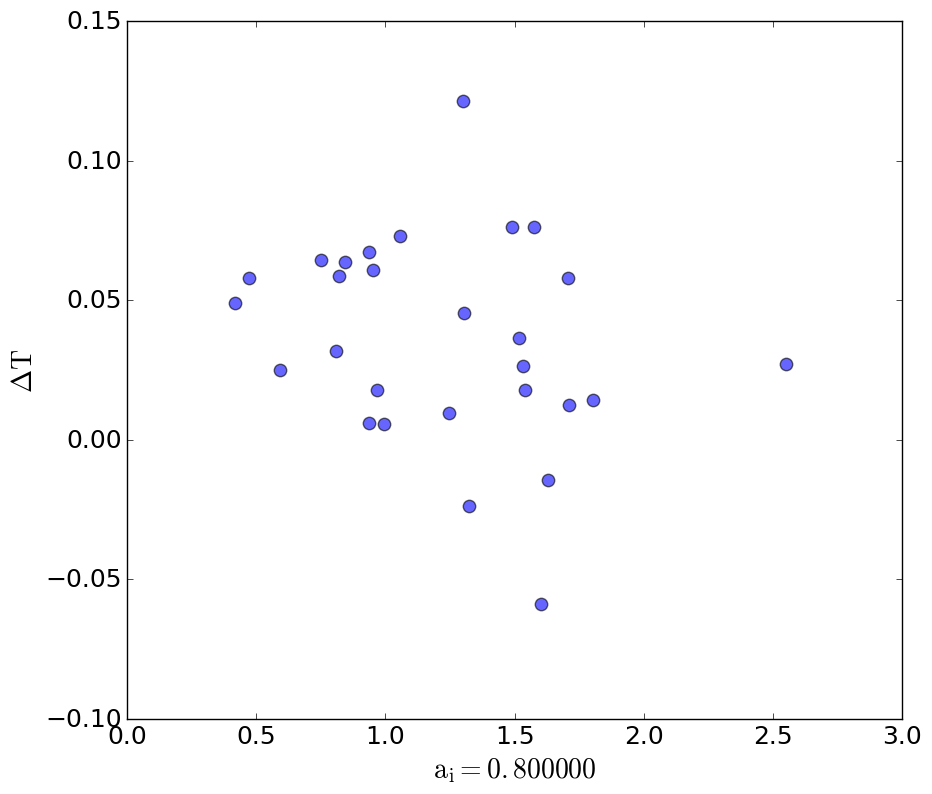

default definition is M_total_200m
SpearmanrResult(correlation=-0.17679255610290093, pvalue=0.36813889812214928)


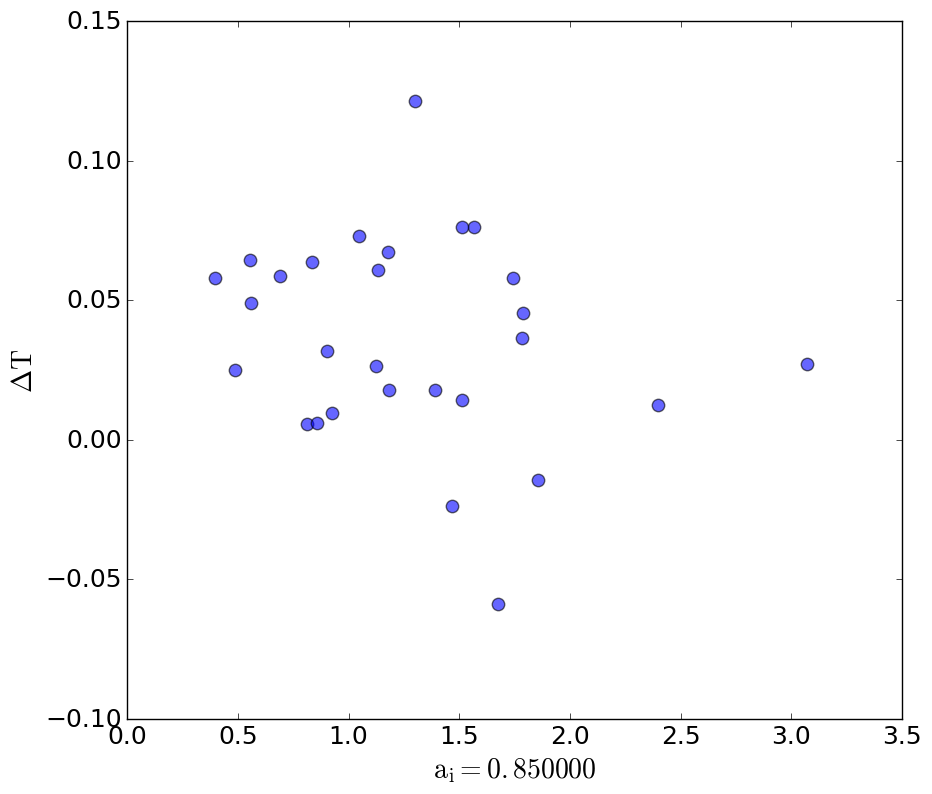

default definition is M_total_200m
SpearmanrResult(correlation=-0.077723043240284617, pvalue=0.69423343665148107)


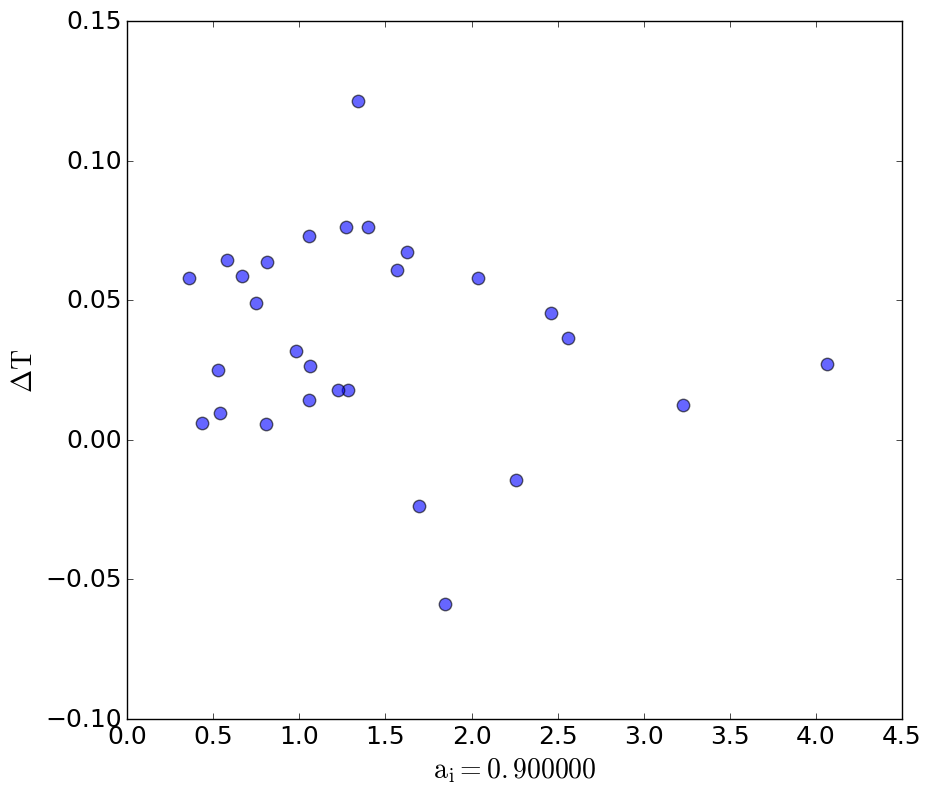

In [90]:
# yq=(Mhse500c-Mtot500c_new)/Mtot500c_new
# ylab=r'$\rm (M_{HSE}-M_{tot})/M_{tot}$'
yq=DT
ylab=r'$\rm \Delta T$'
# ylab=r"$\rm Non-thermal \ Pressure \ Fraction$"
alist,spall=plot_Gamma_spearman(yq, ylab,subsample='all')
alist,spexmajor=plot_Gamma_spearman(yq, ylab,subsample='exmajor')
alist,spsmooth=plot_Gamma_spearman(yq, ylab,subsample='smooth')

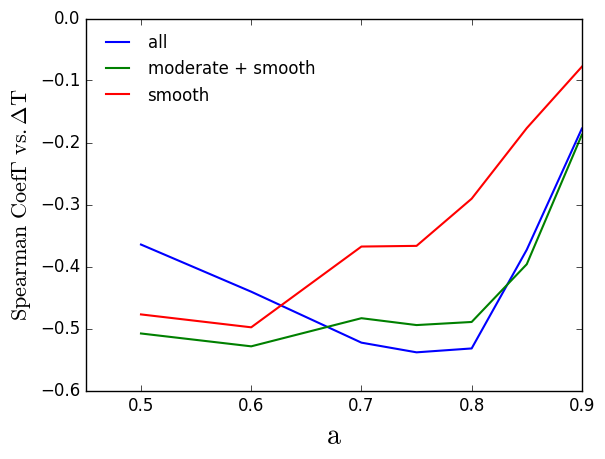

In [91]:
plt.plot(alist,spall,label='all')
plt.plot(alist,spexmajor,label='moderate + smooth')
plt.plot(alist,spsmooth,label='smooth')
plt.legend()
plt.xlabel(r'$\rm  a$',fontsize=20)
plt.ylabel(r'$\rm Spearman \ Coef \Gamma \ vs. $'+ylab)
plt.savefig('Spearman.png')
plt.show()

In [113]:
def plot_coa_spearman(yquan,ylabel,subsample='all'):
    spDT=[]
    for ir in range(1,15):
        print rlist[ir]
        ell_r500c=allelldata[:,ir]
        ell_r500c_new=[]
        for ids in z0idnew:
            i=np.where(allz0id==ids)[0][0]
            ell_r500c_new.append(ell_r500c[i])


        spx=[]
        spy=[]
        plt.figure(figsize=(10,9))
        for isubsample,ids in enumerate(z0idnew):
            i=np.where(z0idnew==ids)[0][0]
            if ids in minormajormergerid:
                if ids in majormergerid:
                    if subsample=='all':
                        spx.append(ell_r500c_new[i])
                        spy.append(yquan[i])
                        plt.scatter(ell_r500c_new[i],yquan[i],c='r',marker='v',s=80,alpha=0.6)
                    else:
                        pass
    #                 plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
                else:
                    if subsample=='all' or subsample=='exmajor':
                        spx.append(ell_r500c_new[i])
                        spy.append(yquan[i])
                        plt.scatter(ell_r500c_new[i],yquan[i],c='yellow',s=80,alpha=0.6)
            else:
                spx.append(ell_r500c_new[i])
                spy.append(yquan[i])
                plt.scatter(ell_r500c_new[i],yquan[i],c='b',s=80,alpha=0.6)

            txt=str(int(z0idnew[i])) 
        #     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
        #                      alpha=0.8,fontsize=16)
    #         spx.append(fnt[i])
    #         spy.append(ell_r500c_new[i])
        print spearmanr(spx,spy)
        spDT.append(spearmanr(spx,spy)[0])
        ax=plt.gca()

        change_tick(ax)

    # plt.yticks(np.arange(-0.2,0.2,0.1))

    #     plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
    #     plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
        plt.ylabel(ylabel,fontsize=20)
        plt.xlabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
        plt.savefig('tmp'+str(ir)+'.png')
        plt.show()
    return rlist[1:15],spDT



0.15
SpearmanrResult(correlation=-0.41388201927384871, pvalue=0.00013550416348794453)


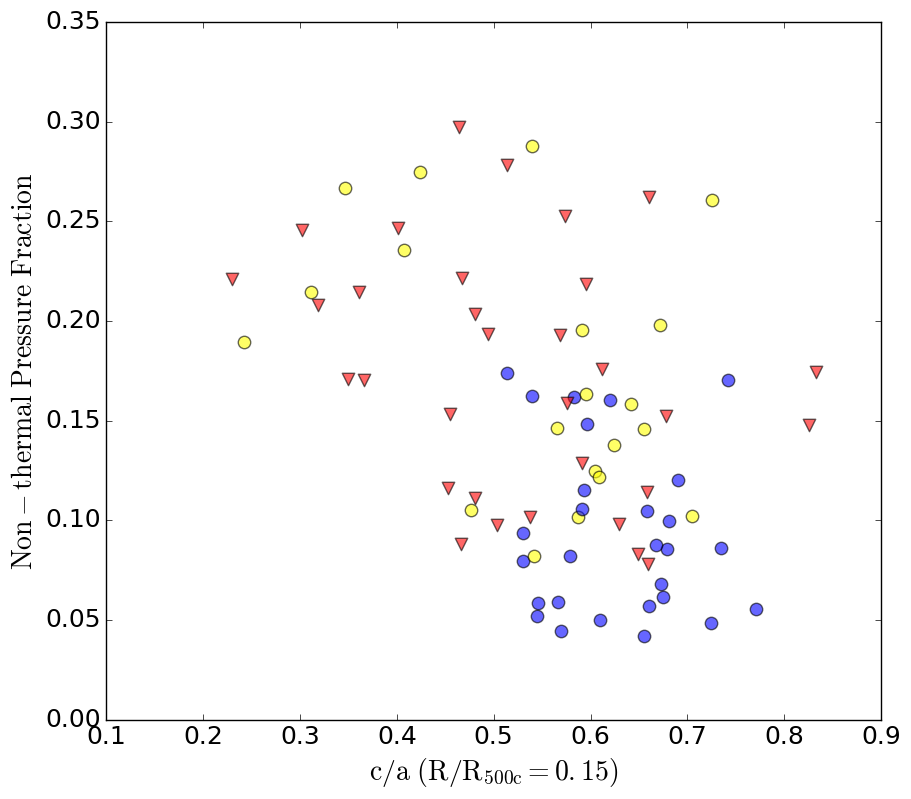

0.2
SpearmanrResult(correlation=-0.44000750129020033, pvalue=4.4268298392496534e-05)


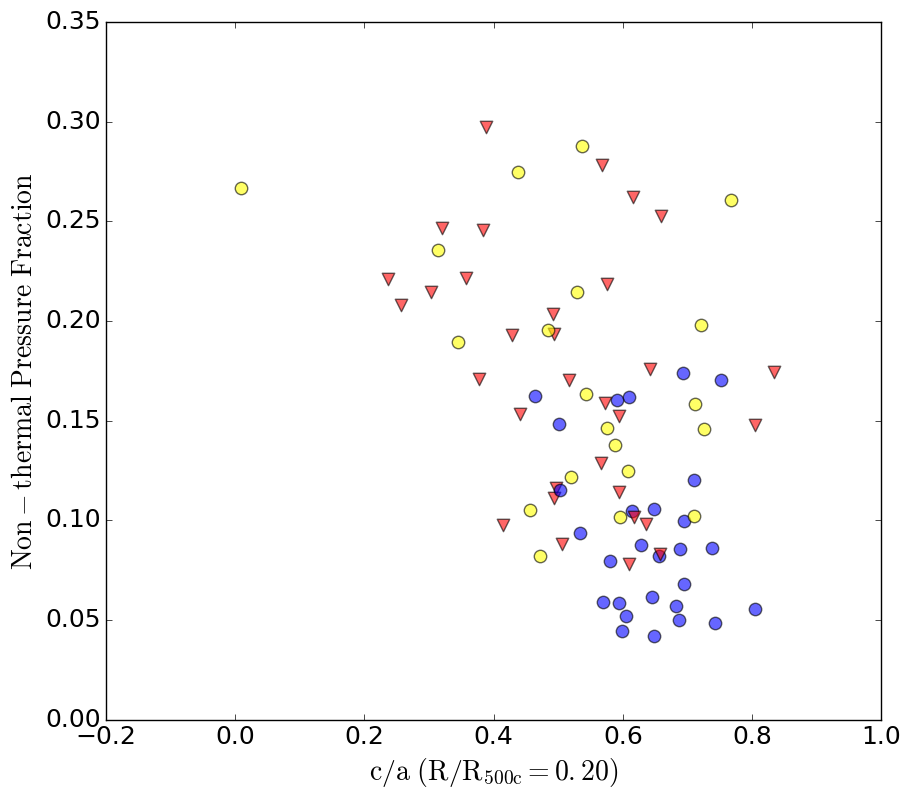

0.25
SpearmanrResult(correlation=-0.49517692428300747, pvalue=3.0185854187045769e-06)


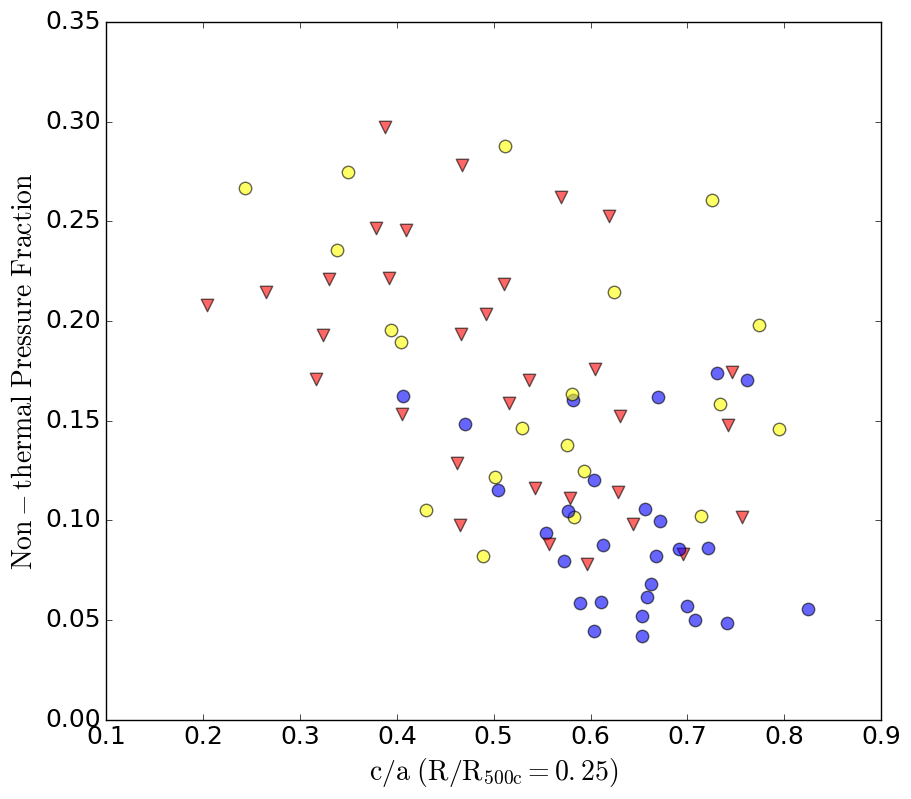

0.3
SpearmanrResult(correlation=-0.56667330844619501, pvalue=4.2688509475927615e-08)


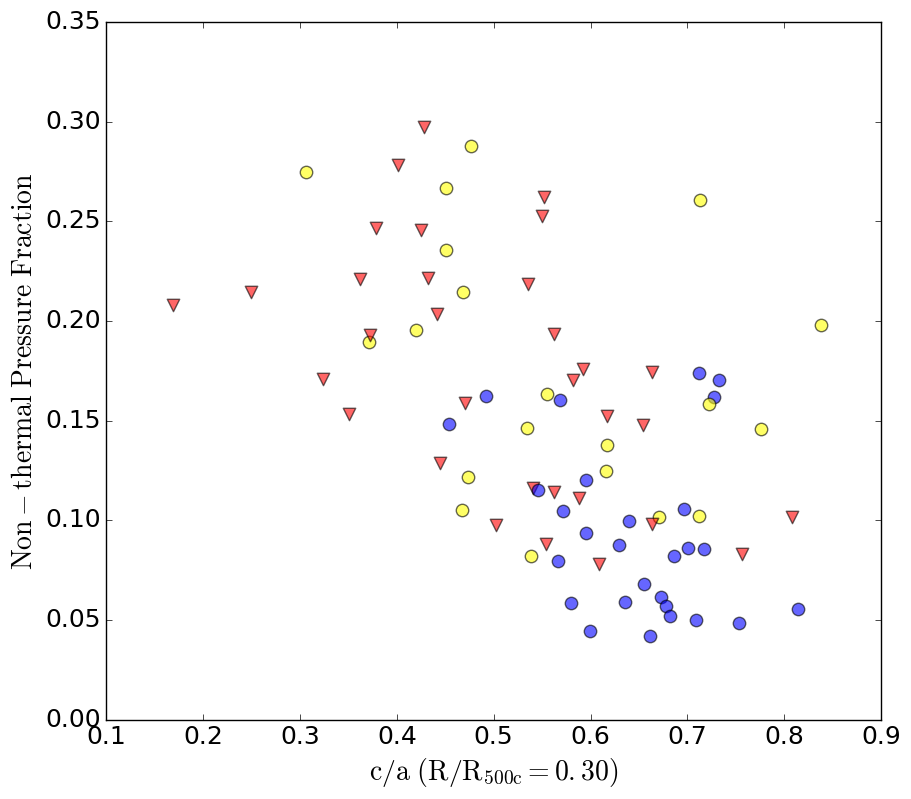

0.4
SpearmanrResult(correlation=-0.44670850988536448, pvalue=3.2729771350902447e-05)


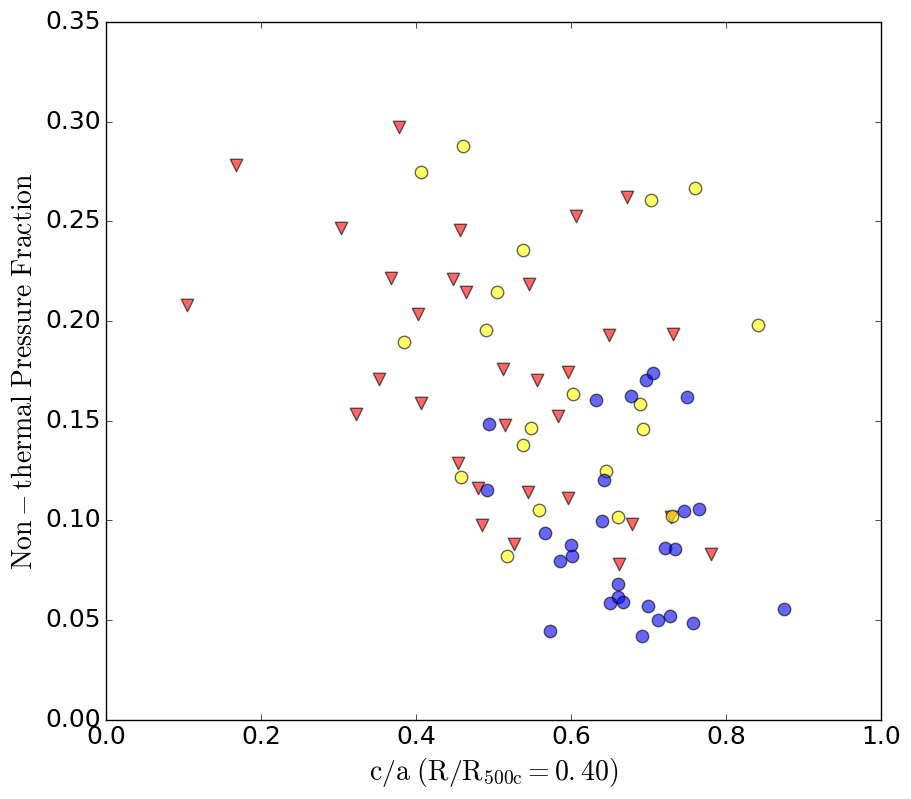

0.5
SpearmanrResult(correlation=-0.40040319275128061, pvalue=0.00023306983433068798)


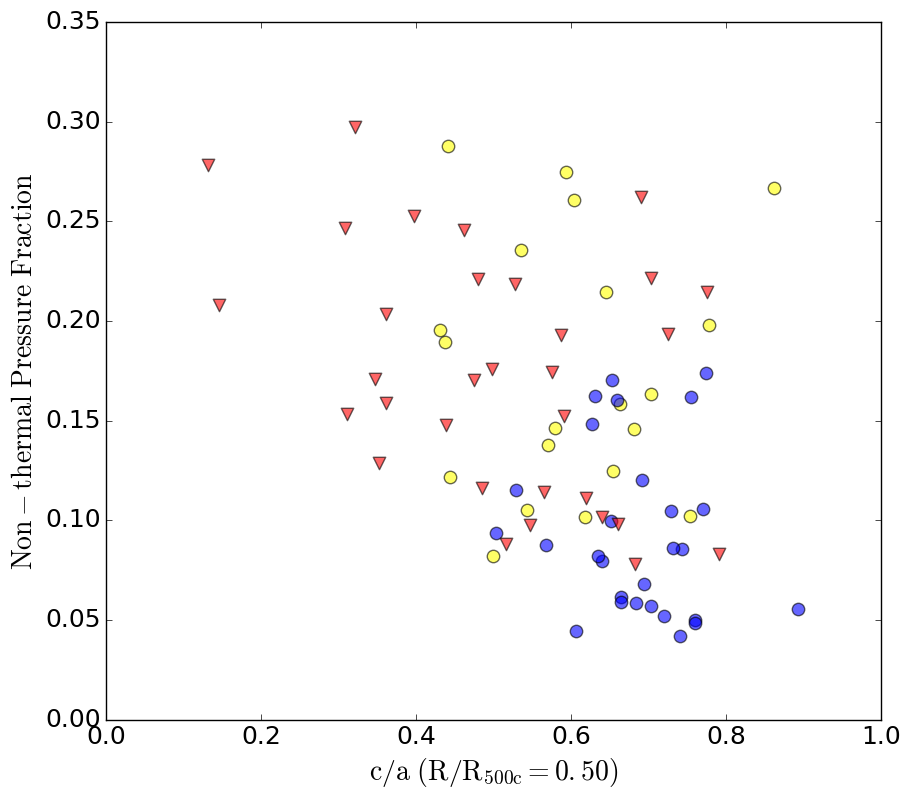

0.6
SpearmanrResult(correlation=-0.36545200954232565, pvalue=0.00085805985379882113)


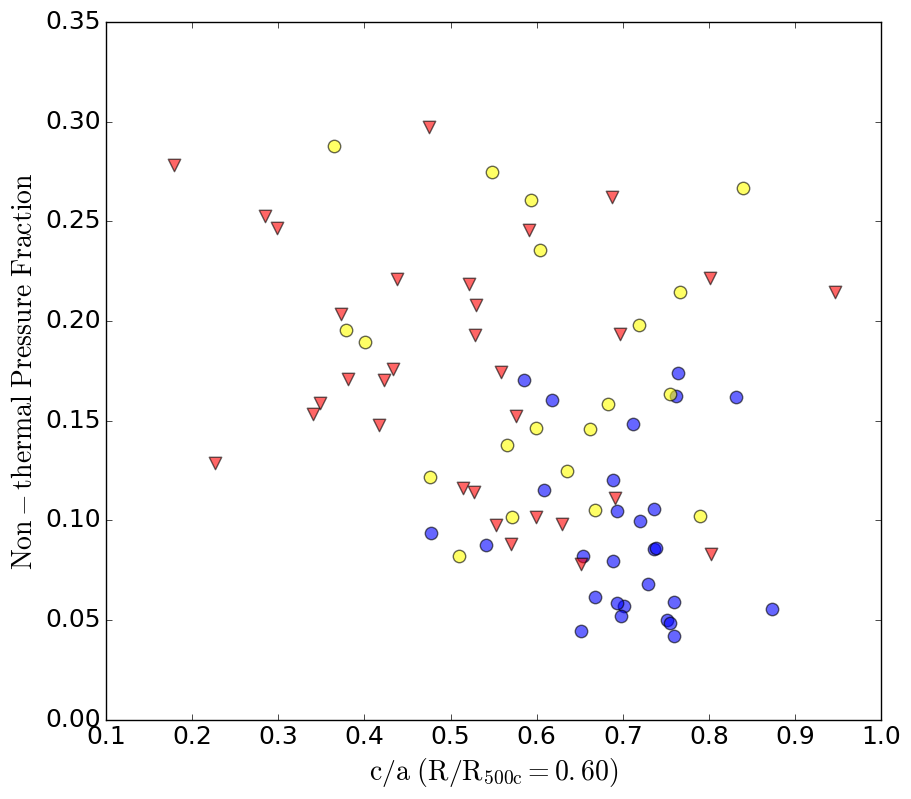

0.7
SpearmanrResult(correlation=-0.35629812822569457, pvalue=0.0011793426265834682)


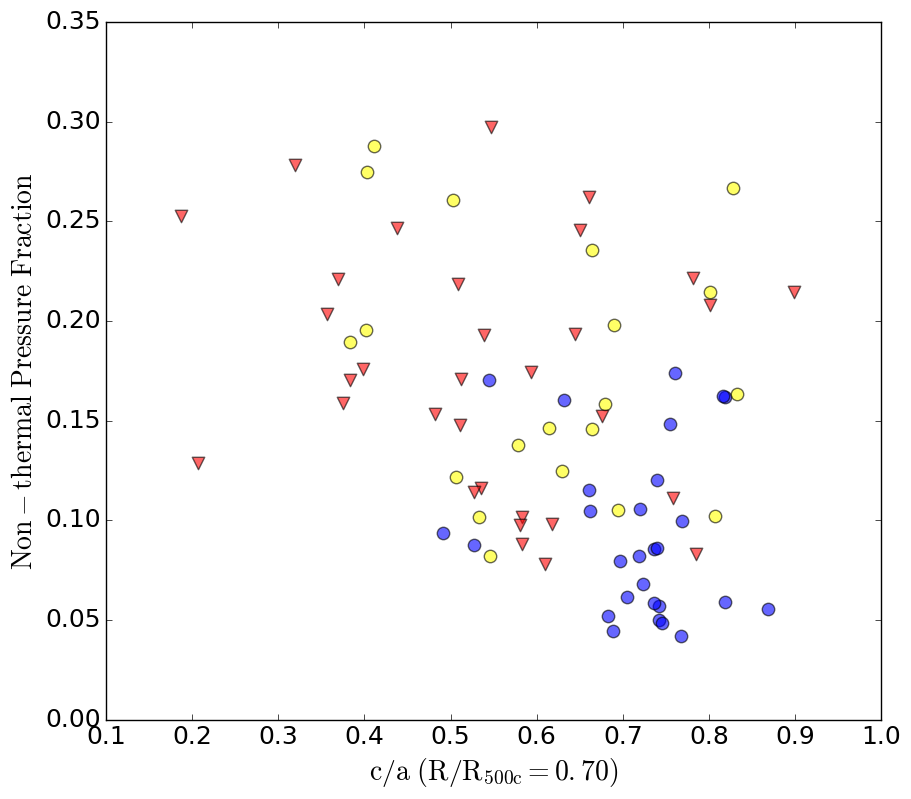

0.8
SpearmanrResult(correlation=-0.33617365419156459, pvalue=0.0022978611449460148)


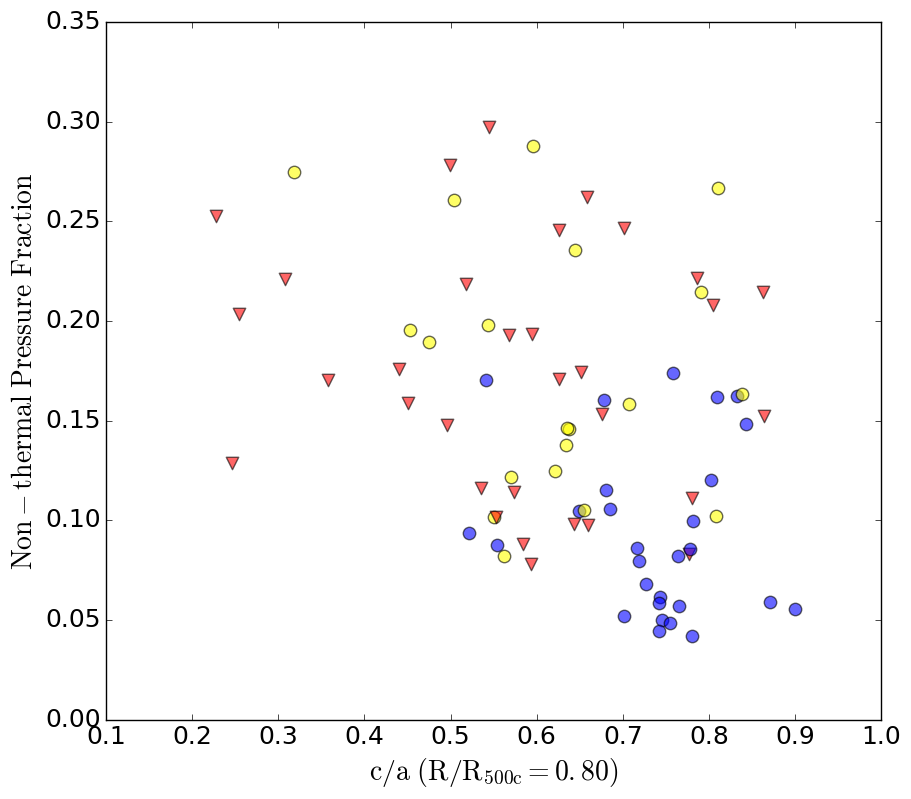

0.9
SpearmanrResult(correlation=-0.31000310601398506, pvalue=0.0051355249041012928)


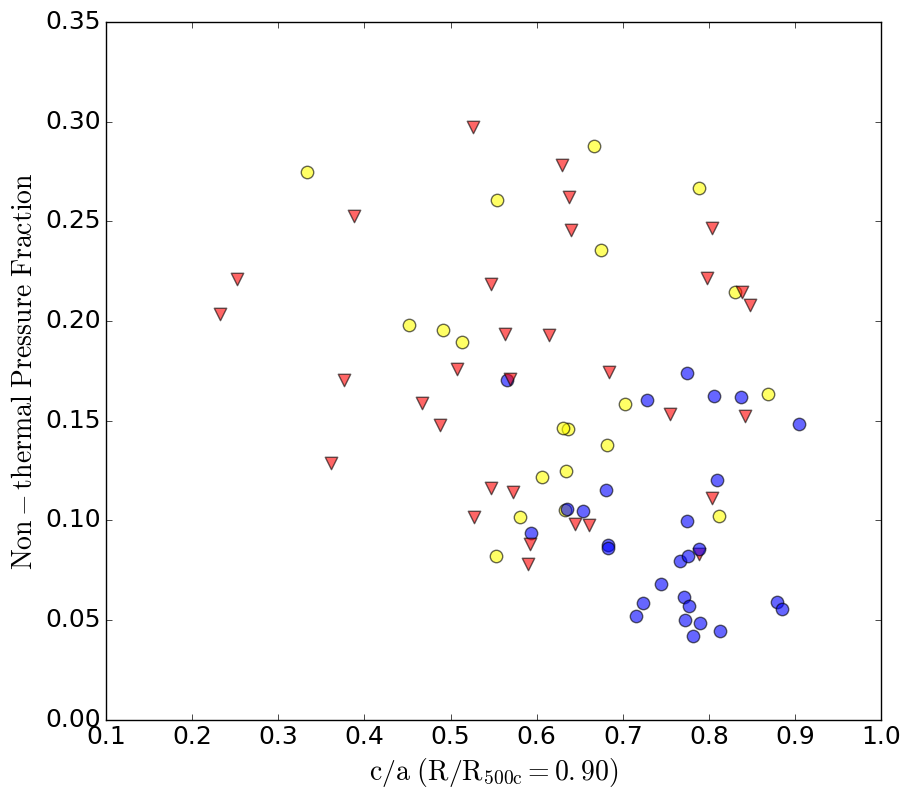

1.0
SpearmanrResult(correlation=-0.26801767486223099, pvalue=0.016232422470977628)


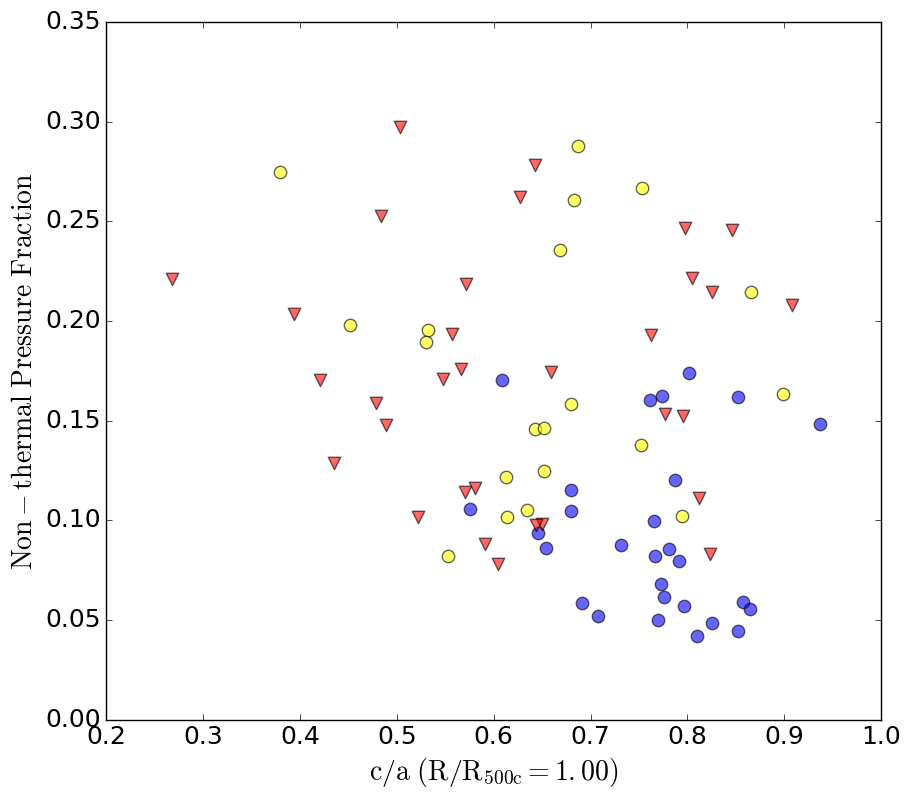

1.1
SpearmanrResult(correlation=-0.25730795377294358, pvalue=0.021213996923570486)


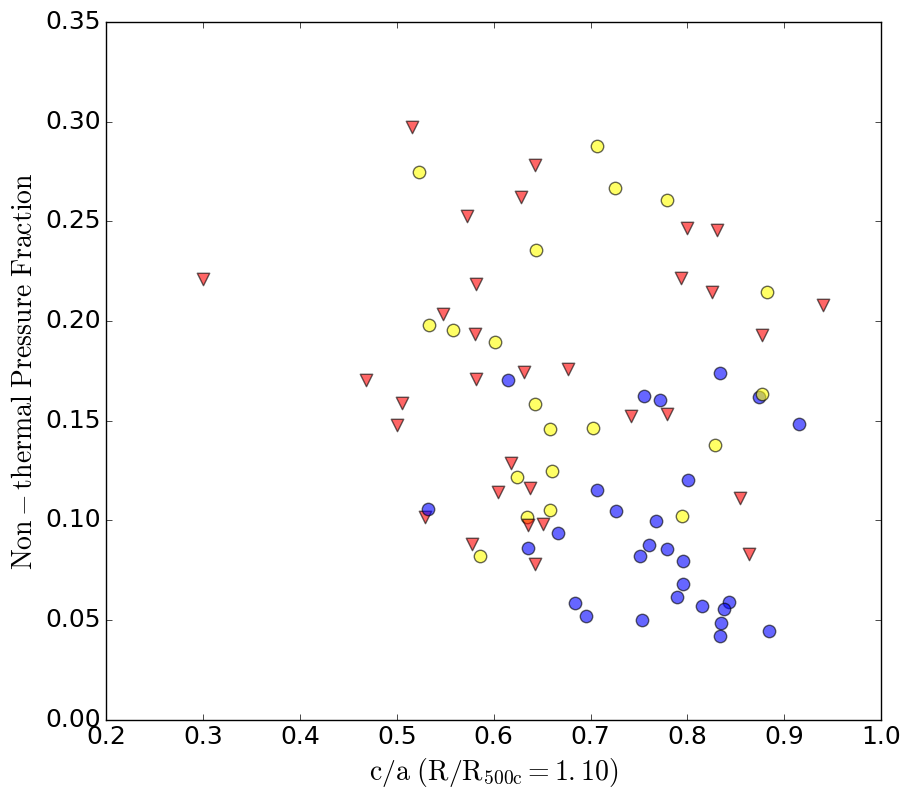

1.2
SpearmanrResult(correlation=-0.16445340429404653, pvalue=0.14492021036558908)


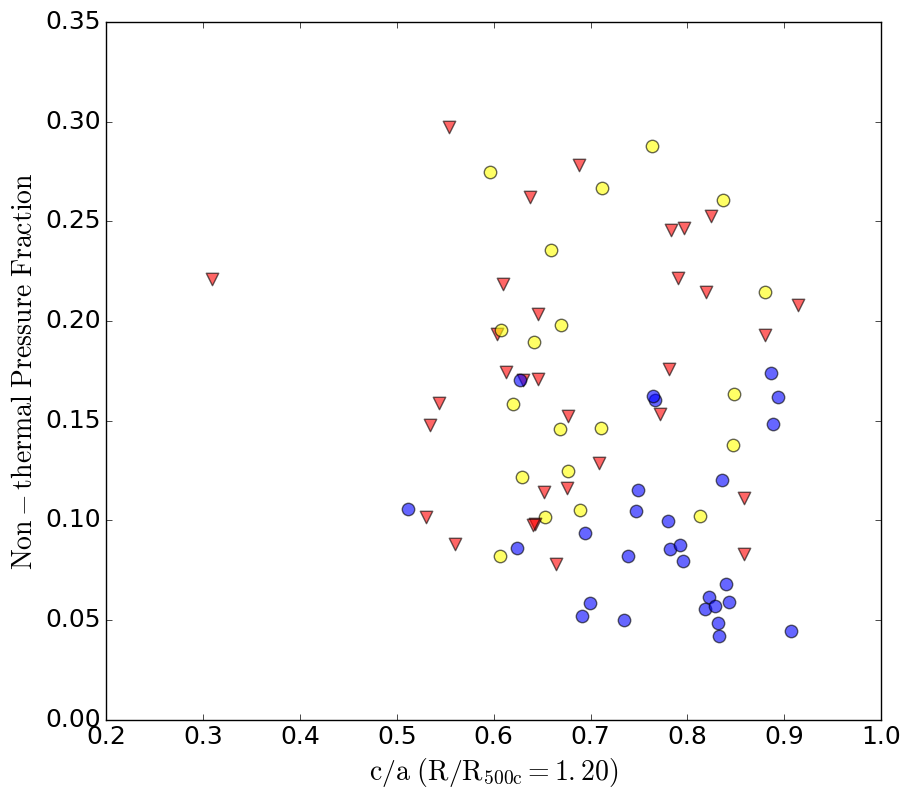

1.3
SpearmanrResult(correlation=-0.071250249070166694, pvalue=0.52997072649603394)


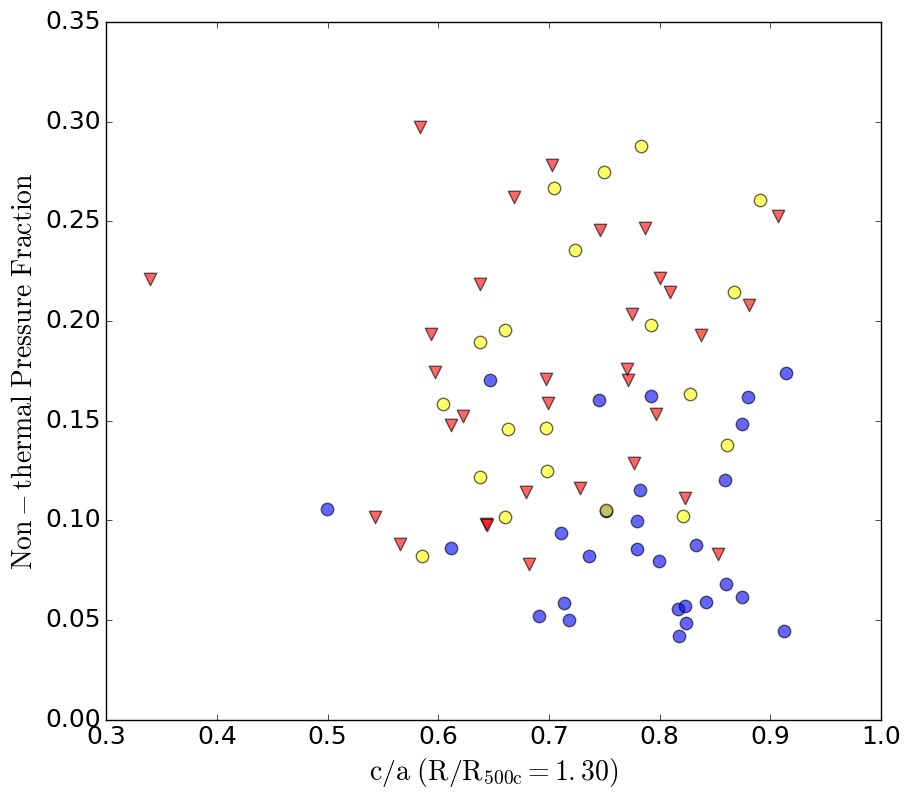

0.15
SpearmanrResult(correlation=-0.31209292227529312, pvalue=0.030810903322493963)


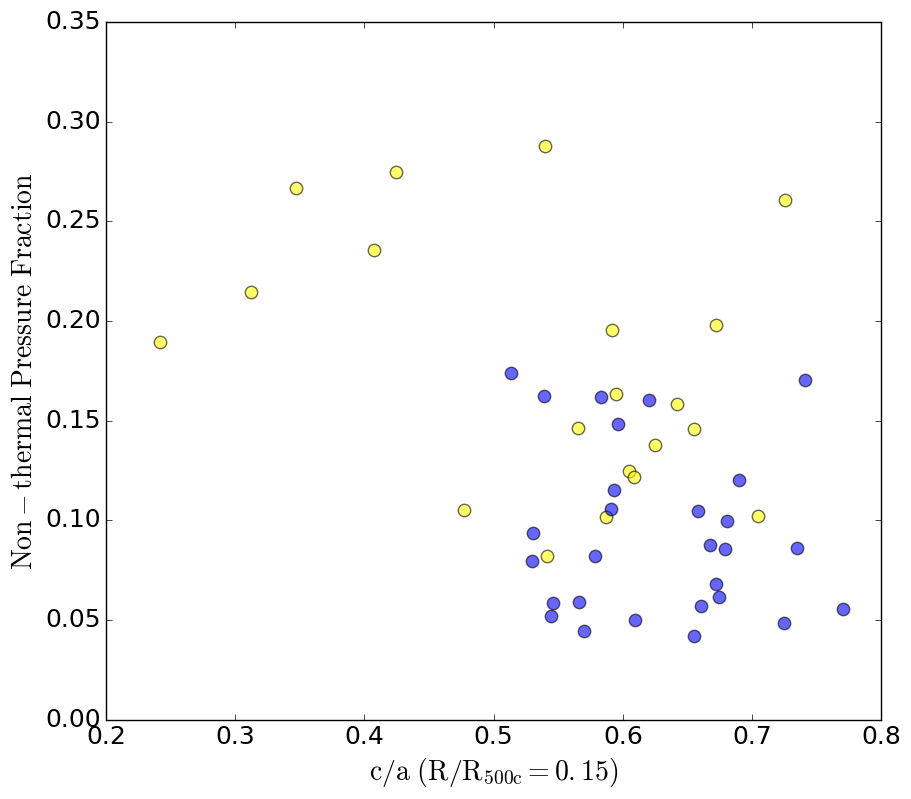

0.2
SpearmanrResult(correlation=-0.33608336951801998, pvalue=0.01951926927736777)


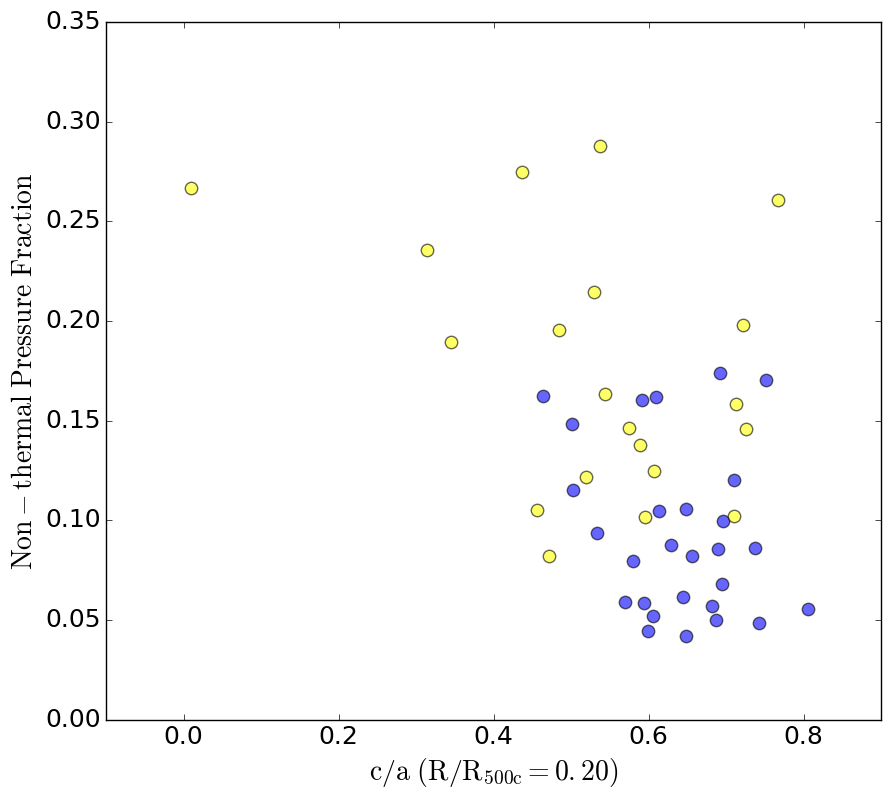

0.25
SpearmanrResult(correlation=-0.3264220581849761, pvalue=0.023554229880522037)


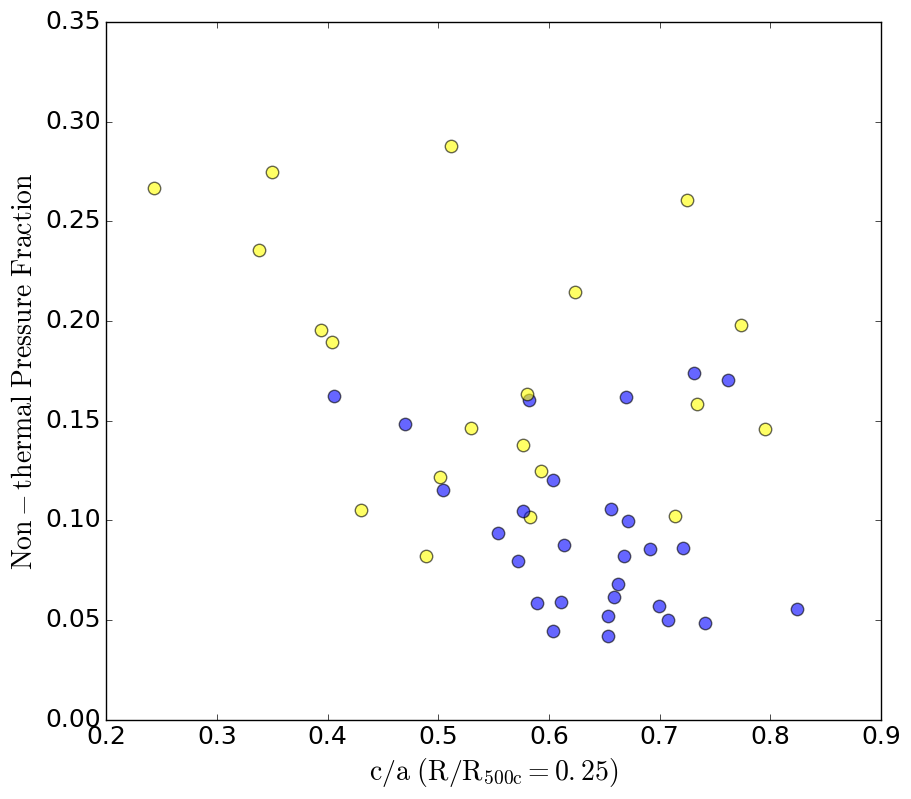

0.3
SpearmanrResult(correlation=-0.36550151975683892, pvalue=0.01063155152645864)


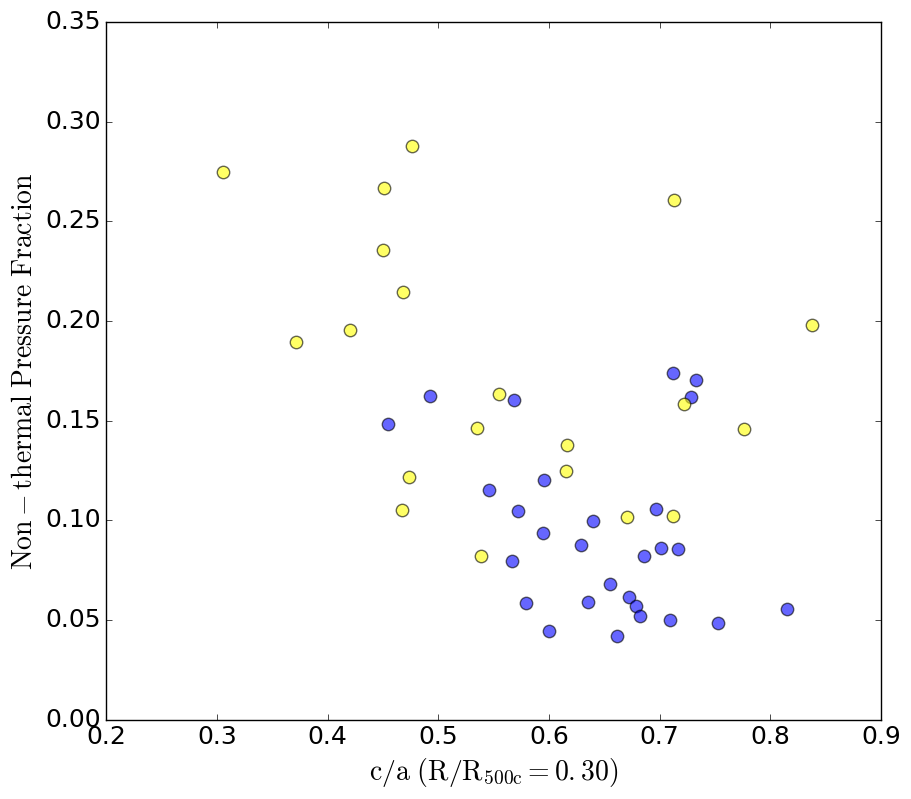

0.4
SpearmanrResult(correlation=-0.27274947766985397, pvalue=0.060711968402252105)


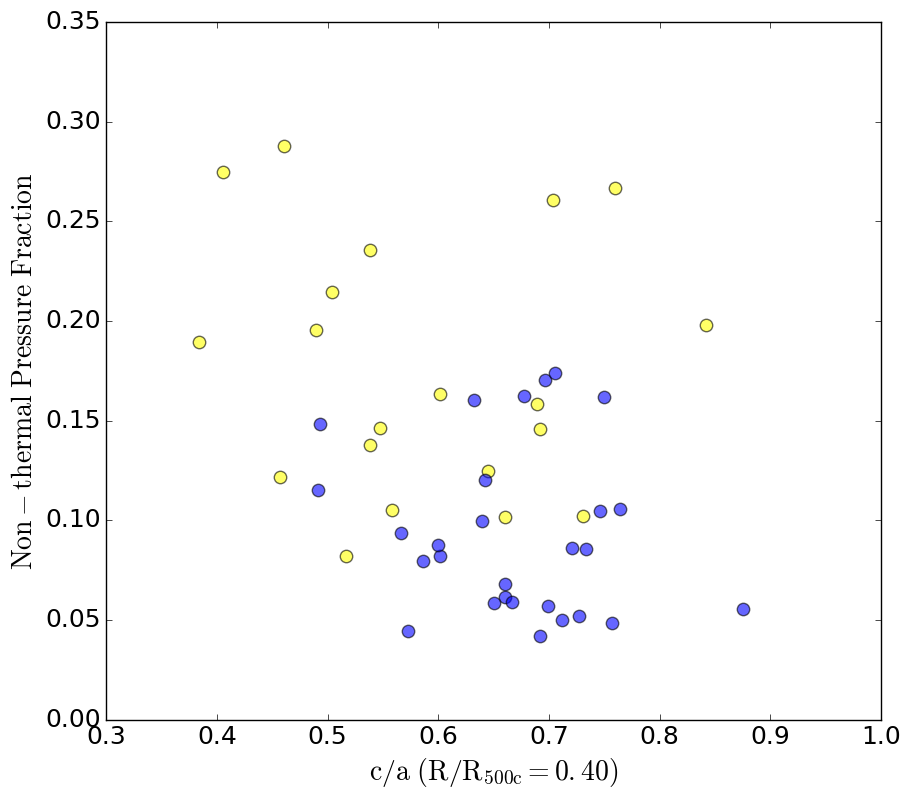

0.5
SpearmanrResult(correlation=-0.2814806773773339, pvalue=0.052606482462946511)


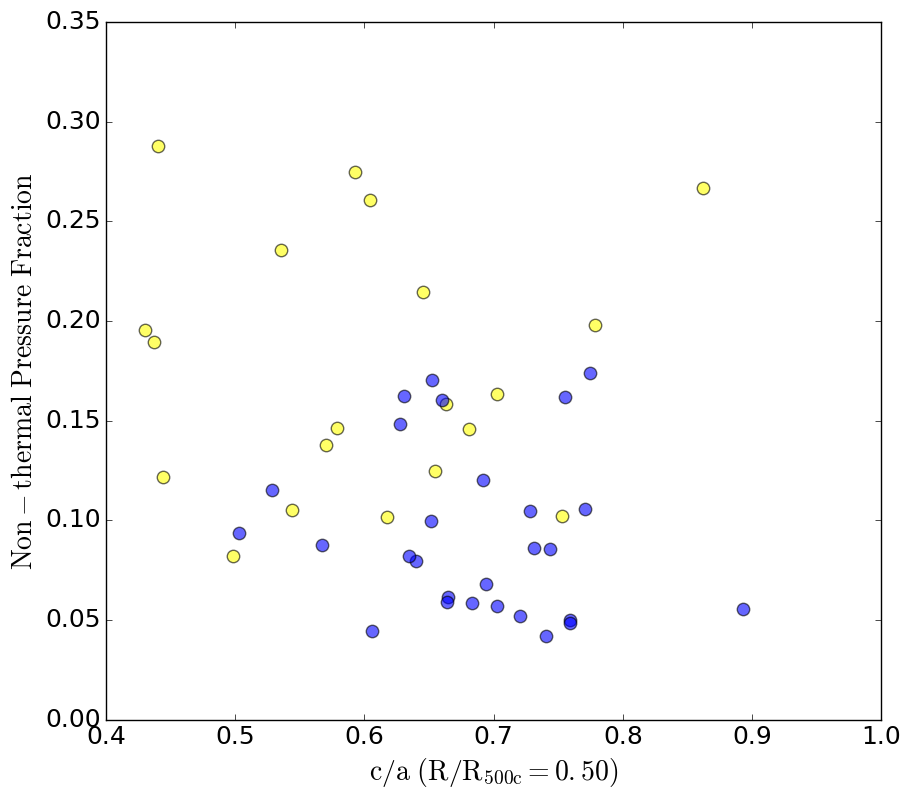

0.6
SpearmanrResult(correlation=-0.2372991749891446, pvalue=0.10437349234351763)


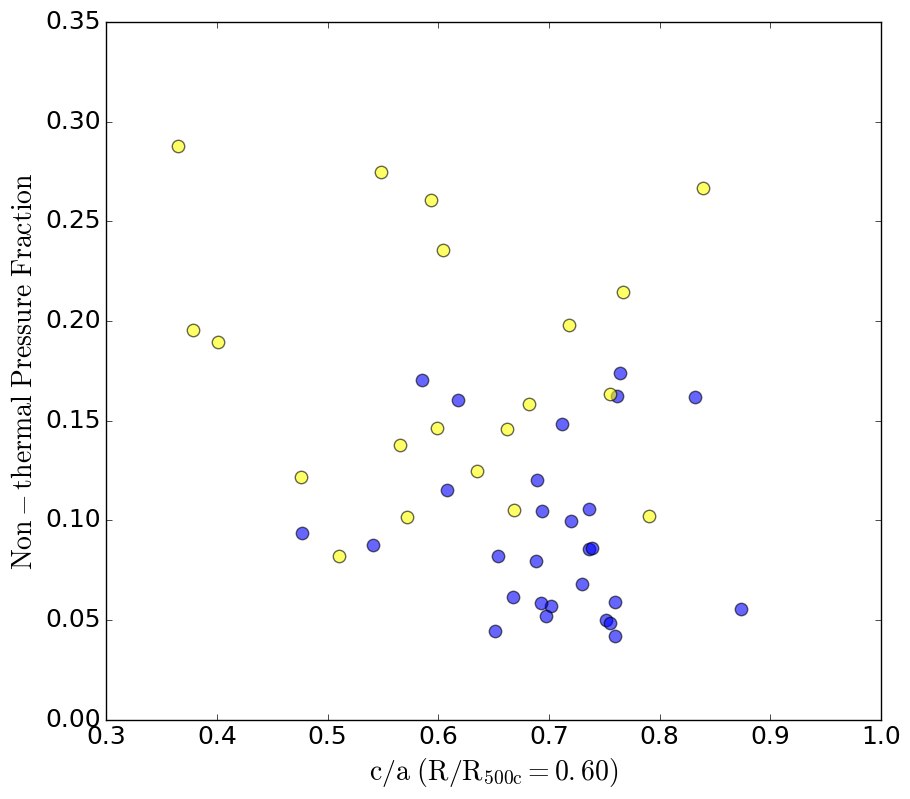

0.7
SpearmanrResult(correlation=-0.28658271819366038, pvalue=0.048290365323158245)


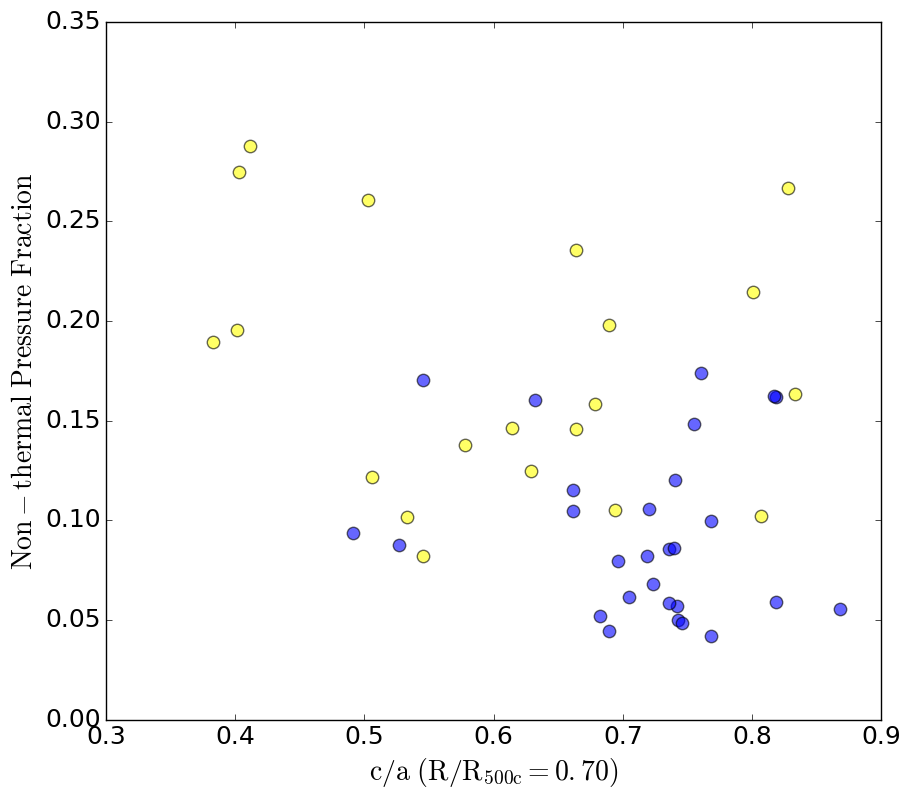

0.8
SpearmanrResult(correlation=-0.32142857142857145, pvalue=0.025900237018628605)


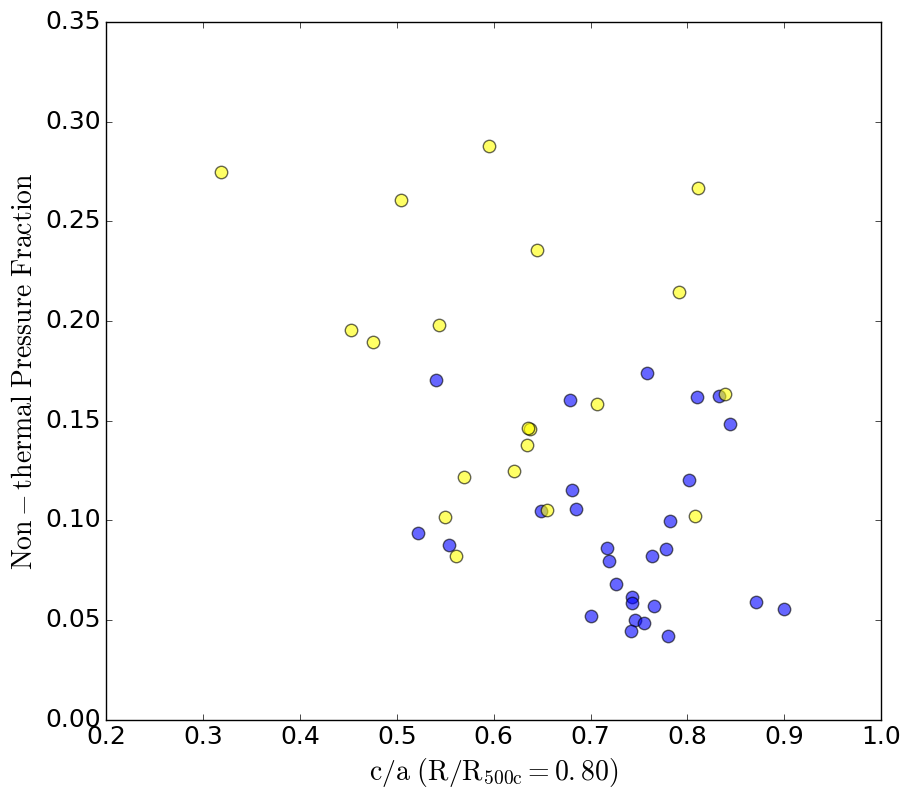

0.9
SpearmanrResult(correlation=-0.34227095093356491, pvalue=0.017254931973152705)


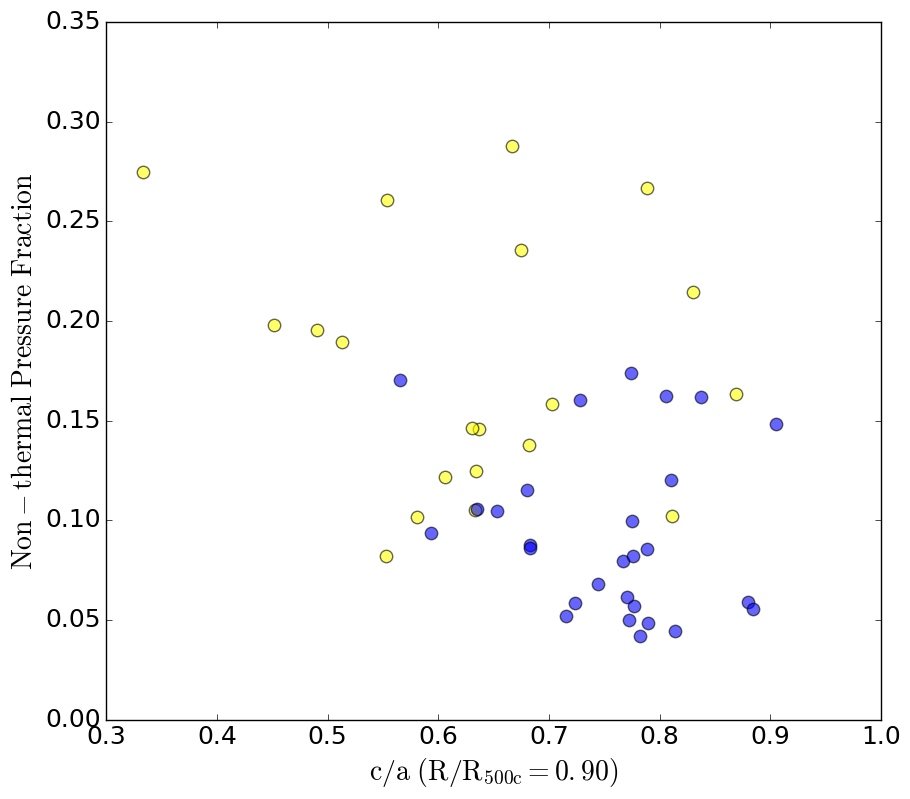

1.0
SpearmanrResult(correlation=-0.34769865392965693, pvalue=0.015456011578992289)


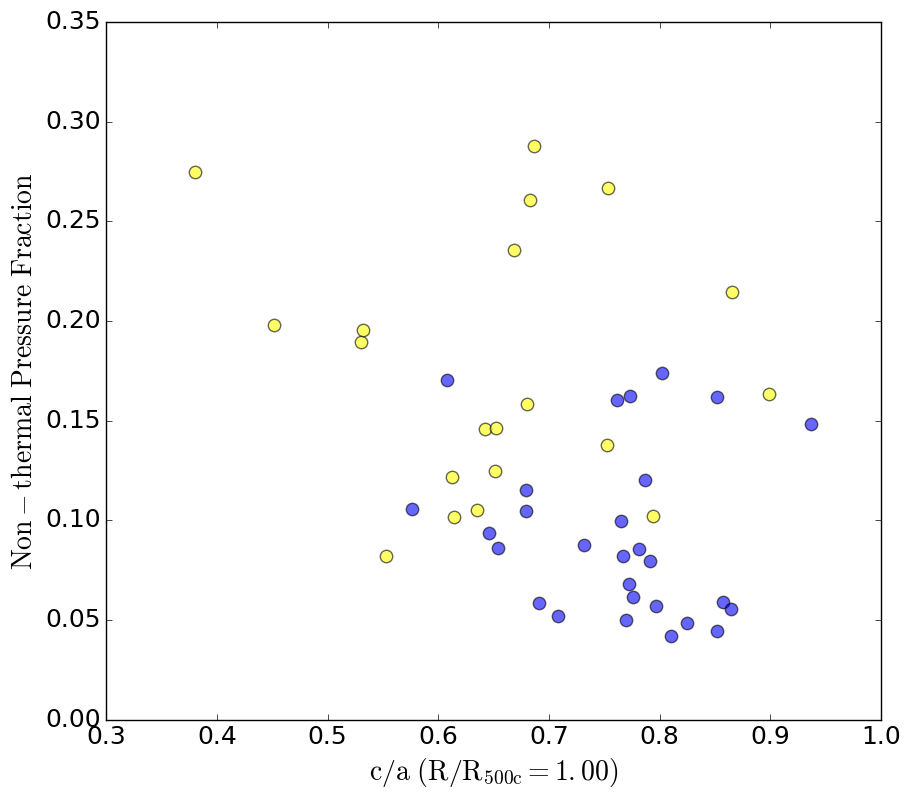

1.1
SpearmanrResult(correlation=-0.29923738714306564, pvalue=0.038815673179673223)


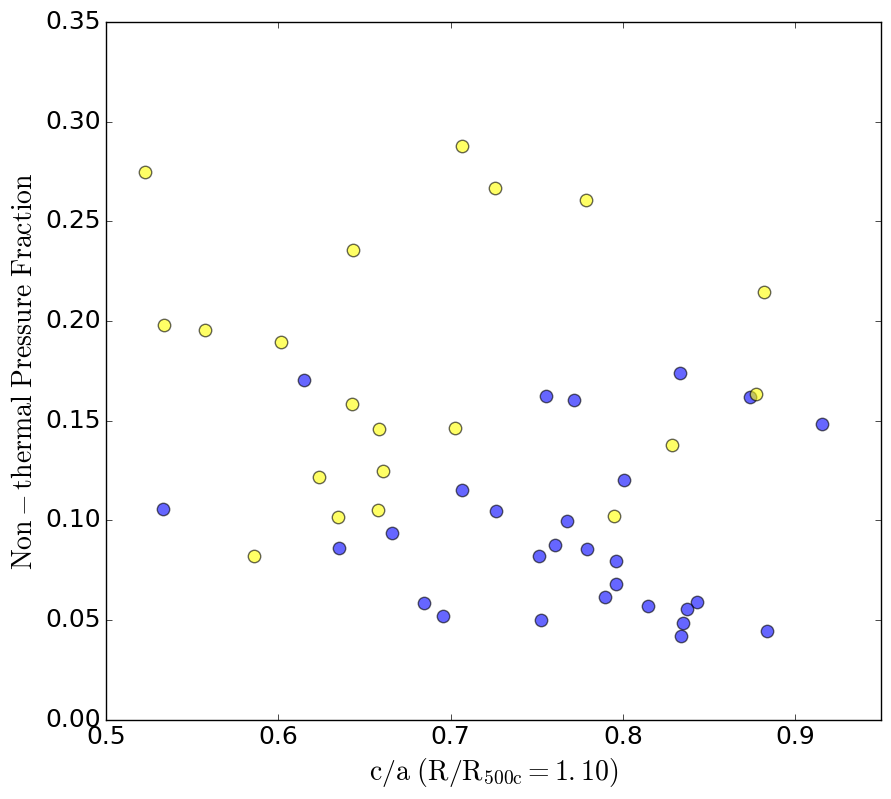

1.2
SpearmanrResult(correlation=-0.1974598349978289, pvalue=0.17853827818912071)


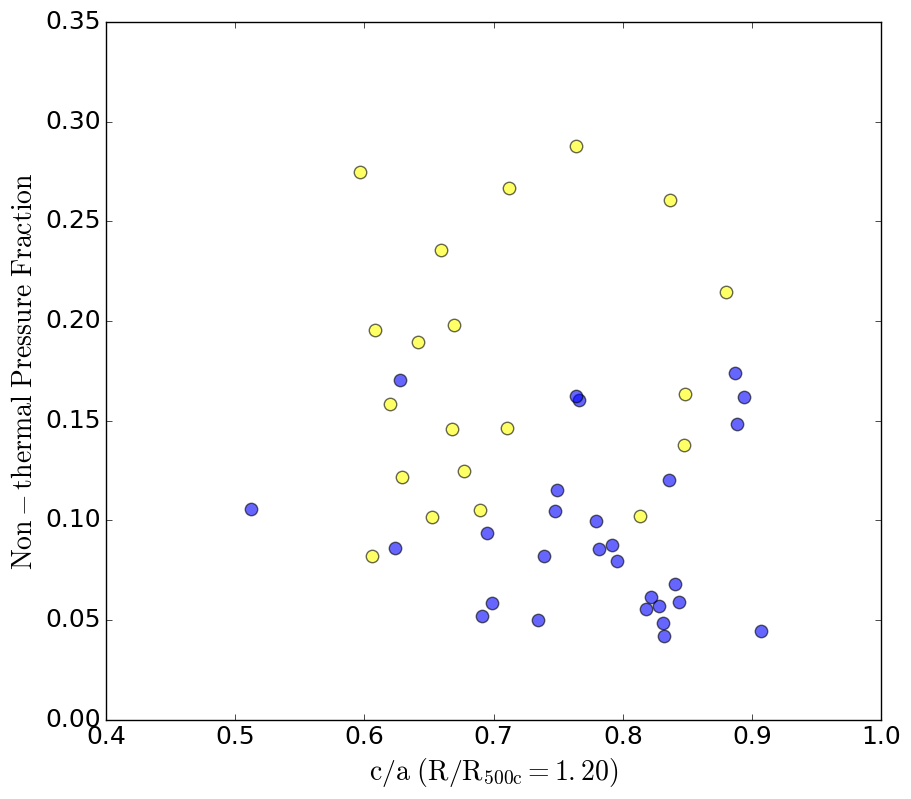

1.3
SpearmanrResult(correlation=-0.078050369083803722, pvalue=0.59798501261488335)


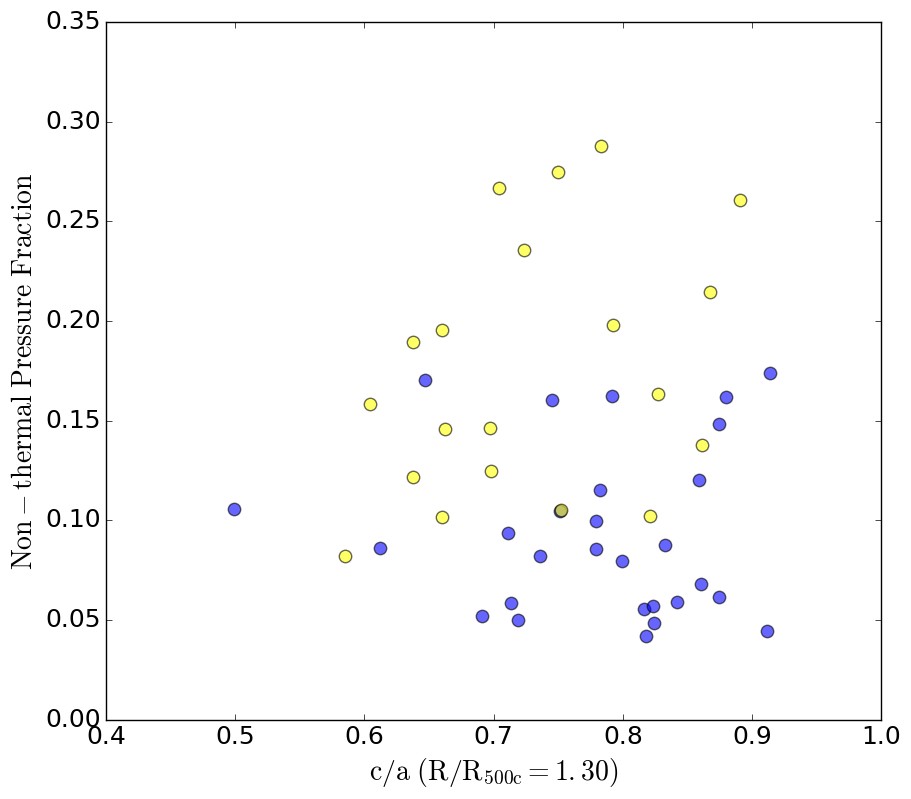

0.15
SpearmanrResult(correlation=-0.089217296113847822, pvalue=0.65164943194163505)


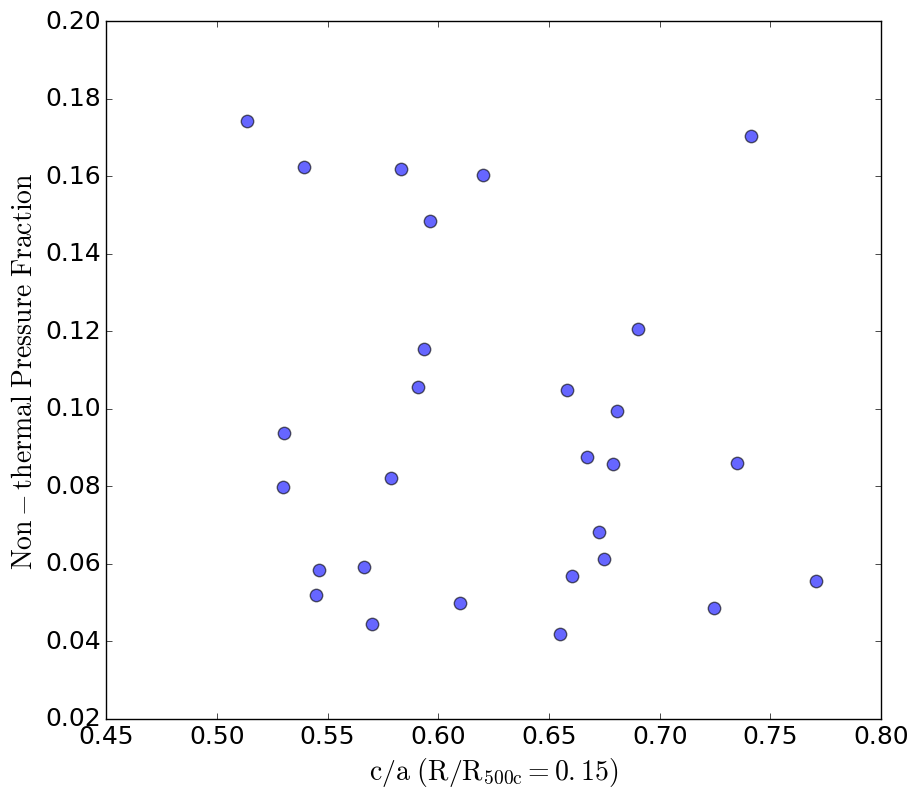

0.2
SpearmanrResult(correlation=-0.150519978106185, pvalue=0.44454837617623955)


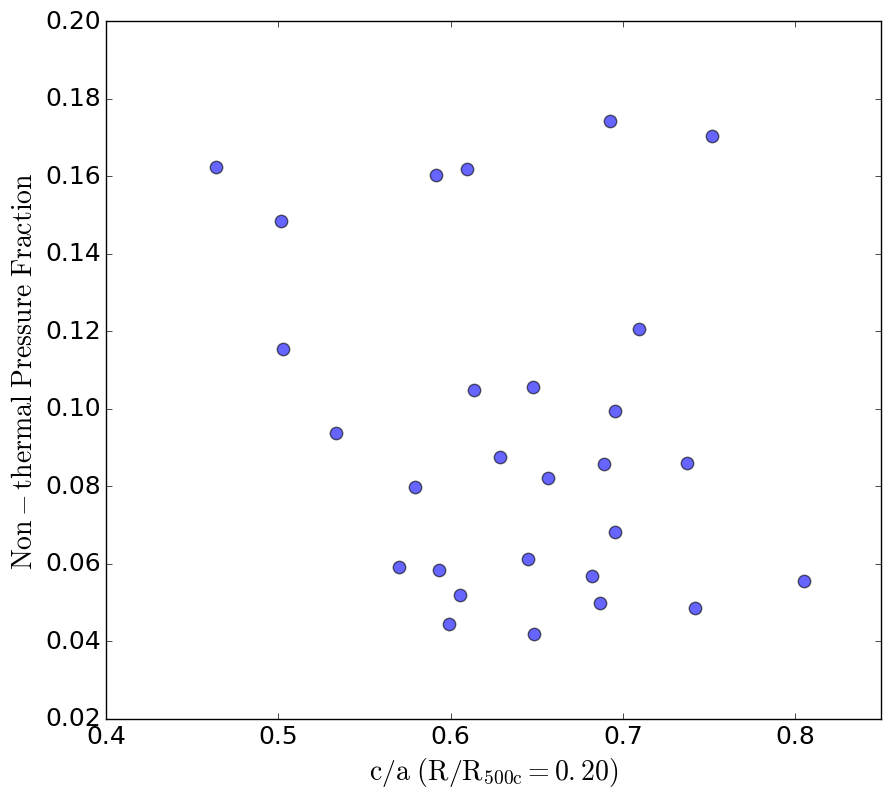

0.25
SpearmanrResult(correlation=-0.20744389709906952, pvalue=0.28949945936024263)


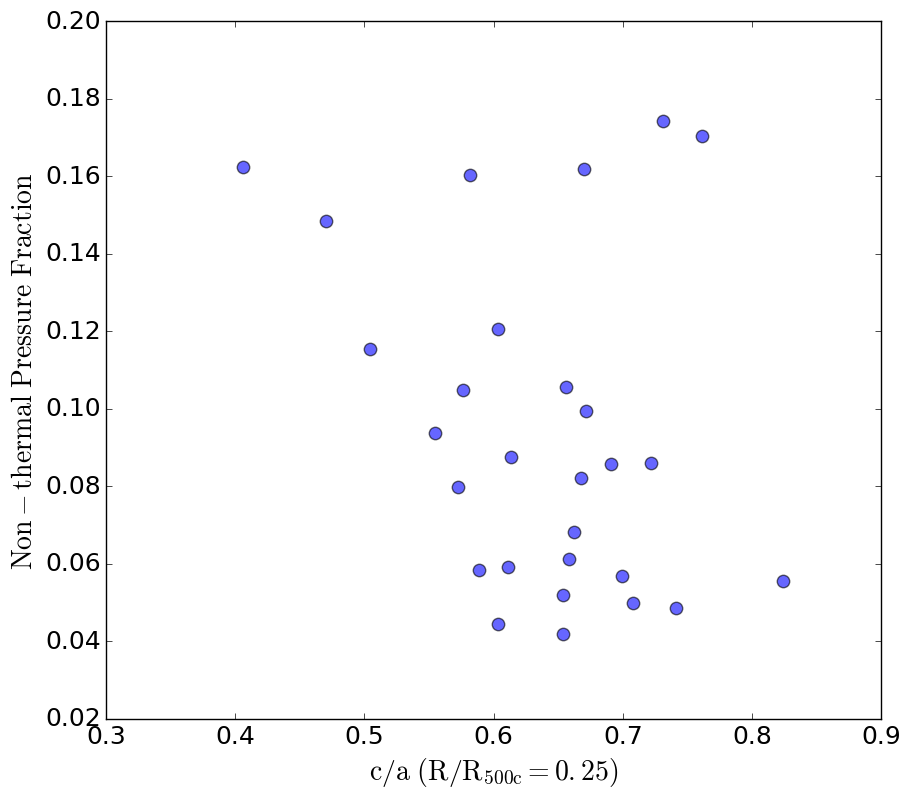

0.3
SpearmanrResult(correlation=-0.21620142309797483, pvalue=0.26915760111522175)


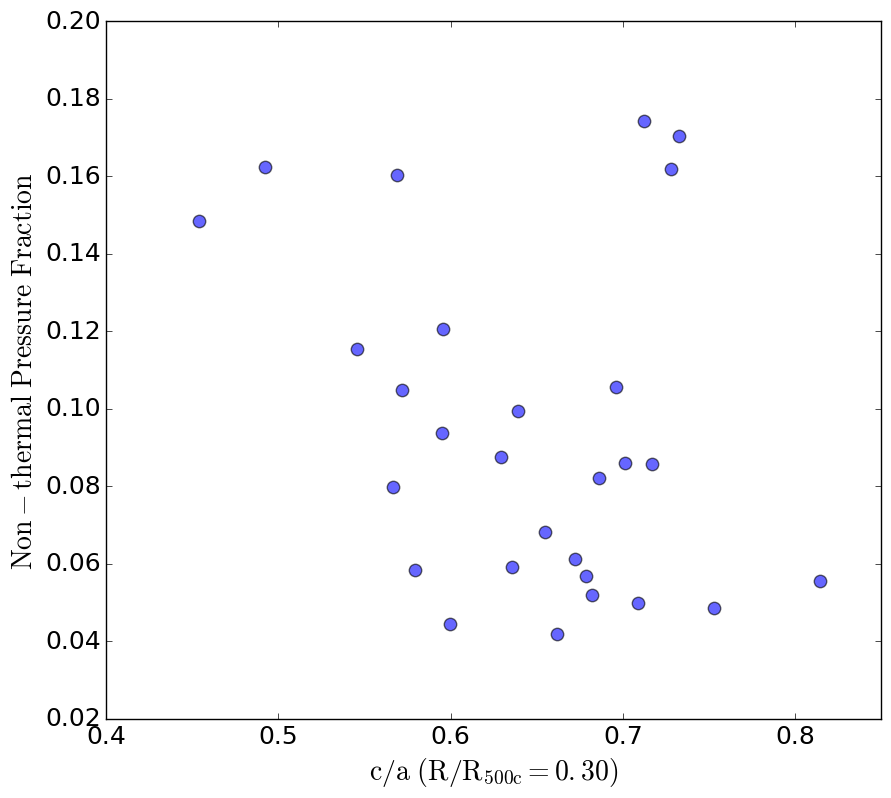

0.4
SpearmanrResult(correlation=-0.13519430760810072, pvalue=0.49276056221091769)


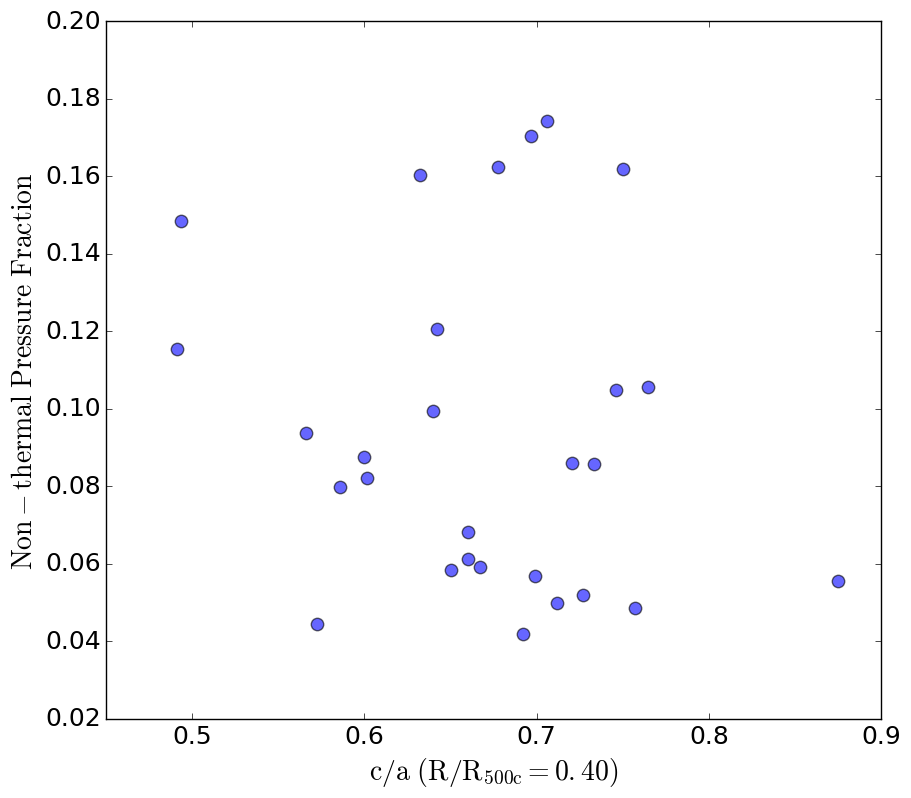

0.5
SpearmanrResult(correlation=-0.20361247947454844, pvalue=0.29869720722618331)


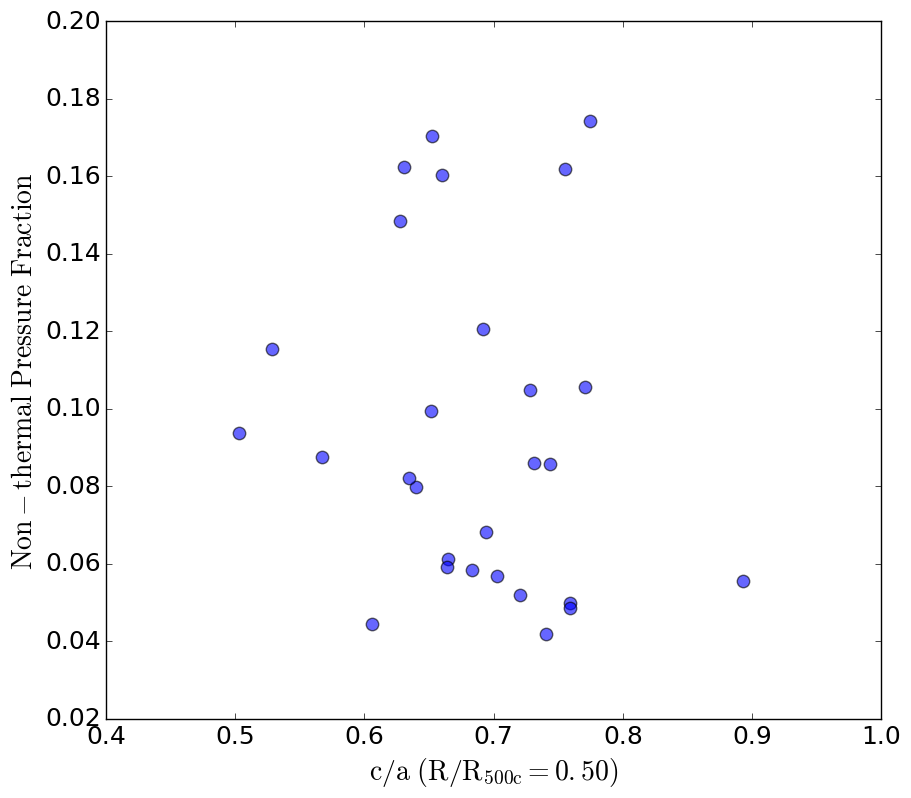

0.6
SpearmanrResult(correlation=-0.11001642036124794, pvalue=0.57731775420269682)


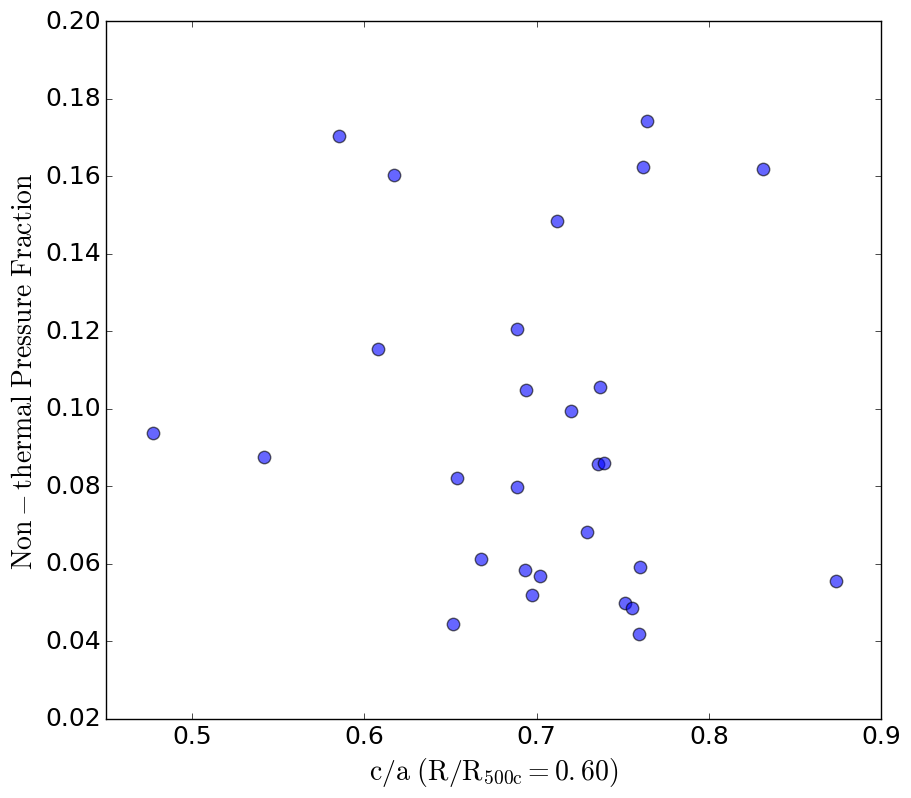

0.7
SpearmanrResult(correlation=-0.10946907498631636, pvalue=0.57922482686469601)


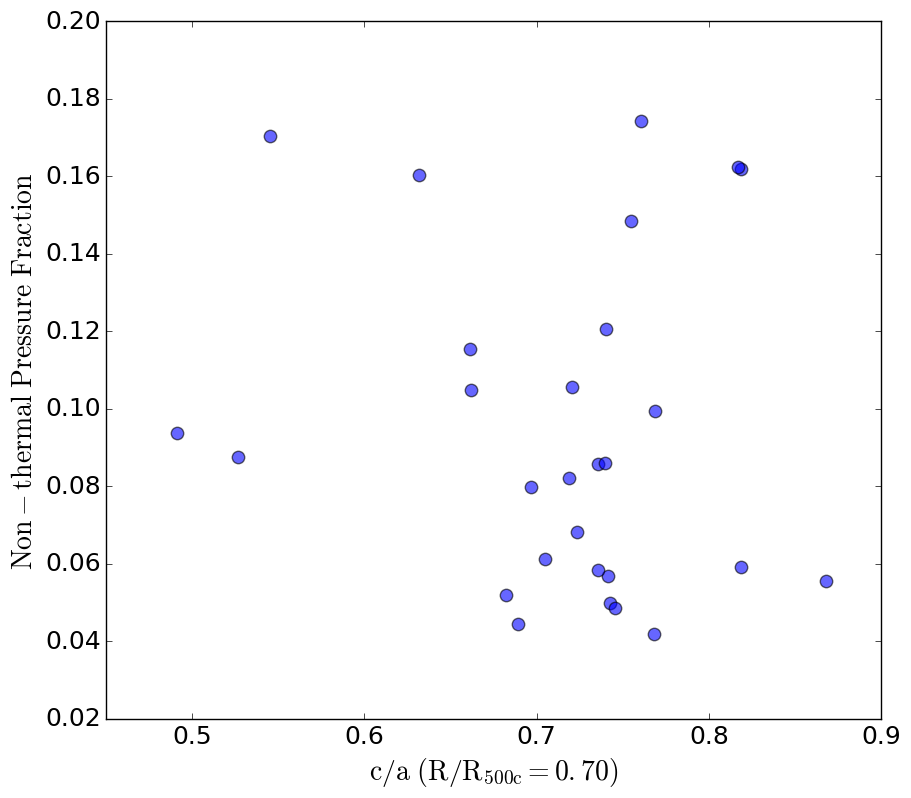

0.8
SpearmanrResult(correlation=-0.11439518336070059, pvalue=0.56216237761940513)


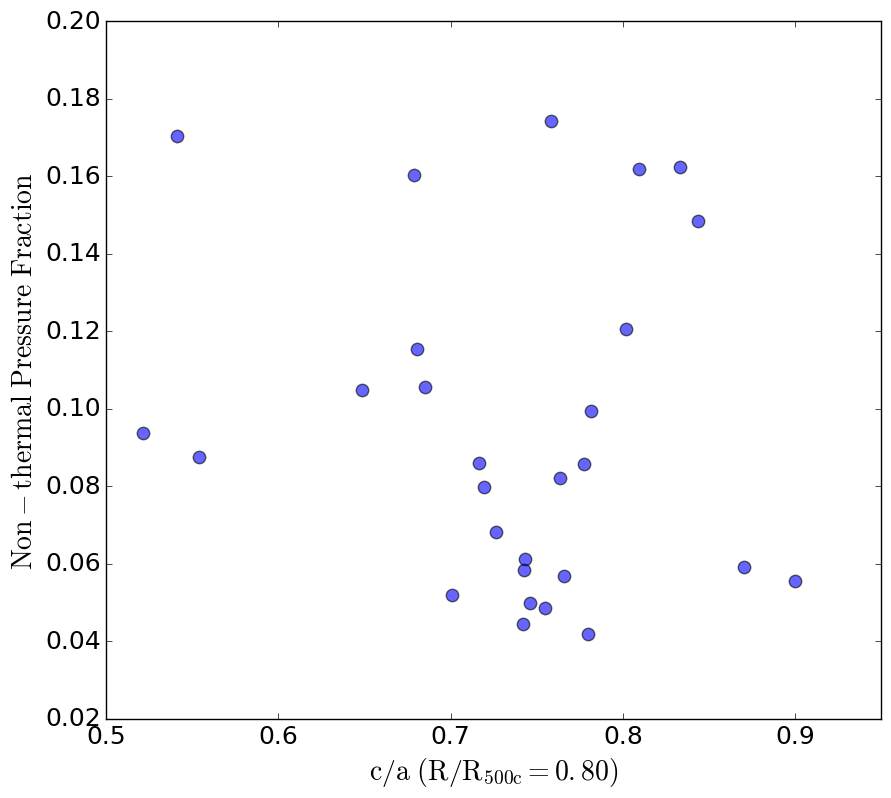

0.9
SpearmanrResult(correlation=-0.20415982484948003, pvalue=0.2973721322043047)


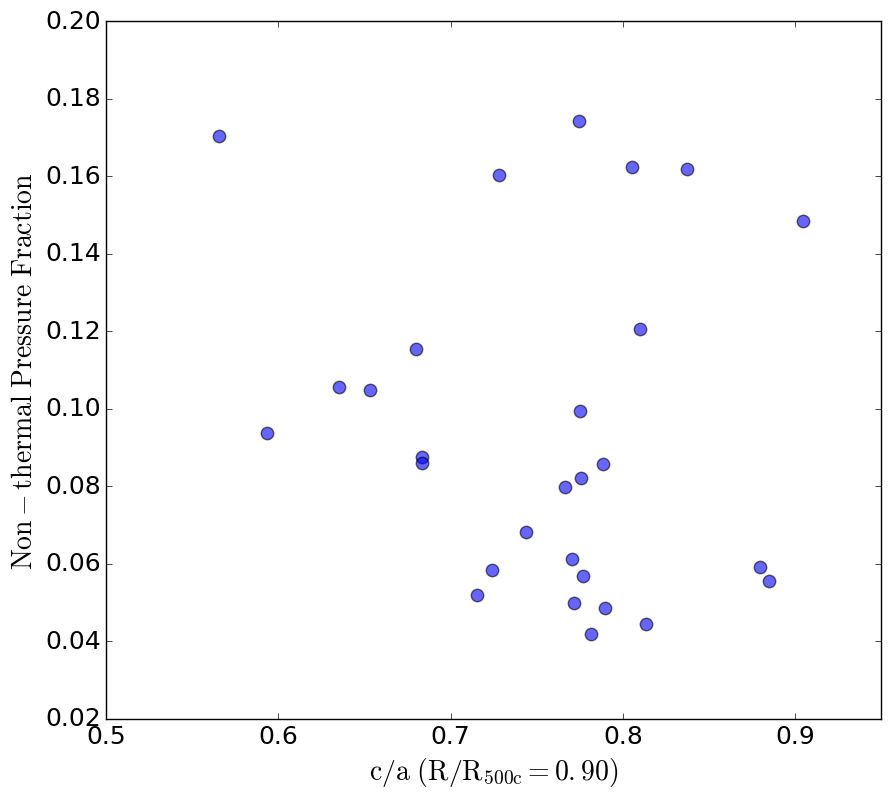

1.0
SpearmanrResult(correlation=-0.2857142857142857, pvalue=0.1405211373097249)


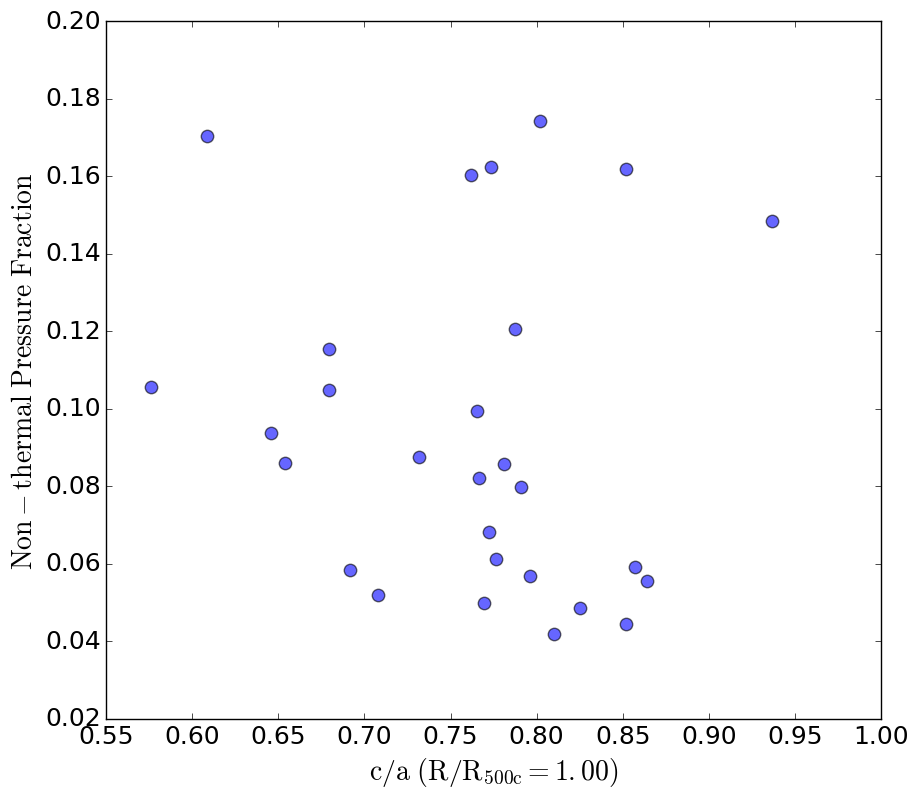

1.1
SpearmanrResult(correlation=-0.21869440467561507, pvalue=0.26354020687575241)


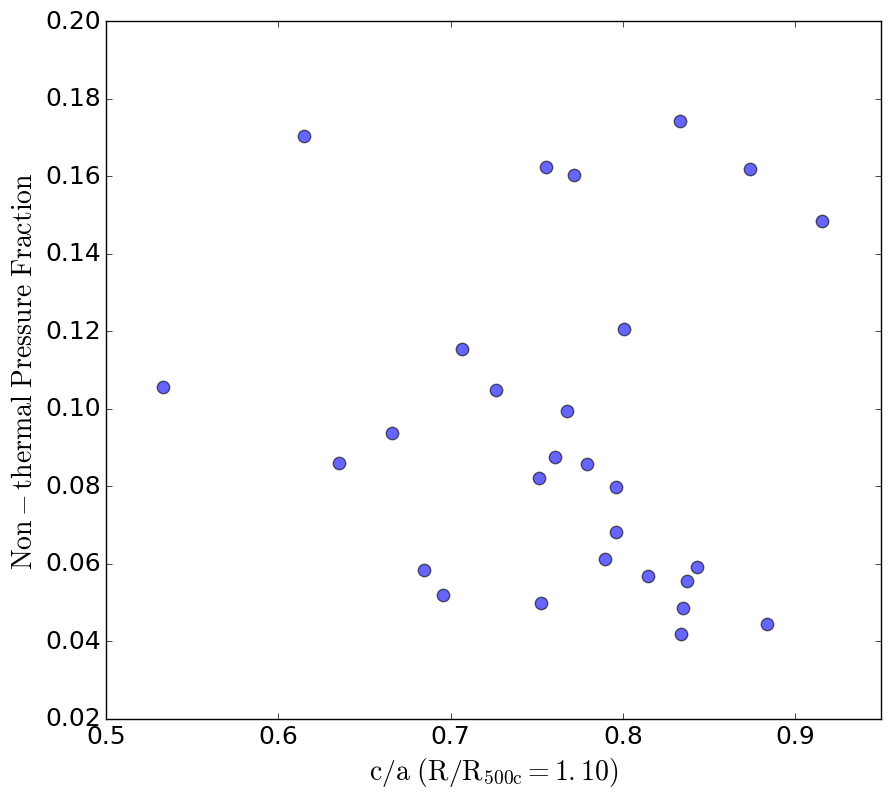

1.2
SpearmanrResult(correlation=-0.0963327859879584, pvalue=0.6258037616535671)


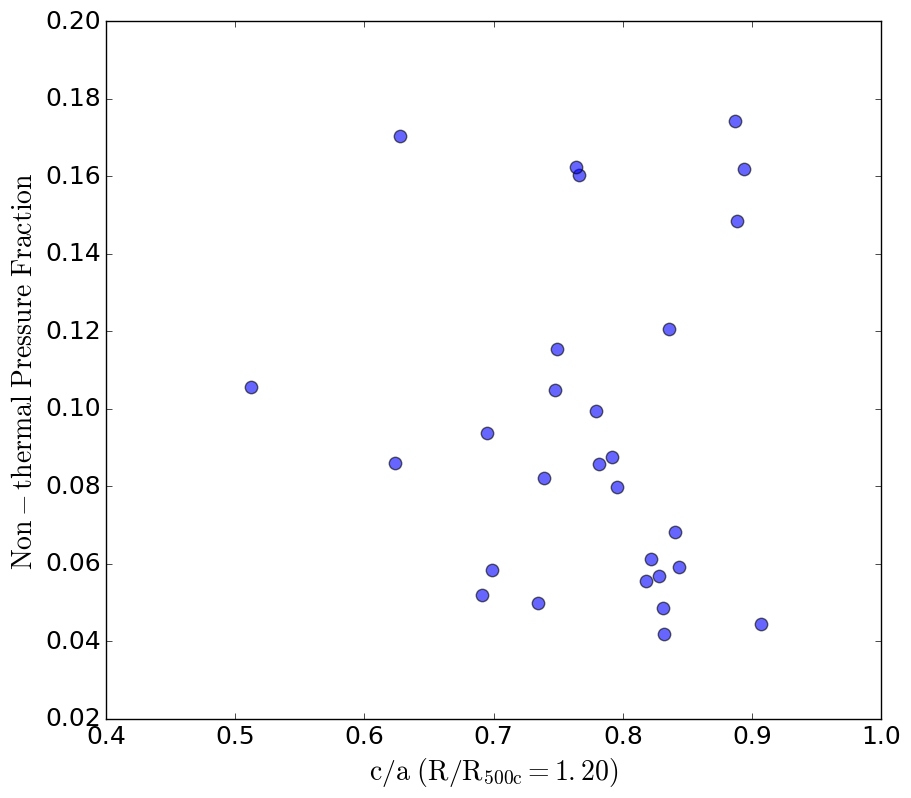

1.3
SpearmanrResult(correlation=-0.018062397372742199, pvalue=0.92731233247697031)


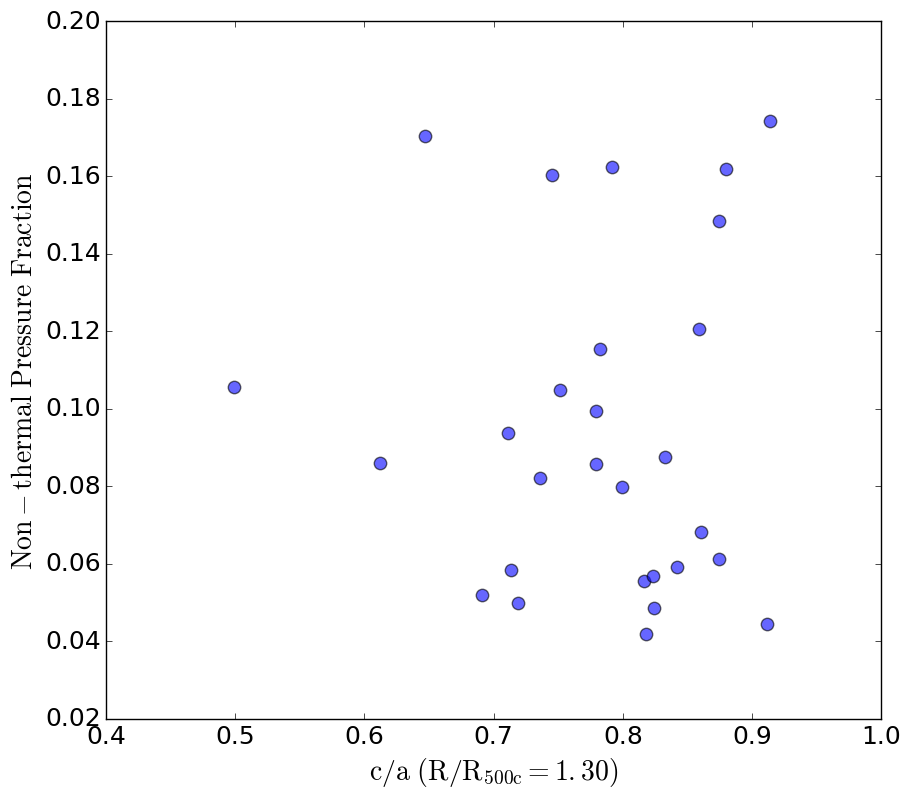

In [121]:
yq=DT
ylab=r'$\rm \Delta T$'
yq=fnt
ylab=r"$\rm Non-thermal \ Pressure \ Fraction$"
rl,spall=plot_coa_spearman(yq, ylab,subsample='all')
rl,spexmajor=plot_coa_spearman(yq, ylab,subsample='exmajor')
rl,spsmooth=plot_coa_spearman(yq, ylab,subsample='smooth')

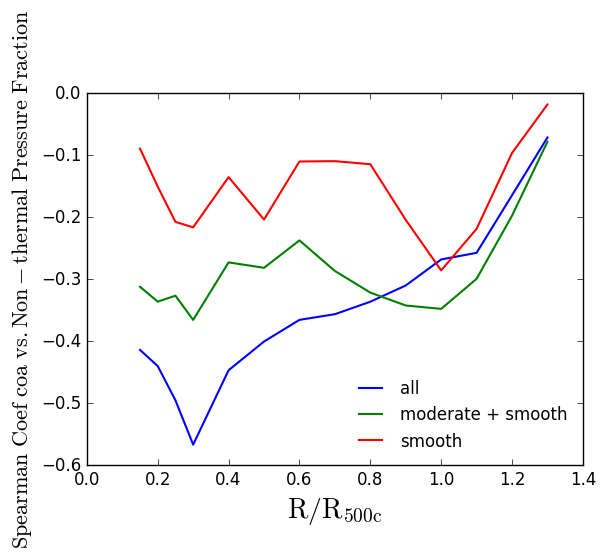

In [123]:
plt.plot(rl,spall,label='all')
plt.plot(rl,spexmajor,label='moderate + smooth')
plt.plot(rl,spsmooth,label='smooth')
plt.legend()
plt.xlabel(r'$\rm  R/R_{500c}$',fontsize=20)
plt.ylabel(r'$\rm Spearman \ Coef \ coa \ vs. $'+ylab)
plt.savefig('Spearman.png')
plt.show()

0.15
SpearmanrResult(correlation=-0.30676691729323302, pvalue=0.18832319847855761)


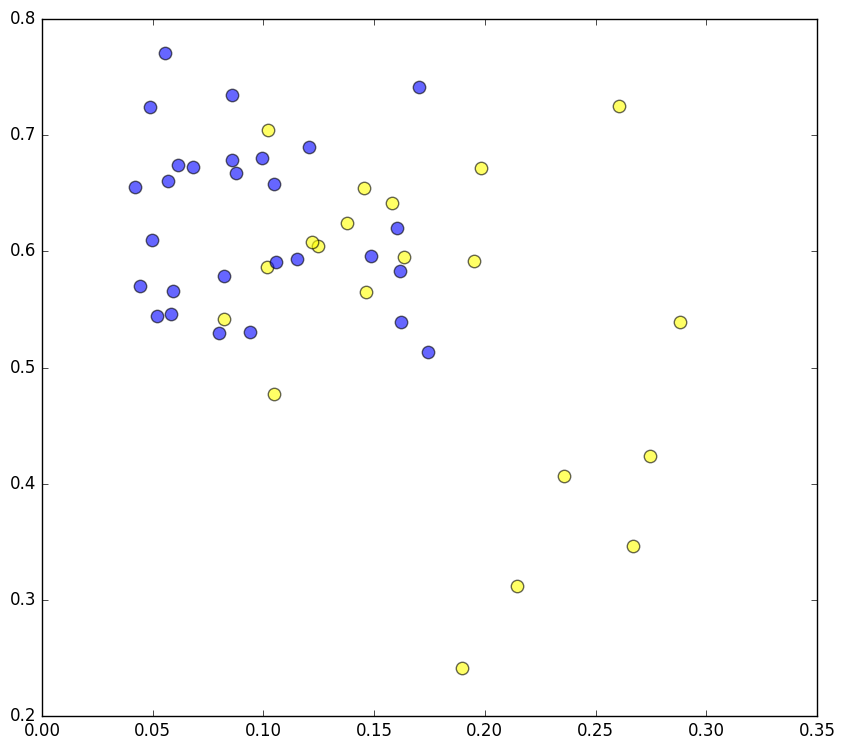

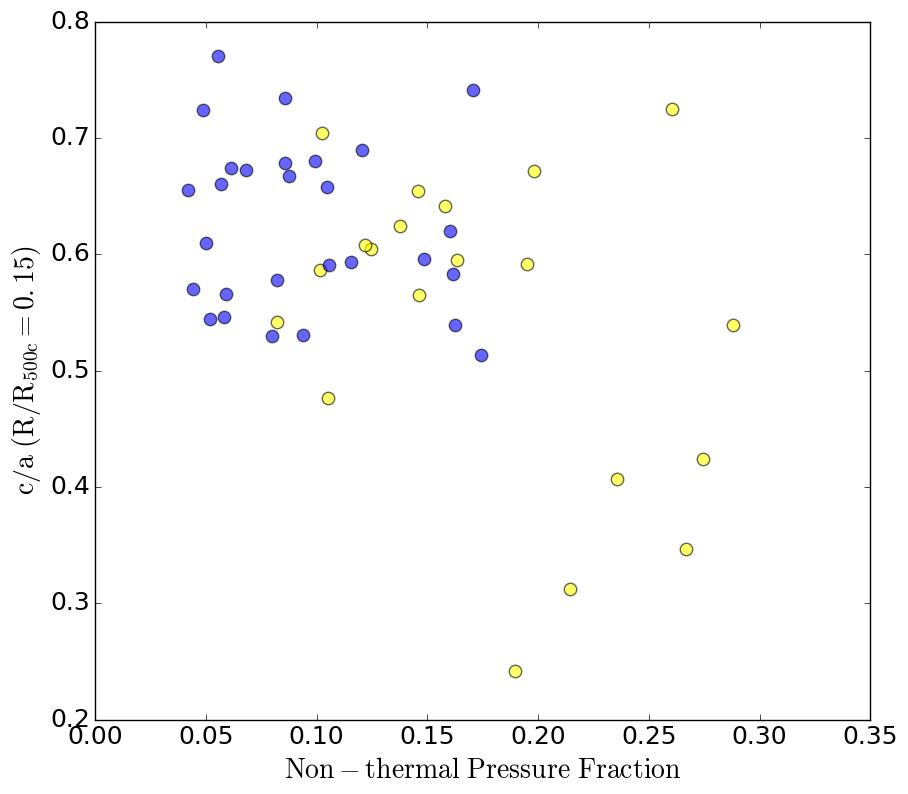

0.2
SpearmanrResult(correlation=-0.22706766917293231, pvalue=0.33567443101341787)


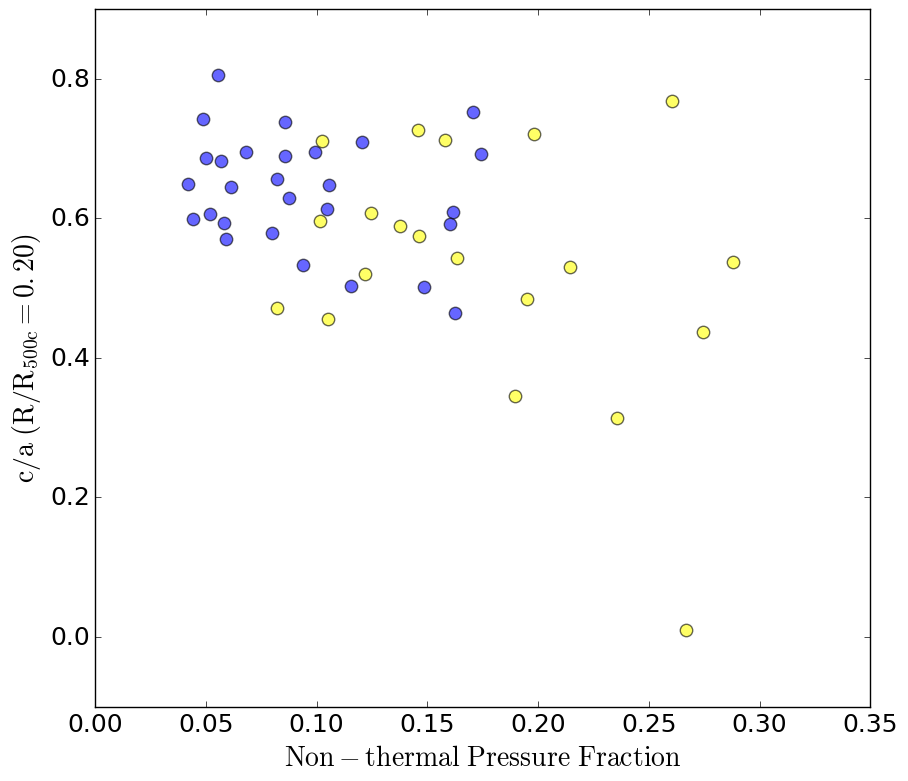

0.25
SpearmanrResult(correlation=-0.23759398496240602, pvalue=0.3131305637442674)


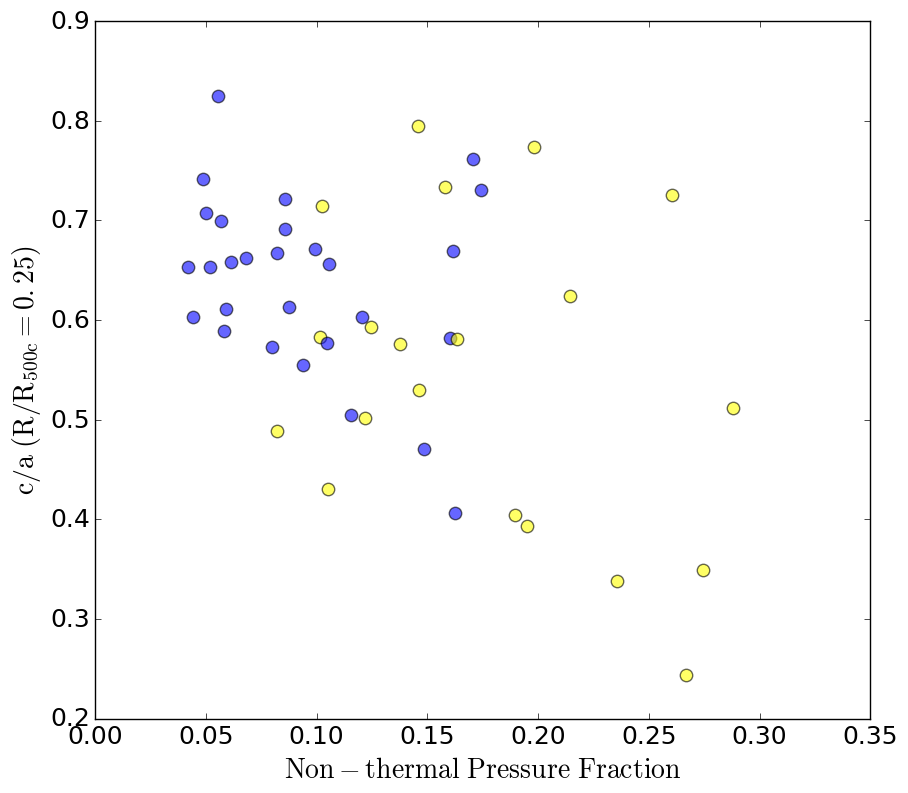

0.3
SpearmanrResult(correlation=-0.34887218045112778, pvalue=0.13166317155695248)


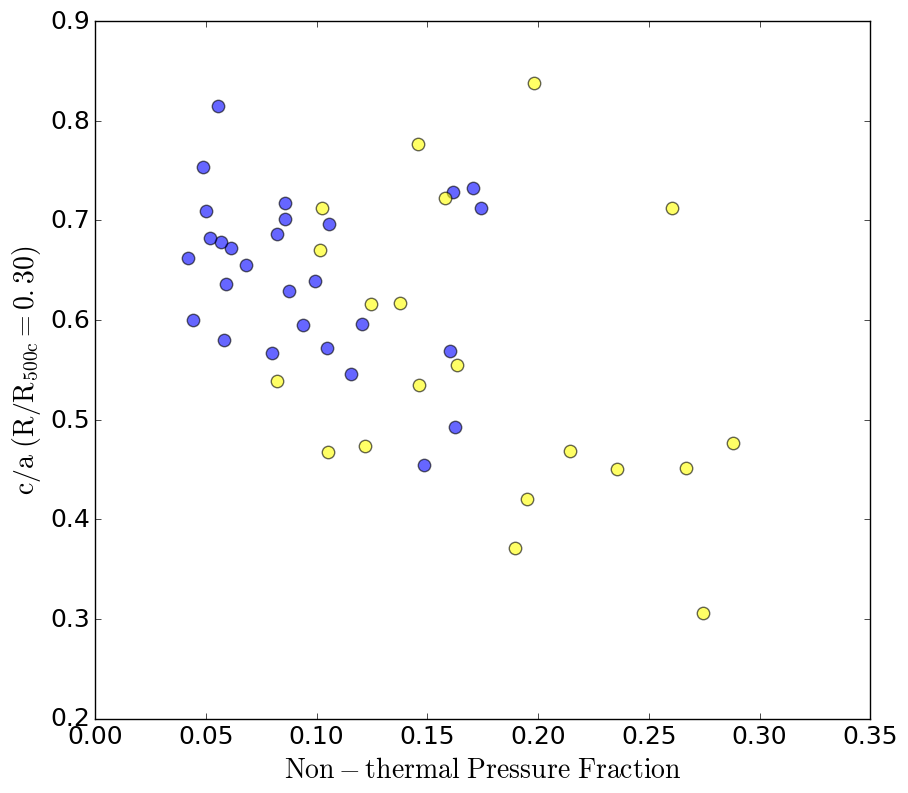

0.4
SpearmanrResult(correlation=-0.12481203007518797, pvalue=0.60007441841449793)


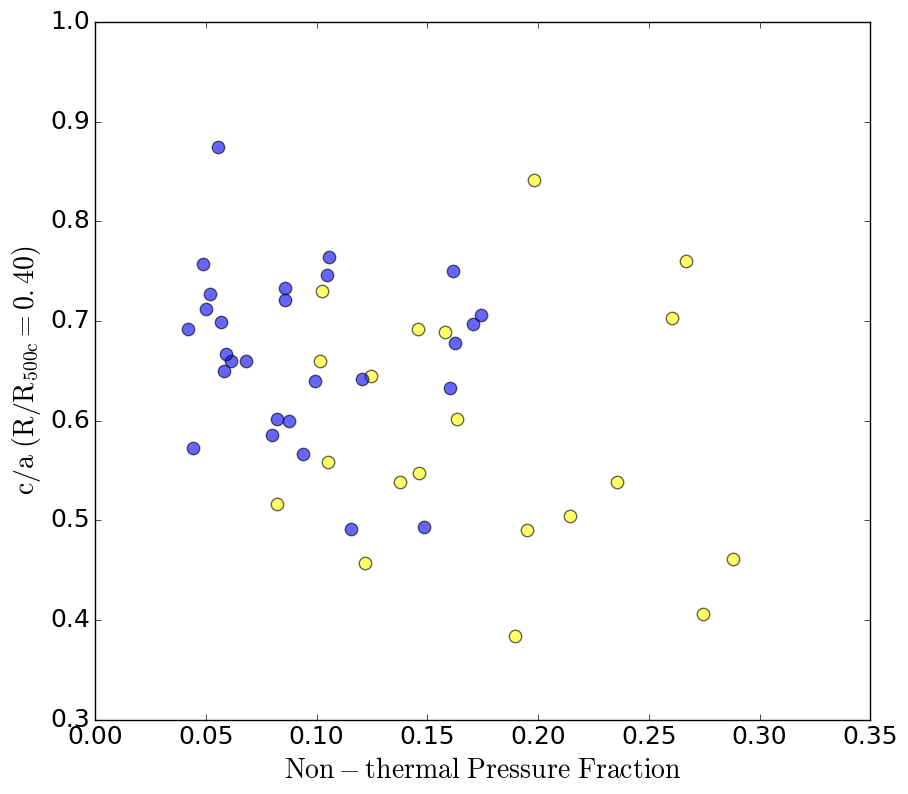

0.5
SpearmanrResult(correlation=0.0045112781954887212, pvalue=0.98494004834040183)


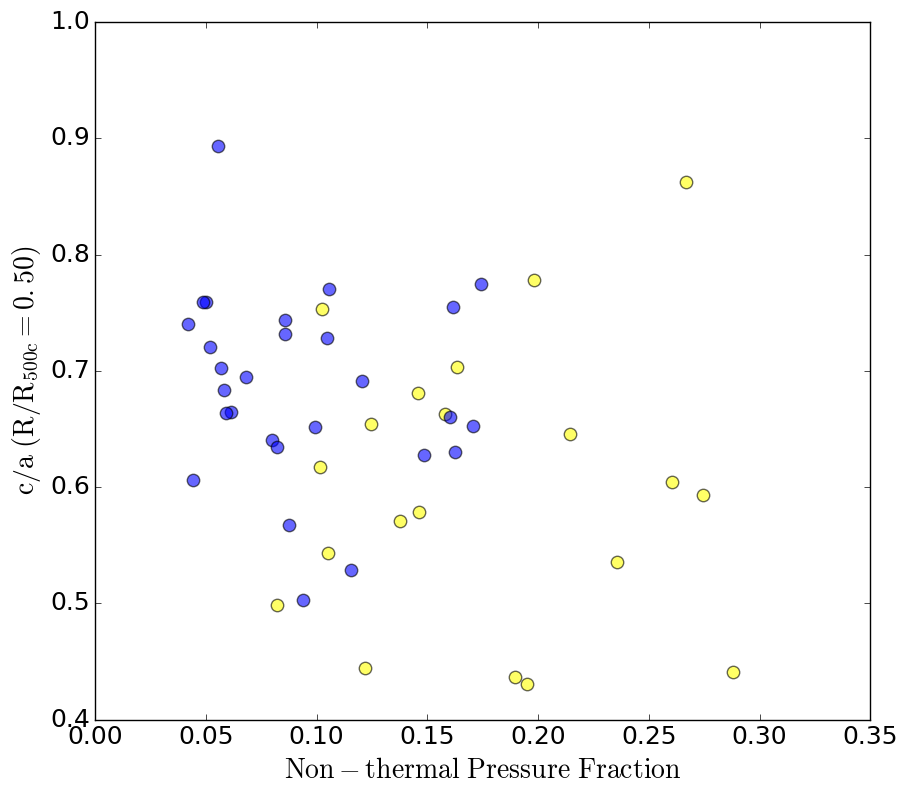

0.6
SpearmanrResult(correlation=-0.030075187969924807, pvalue=0.89983659568593044)


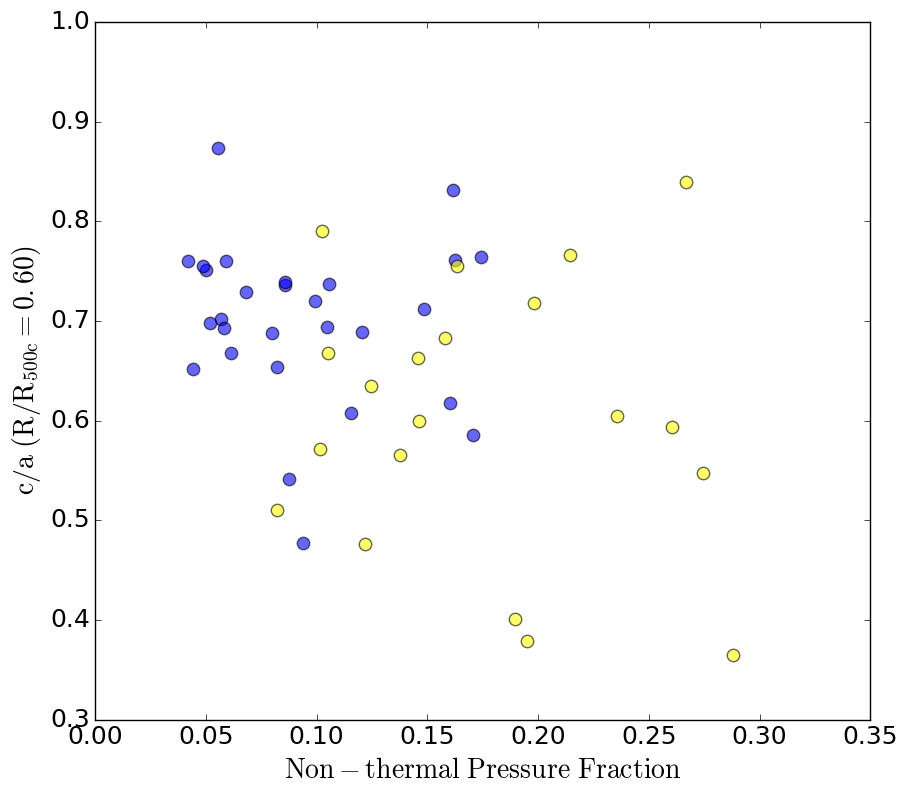

0.7
SpearmanrResult(correlation=-0.13984962406015036, pvalue=0.5564935505662203)


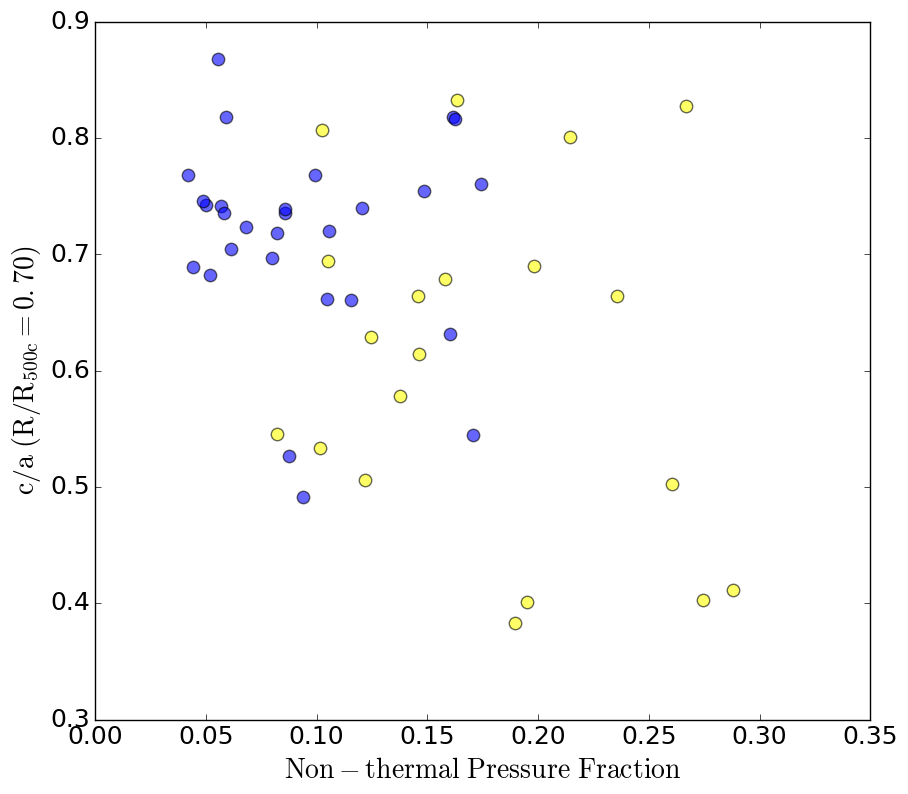

0.8
SpearmanrResult(correlation=-0.12481203007518797, pvalue=0.60007441841449793)


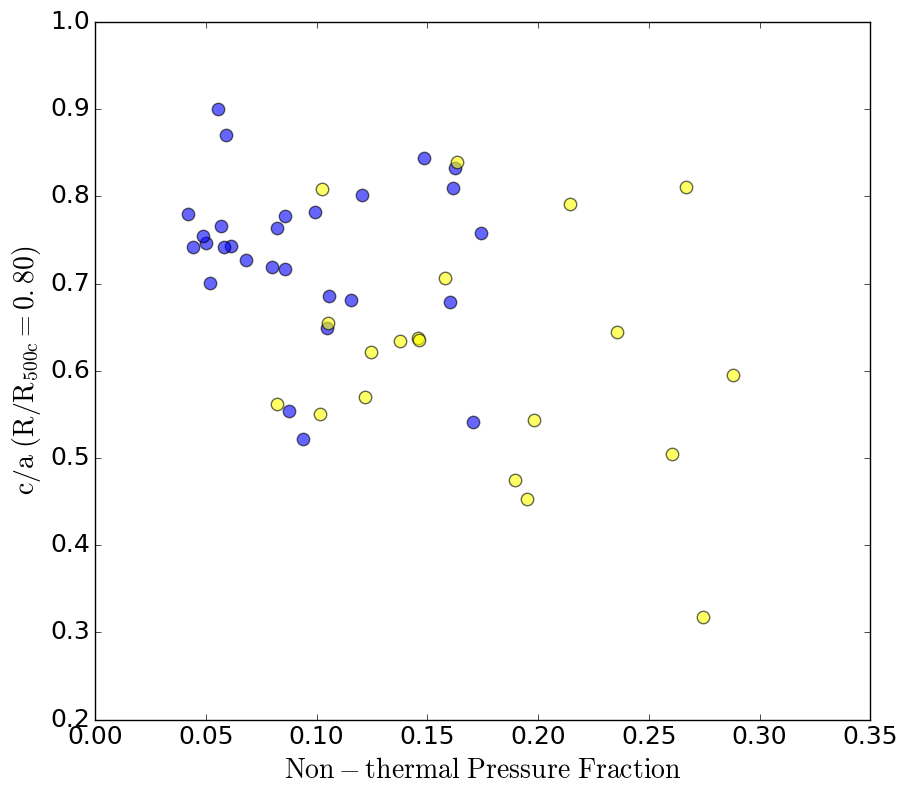

0.9
SpearmanrResult(correlation=-0.019548872180451125, pvalue=0.93480312352146377)


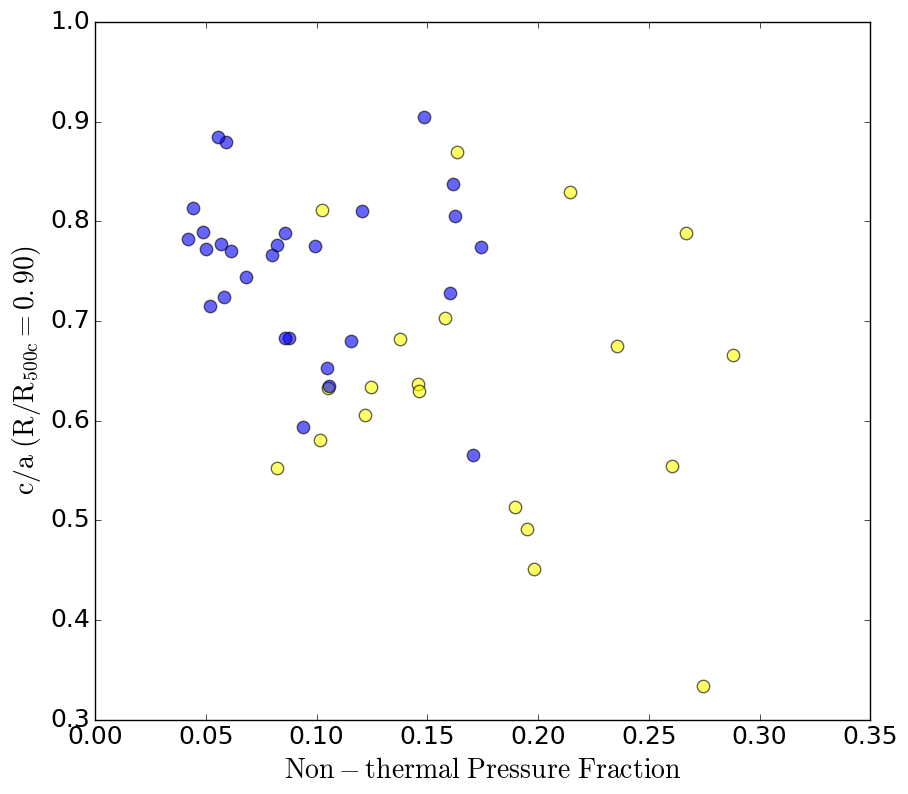

1.0
SpearmanrResult(correlation=0.11879699248120301, pvalue=0.6178918280262935)


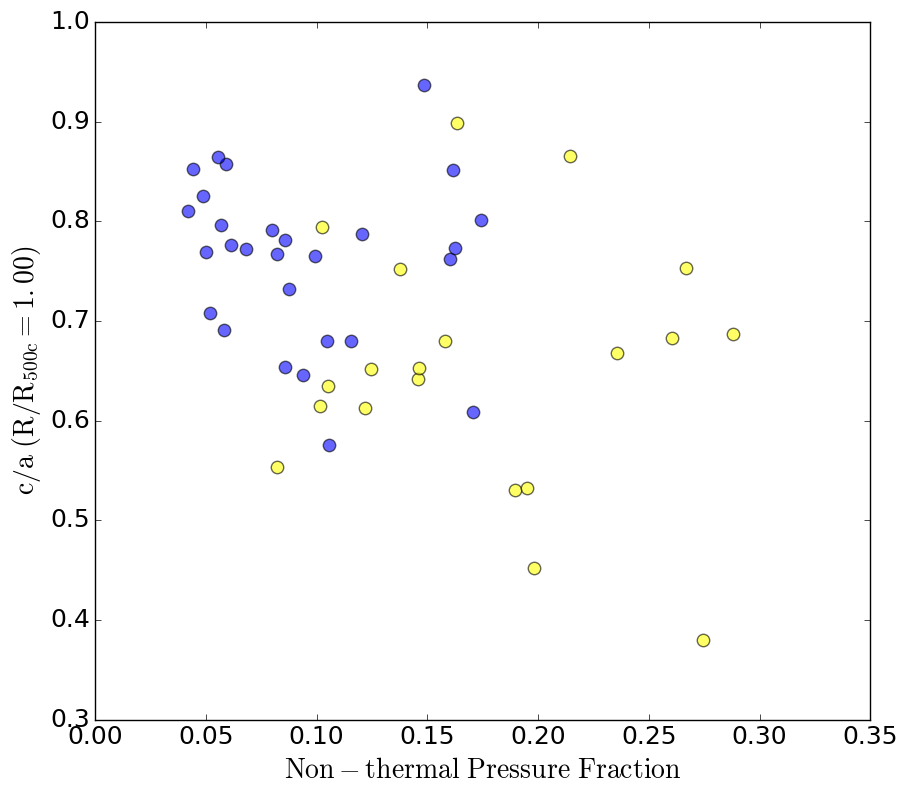

1.1
SpearmanrResult(correlation=0.057142857142857141, pvalue=0.81088004615683229)


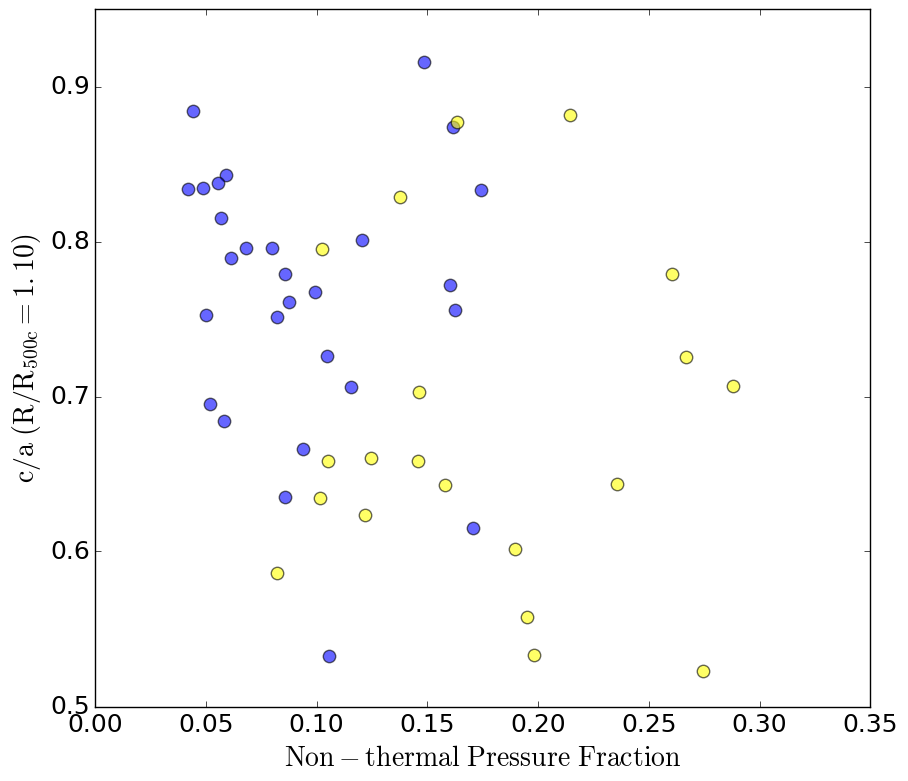

In [56]:
spDT=[]
for ir in range(1,13):
    print rlist[ir]
    ell_r500c=allelldata[:,ir]
    ell_r500c_new=[]
    for ids in z0idnew:
        i=np.where(allz0id==ids)[0][0]
        ell_r500c_new.append(ell_r500c[i])
        
        
    spx=[]
    spy=[]
    plt.figure(figsize=(10,9))
    for isubsample,ids in enumerate(z0idnew):
        i=np.where(z0idnew==ids)[0][0]
        if ids in minormajormergerid:
            if ids in majormergerid:
                pass
#                 plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
            else:
                spx.append(fnt[i])
                spy.append(ell_r500c_new[i])
                plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
#                 plt.scatter(fnt[i],ell_r500c_new[i],c='yellow',s=80,alpha=0.6)
        else:
            plt.scatter(fnt[i],ell_r500c_new[i],c='b',s=80,alpha=0.6)

        txt=str(int(z0idnew[i])) 
    #     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
    #                      alpha=0.8,fontsize=16)
#         spx.append(fnt[i])
#         spy.append(ell_r500c_new[i])
    print spearmanr(spx,spy)
    spDT.append(spearmanr(spx,spy)[0])
    ax=plt.gca()

    change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

#     plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
#     plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
    plt.xlabel(r"$\rm Non-thermal \ Pressure \ Fraction$",fontsize=20)
    plt.ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
    plt.savefig('tmp'+str(ir)+'.png')
    plt.show()


# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
# plt.savefig('Mbias_DT.png')
# print spearmanr(spx,spy)
# plt.savefig('Mbias_ell.png')
# plt.show()

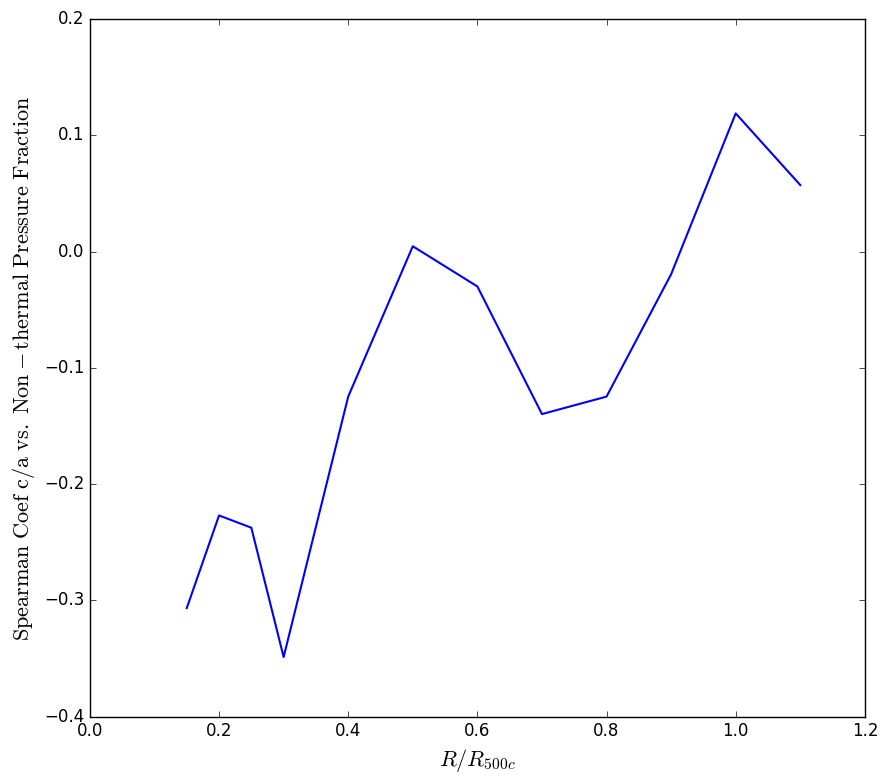

In [57]:
plt.figure(figsize=(10,9))
plt.plot(rlist[1:13],spDT)
plt.xlabel(r'$R/R_{500c}$')
# plt.ylabel(r'$\rm Spearman \ Coef \ c/a \ vs. \Delta T $')
plt.ylabel(r'$\rm Spearman \ Coef \ c/a \ vs. \ Non-thermal \ Pressure \ Fraction $')
plt.savefig('spearman_fnt.png')
plt.show()

0.15
SpearmanrResult(correlation=0.024041289083598396, pvalue=0.81232739823772493)


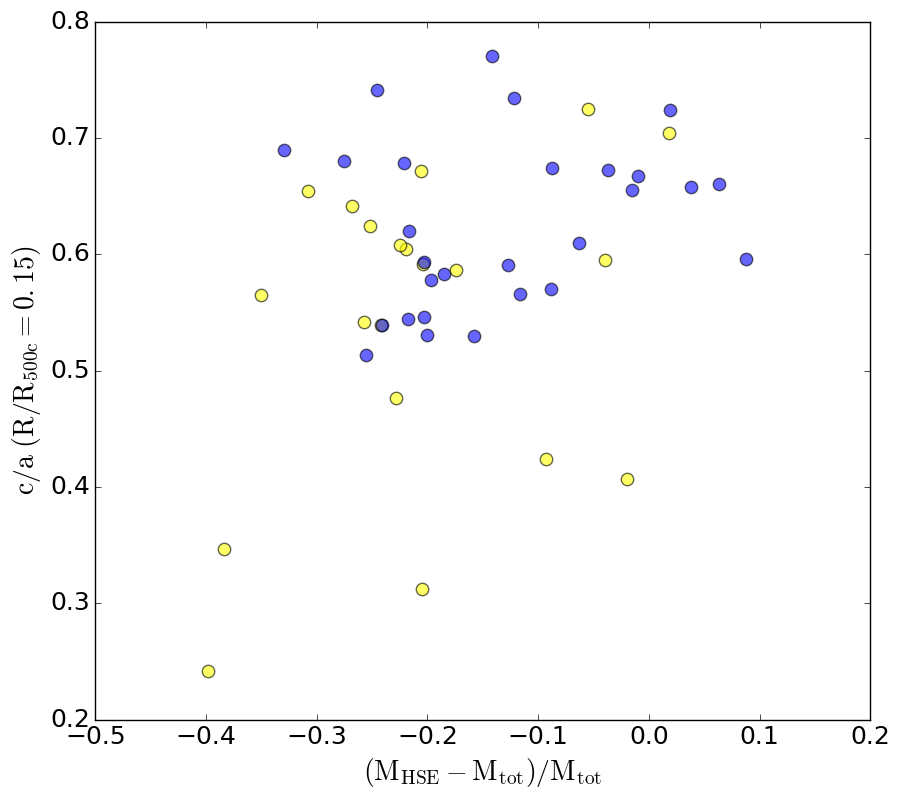

0.2
SpearmanrResult(correlation=0.014847266398607695, pvalue=0.88343665522448633)


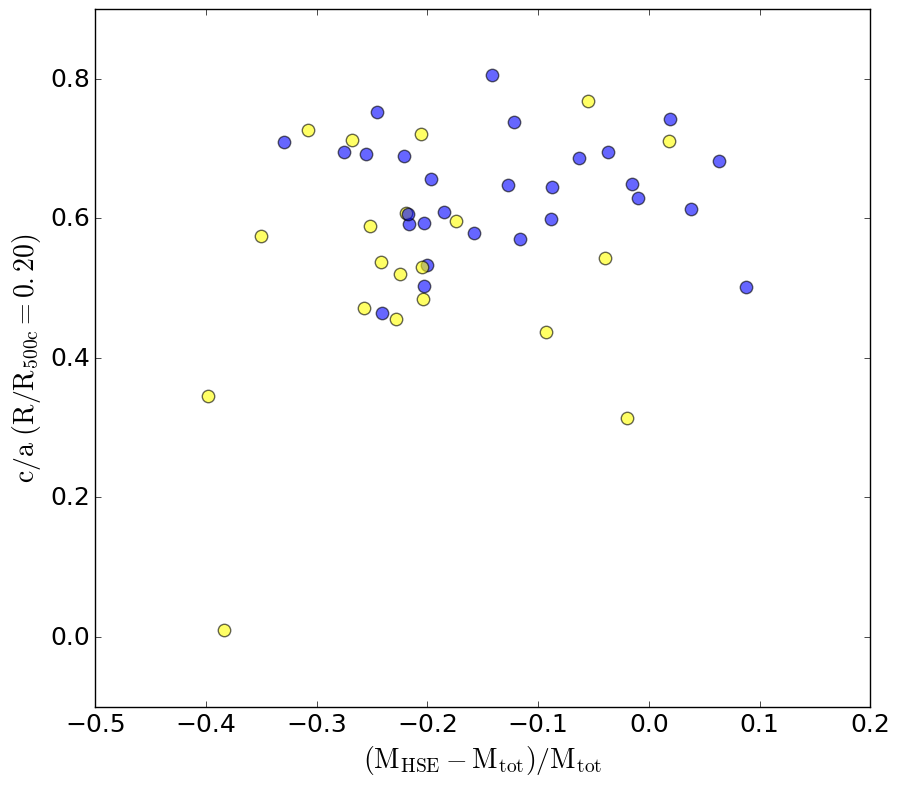

0.25
SpearmanrResult(correlation=0.0069975394586809098, pvalue=0.94491283345548127)


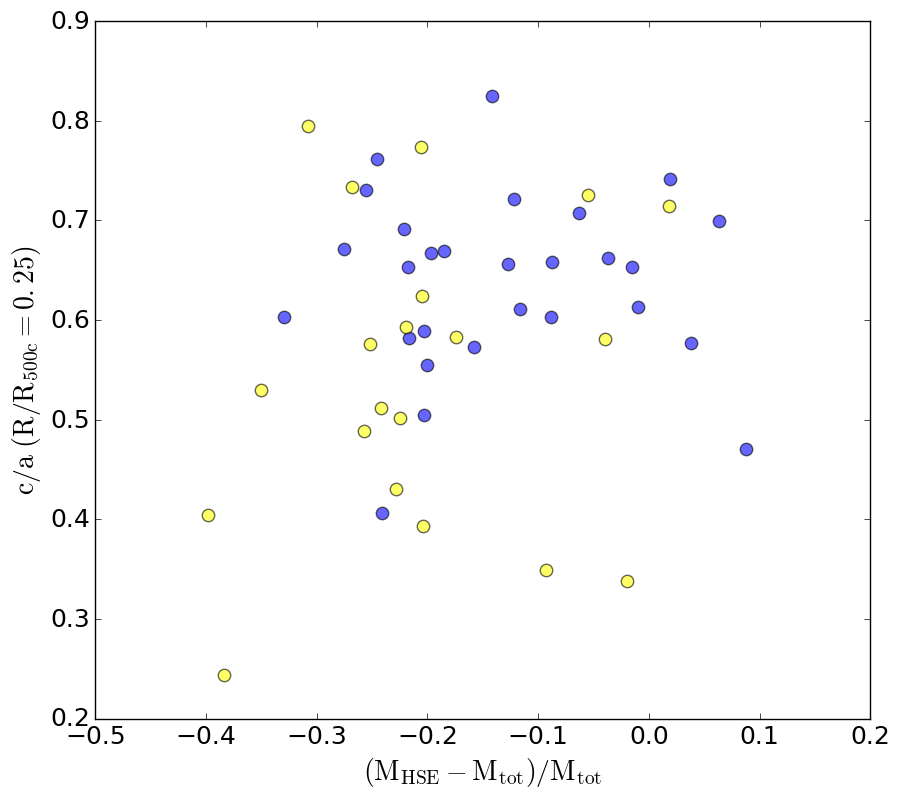

0.3
SpearmanrResult(correlation=0.0094940886995138942, pvalue=0.92530827103745361)


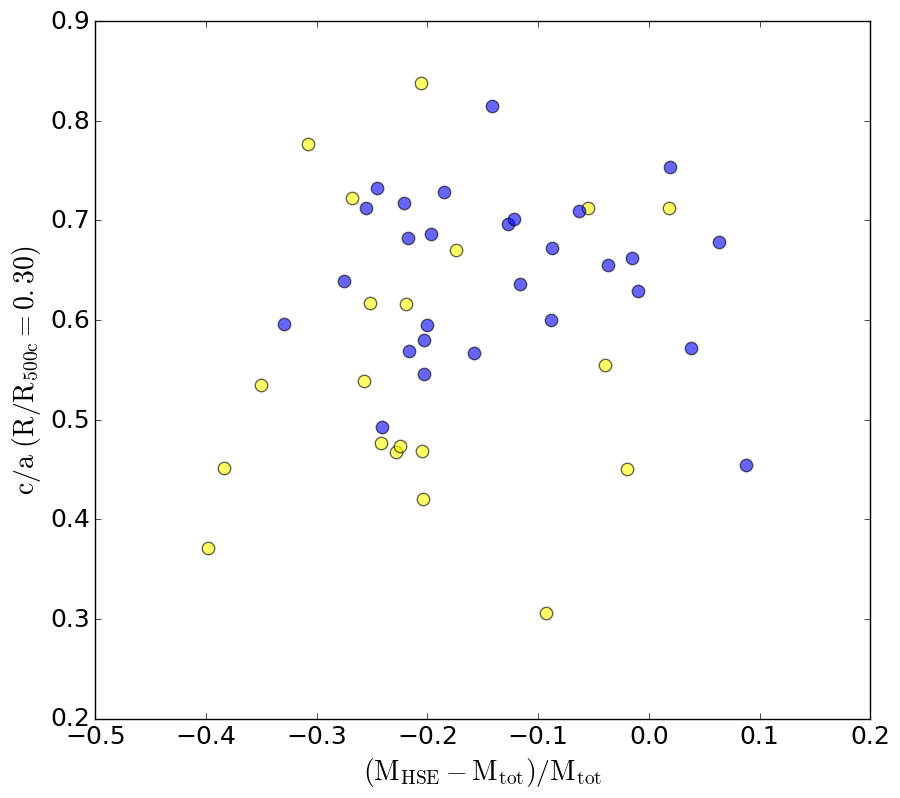

0.4
SpearmanrResult(correlation=0.071518377711393064, pvalue=0.4795053636979788)


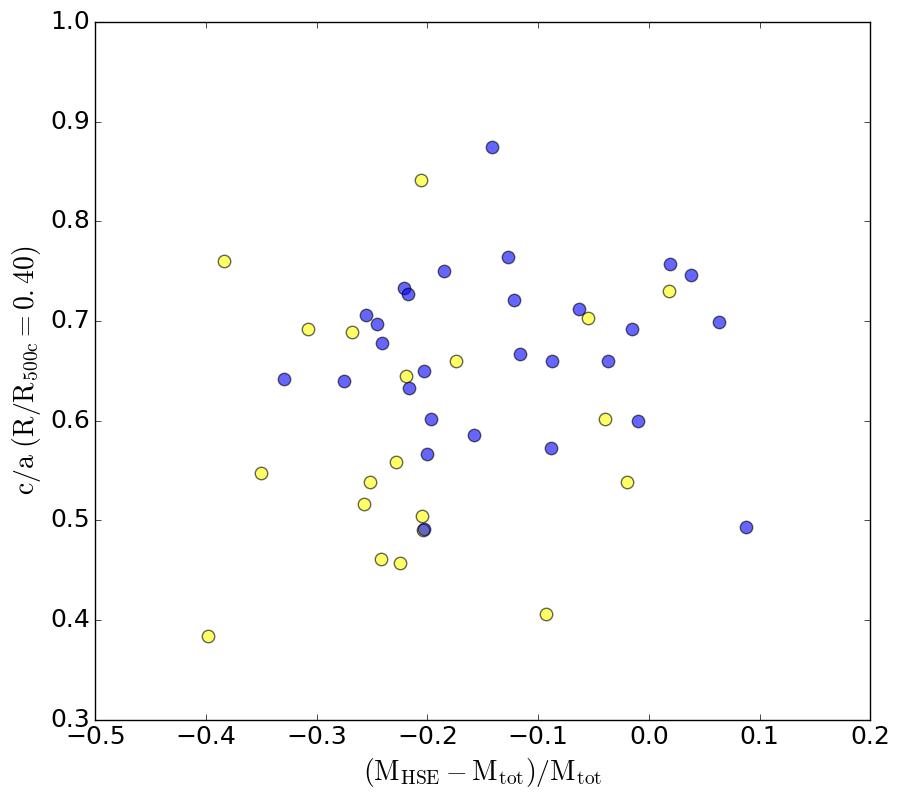

0.5
SpearmanrResult(correlation=0.10190241853207706, pvalue=0.31305061863021838)


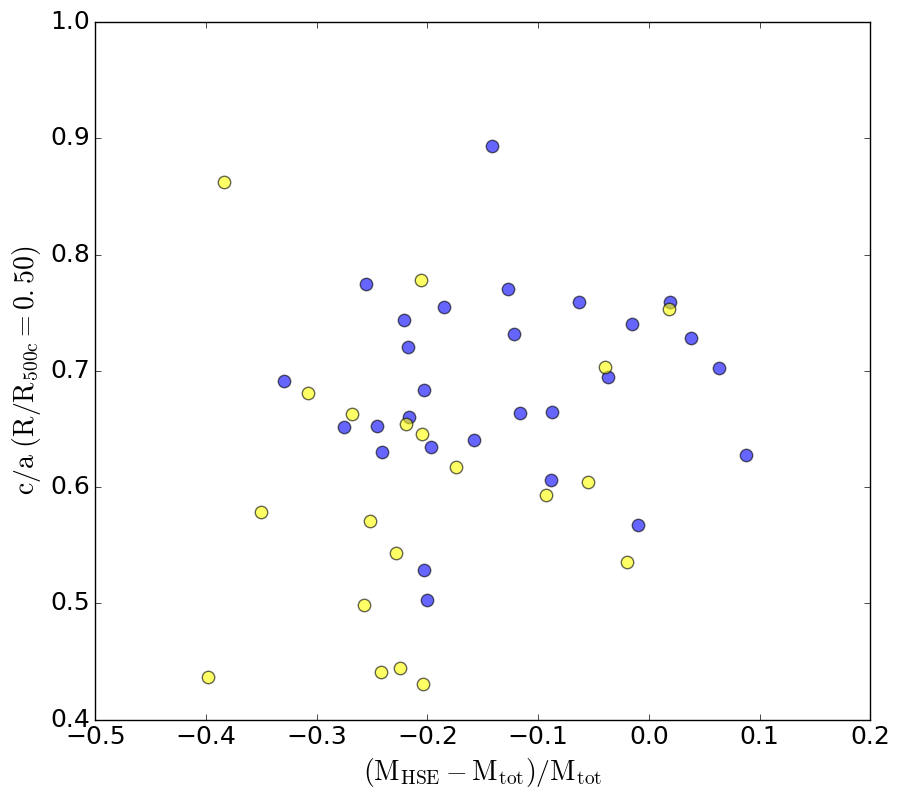

0.6
SpearmanrResult(correlation=0.1407189581707976, pvalue=0.16257694885202442)


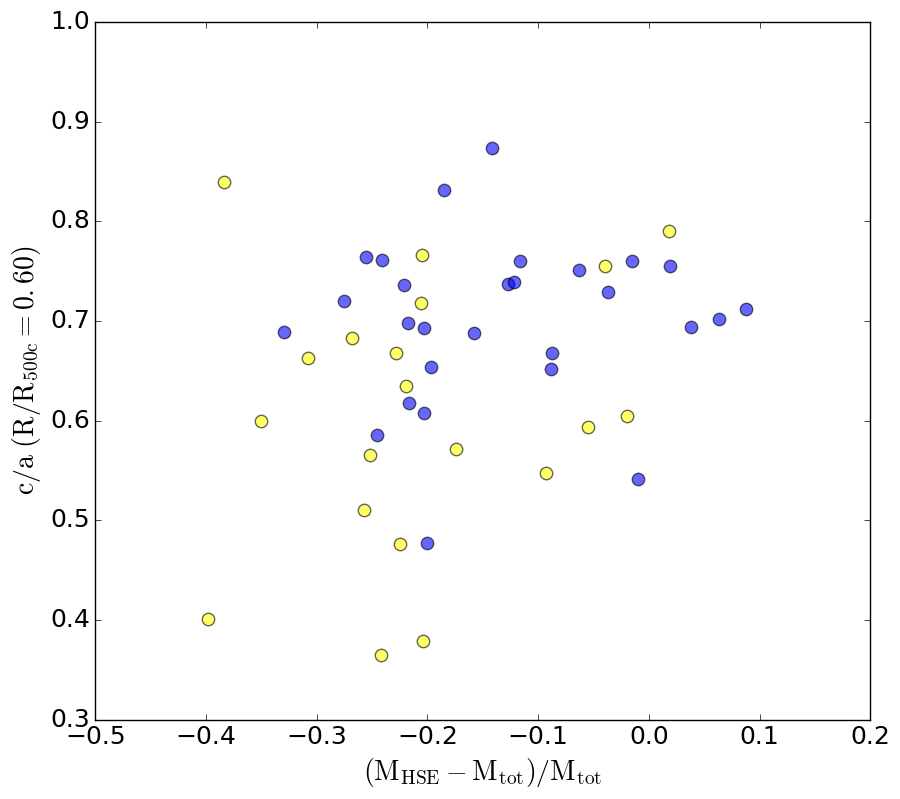

0.7
SpearmanrResult(correlation=0.12450339074596413, pvalue=0.21713237649962674)


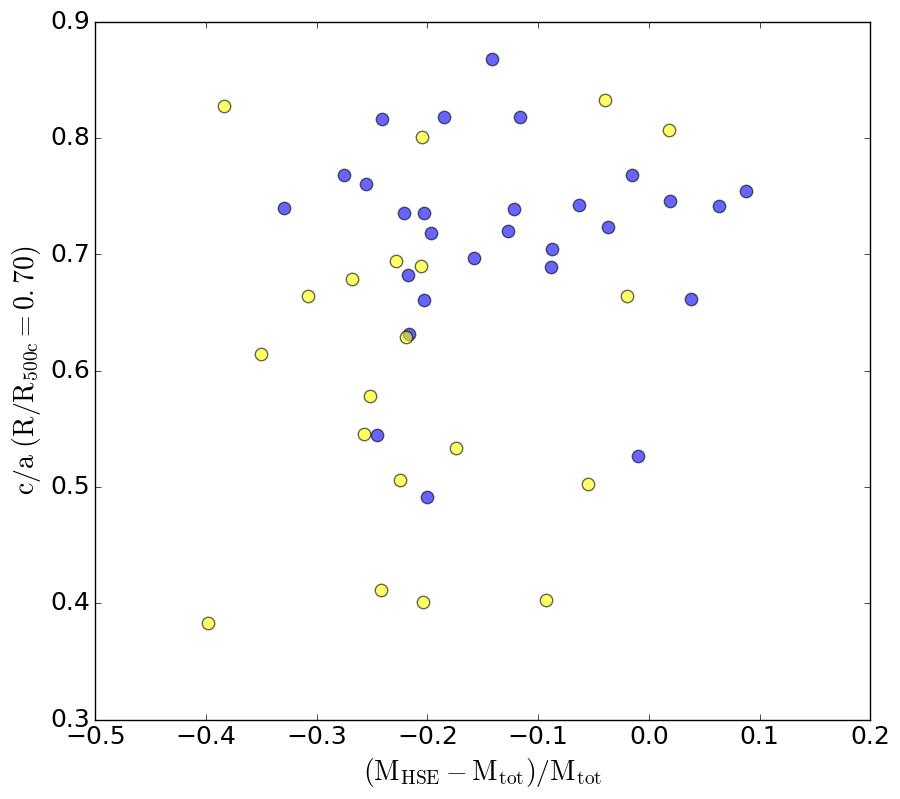

0.8
SpearmanrResult(correlation=0.082290103822841035, pvalue=0.41568112959132897)


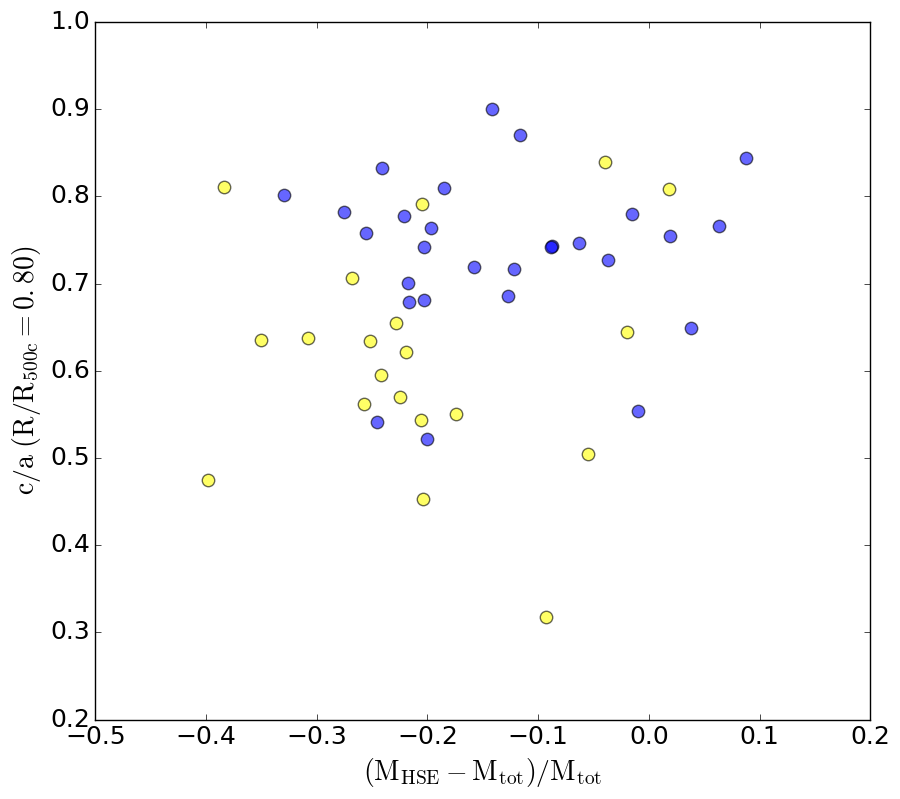

0.9
SpearmanrResult(correlation=0.16962182566788742, pvalue=0.091576118151746211)


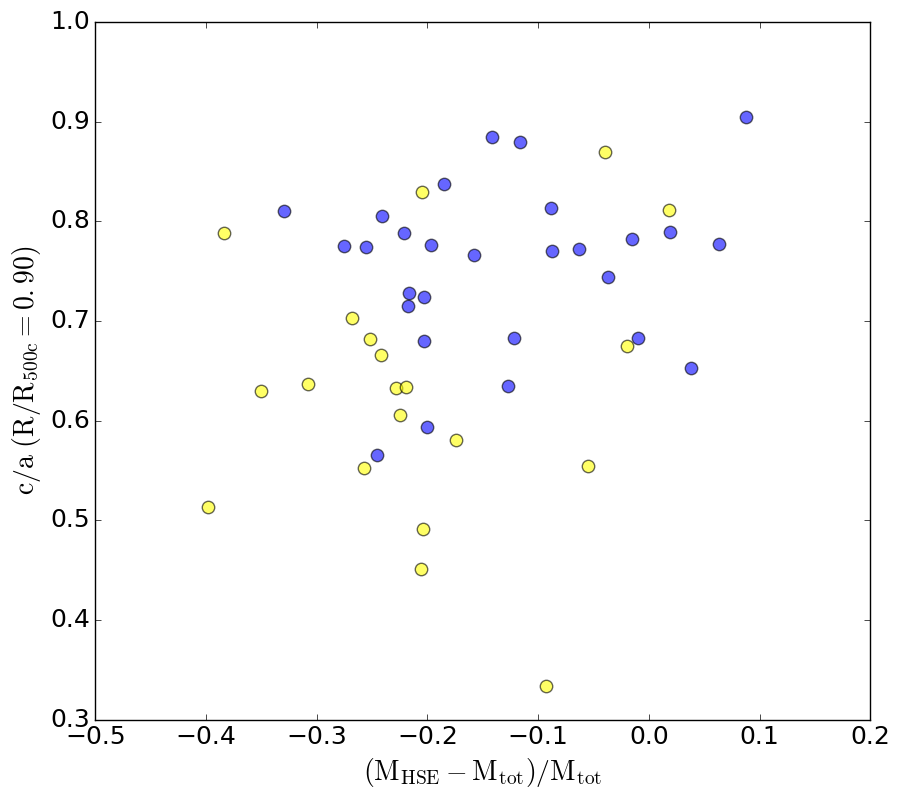

1.0
SpearmanrResult(correlation=0.29069195222949051, pvalue=0.0033461429070294462)


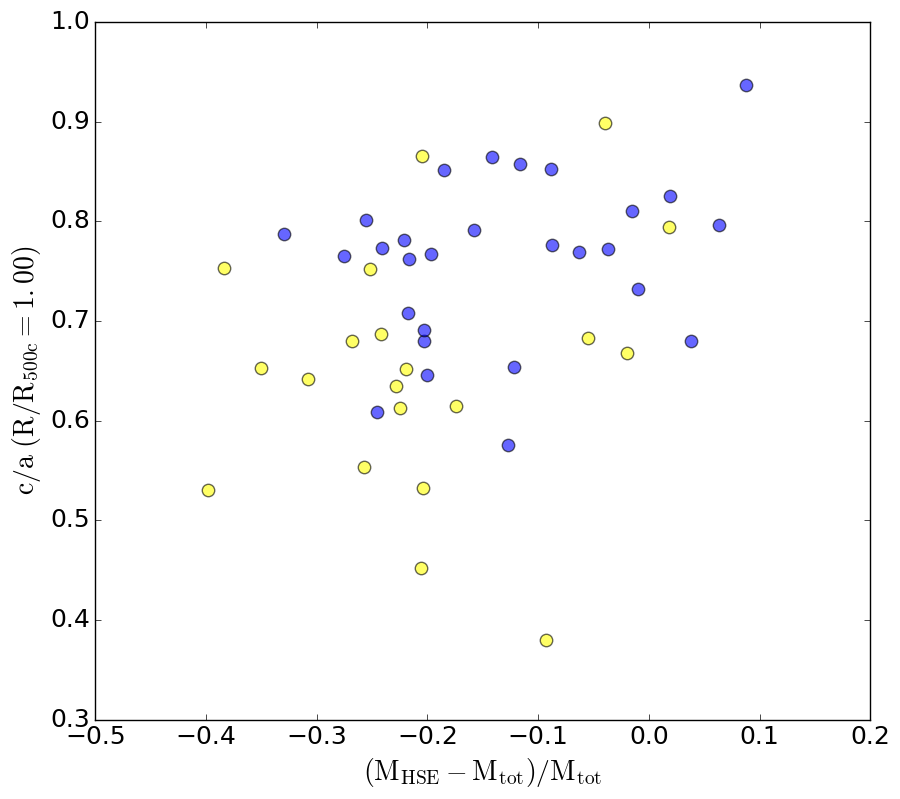

1.1
SpearmanrResult(correlation=0.32498739709953167, pvalue=0.00097013900438748936)


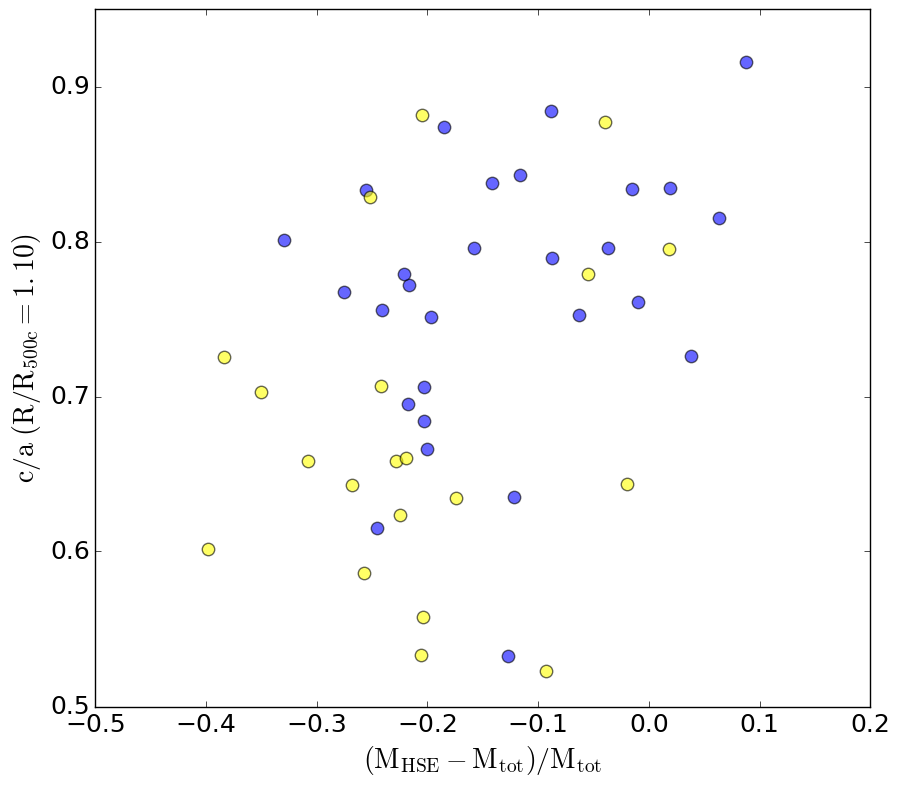

1.2
SpearmanrResult(correlation=0.38782932245093926, pvalue=6.6986021764543779e-05)


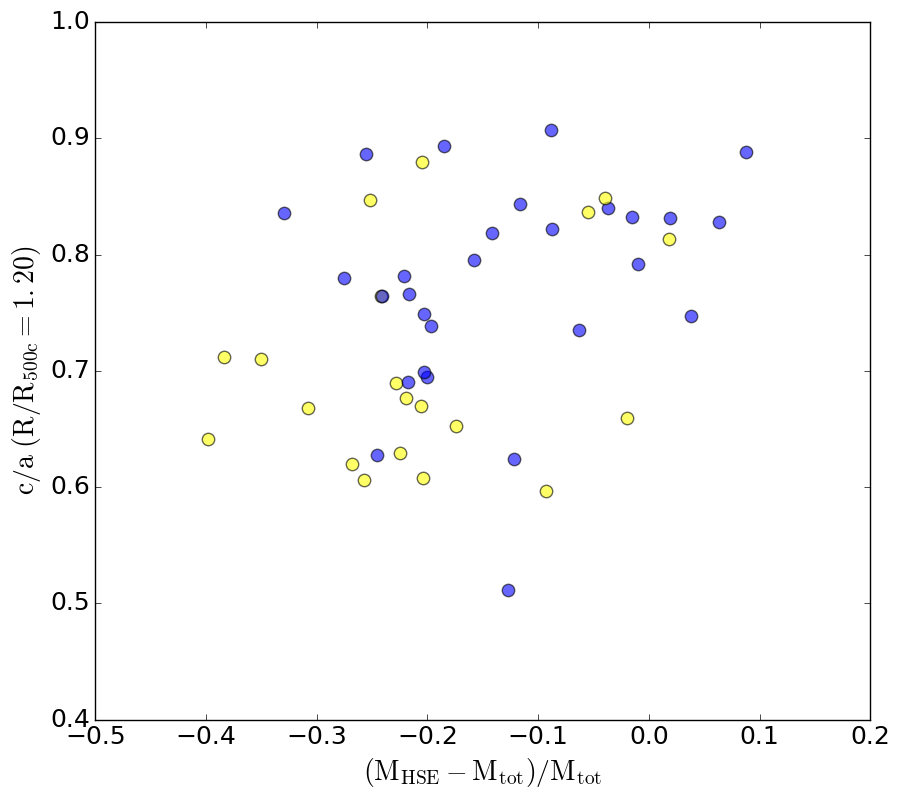

1.3
SpearmanrResult(correlation=0.45099921982836227, pvalue=2.4899284940438e-06)


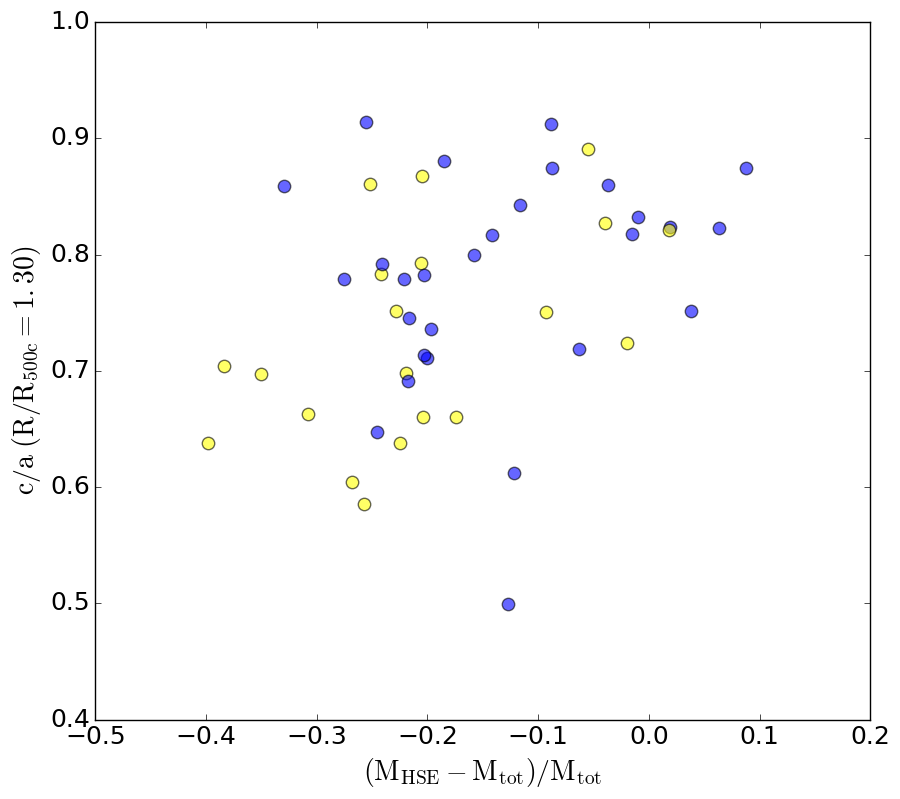

In [28]:
for ir in range(1,15):
    print rlist[ir]
    ell_r500c=allelldata[:,ir]
    ell_r500c_new=[]
    for ids in z0idnew:
        i=np.where(allz0id==ids)[0][0]
        ell_r500c_new.append(ell_r500c[i])
        
        
    spx=[]
    spy=[]
    plt.figure(figsize=(10,9))
    for isubsample,ids in enumerate(z0idnew):
        i=np.where(z0idnew==ids)[0][0]
        if ids in minormajormergerid:
            if ids in majormergerid:
                pass
#                 plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
            else:
                spx.append(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i])
                spy.append(ell_r500c_new[i])
                plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='yellow',s=80,alpha=0.6)
        else:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='b',s=80,alpha=0.6)

        txt=str(int(z0idnew[i])) 
    #     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
    #                      alpha=0.8,fontsize=16)
        spx.append(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i])
        spy.append(ell_r500c_new[i])
    print spearmanr(spx,spy)
    ax=plt.gca()

    change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

    plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
# plt.ylabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
    plt.ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
    plt.savefig('tmp'+str(ir)+'.png')
    plt.show()


# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
# plt.savefig('Mbias_DT.png')
# print spearmanr(spx,spy)
# plt.savefig('Mbias_ell.png')
# plt.show()

In [ ]:
spx=[]
spy=[]
plt.figure(figsize=(9,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
    if z0idnew[i]==82:
        plt.annotate(txt, (fnt[i],(np.log10(obs[i])-line[isubsample])),\
                     alpha=0.8,fontsize=16)
    spx.append(fnt[i])
    spy.append(np.log10(obs[i])-line[isubsample])
ax=plt.gca()

change_tick(ax)

plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r'$\rm Non-thermal \ Pressure \ Fraction$',fontsize=20)
plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('fnt_DT.png')
print spearmanr(spx,spy)
plt.show()

plt.figure(figsize=(9,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(Gamma_new[i],fnt[i],c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(Gamma_new[i],fnt[i],c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(Gamma_new[i],fnt[i],c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
#     if z0idnew[i]==82:
    plt.annotate(txt, (Gamma_new[i],fnt[i]),\
                     alpha=0.8,fontsize=16)
        
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
plt.ylabel(r'$\rm Non-thermal \ Pressure \ Fraction$',fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('fnt_Gamma.png')
print spearmanr(spx,spy)
plt.show()

SpearmanrResult(correlation=0.13220815752461321, pvalue=0.24238964585049158)


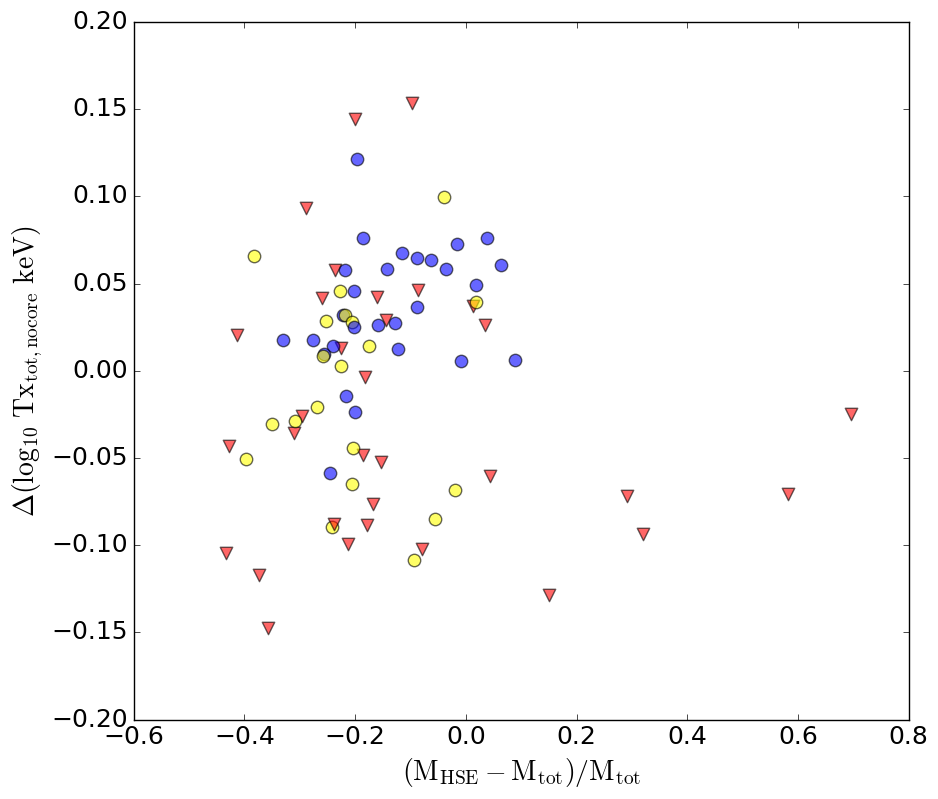

In [26]:
spx=[]
spy=[]
plt.figure(figsize=(10,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample]),c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
#                      alpha=0.8,fontsize=16)
    spx.append(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i])
    spy.append((np.log10(obs[i])-line[isubsample]))
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('Mbias_DT.png')
print spearmanr(spx,spy)
plt.show()

SpearmanrResult(correlation=-0.16612751992498831, pvalue=0.14081600831109287)


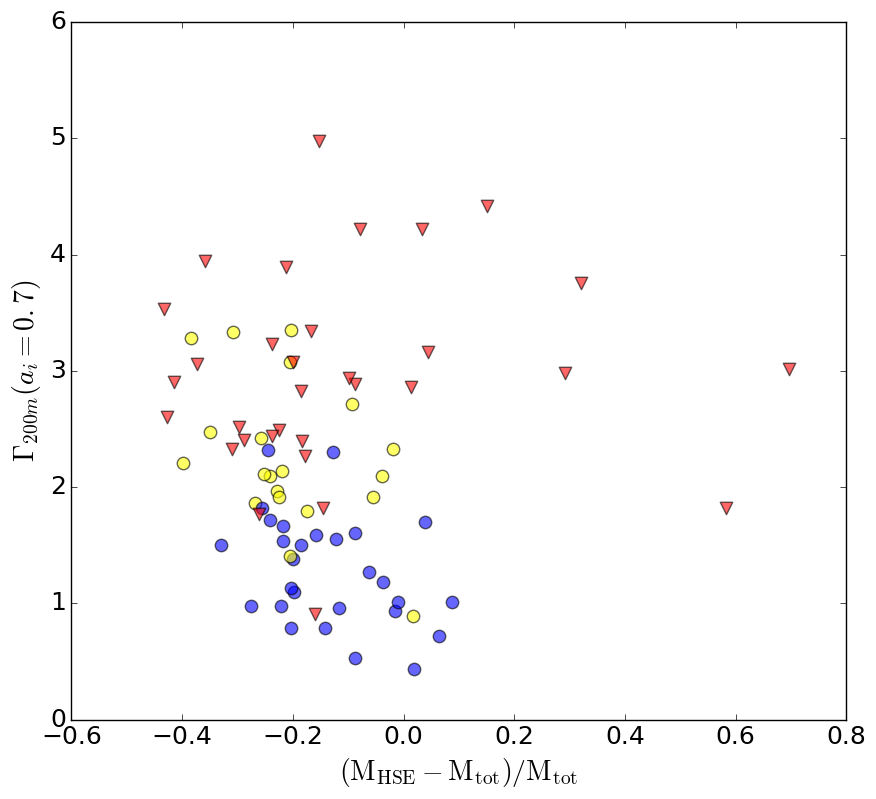

In [83]:
spx=[]
spy=[]
plt.figure(figsize=(10,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],Gamma_new[i],c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],Gamma_new[i],c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],Gamma_new[i],c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
#                      alpha=0.8,fontsize=16)
    spx.append(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i])
    spy.append(Gamma_new[i])
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
plt.ylabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)


# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
# plt.savefig('Mbias_DT.png')
print spearmanr(spx,spy)
plt.savefig('Mbias_Gamma.png')
plt.show()

SpearmanrResult(correlation=0.075996249413970943, pvalue=0.50285584651349446)


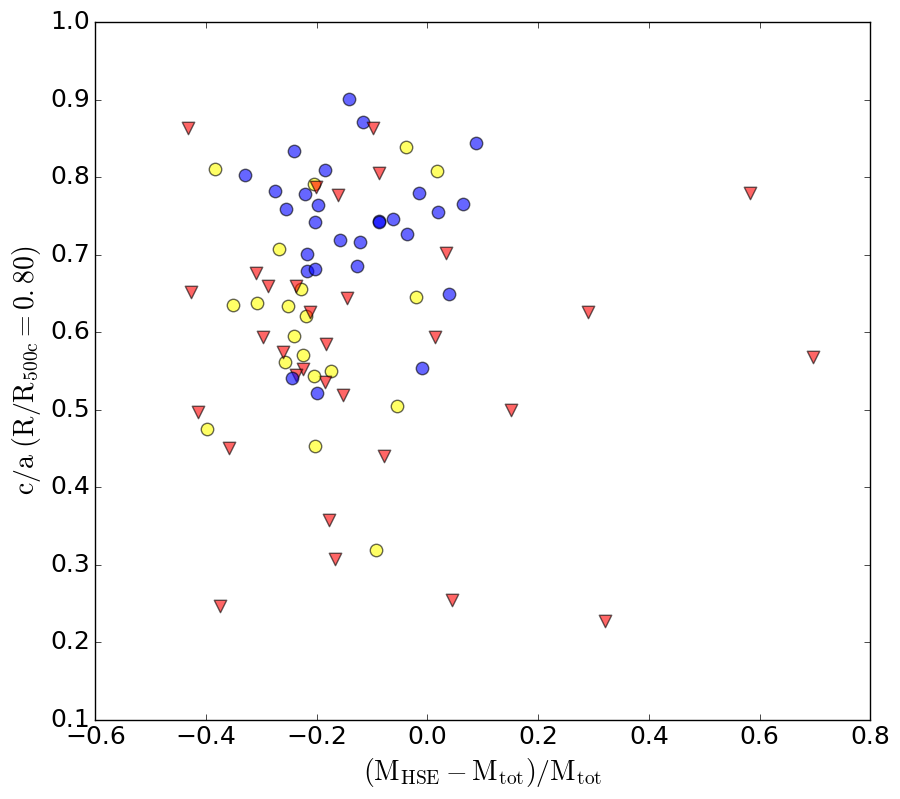

In [22]:
spx=[]
spy=[]
plt.figure(figsize=(10,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],ell_r500c_new[i],c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
#     plt.annotate(txt, (((Mhse500c-Mtot500c_new)/Mtot500c_new)[i],(np.log10(obs[i])-line[isubsample])),\
#                      alpha=0.8,fontsize=16)
    spx.append(((Mhse500c-Mtot500c_new)/Mtot500c_new)[i])
    spy.append(ell_r500c_new[i])
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))

plt.xlabel(r'$\rm (M_{HSE}-M_{tot})/M_{tot}$',fontsize=20)
# plt.ylabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)
plt.ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)



# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
# plt.savefig('Mbias_DT.png')
print spearmanr(spx,spy)
plt.savefig('Mbias_ell.png')
plt.show()

SpearmanrResult(correlation=-0.33617365419156459, pvalue=0.0022978611449460148)


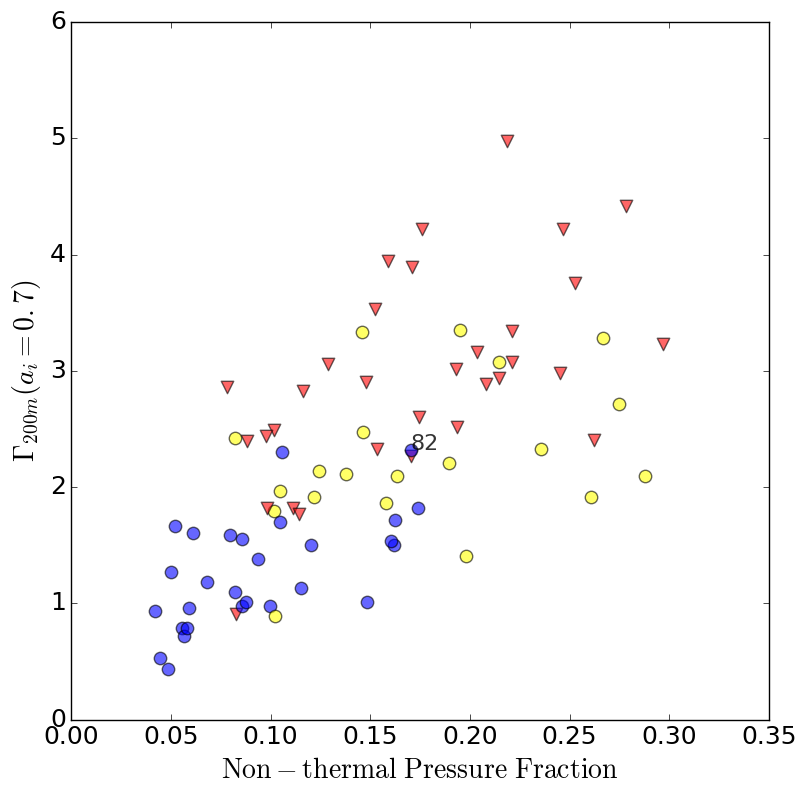

In [21]:
# plt.figure(figsize=(9,9))
# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
#     if ids in minormajormergerid:
#         if ids in majormergerid:
#             plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=80,alpha=0.6)
#         else:
#             plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=80,alpha=0.6)
#     else:
#         plt.scatter(ell_r500c_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=80,alpha=0.6)
        
#     txt=str(int(z0idnew[i])) 
#     if z0idnew[i]==82:
#         plt.annotate(txt, (ell_r500c_new[i],(np.log10(obs[i])-line[isubsample])),\
#                      alpha=0.8,fontsize=16)

spx=[]
spy=[]
plt.figure(figsize=(9,9))
for isubsample,ids in enumerate(z0idnew):
    i=np.where(z0idnew==ids)[0][0]
    if ids in minormajormergerid:
        if ids in majormergerid:
            plt.scatter(fnt[i],Gamma_new[i],c='r',marker='v',s=80,alpha=0.6)
        else:
            plt.scatter(fnt[i],Gamma_new[i],c='yellow',s=80,alpha=0.6)
    else:
        plt.scatter(fnt[i],Gamma_new[i],c='b',s=80,alpha=0.6)
        
    txt=str(int(z0idnew[i])) 
    if z0idnew[i]==82:
        plt.annotate(txt, (fnt[i],Gamma_new[i]),\
                     alpha=0.8,fontsize=16)
    
    spx.append(fnt[i])
    spy.append(ell_r500c_new[i])
print spearmanr(spx,spy)

        
ax=plt.gca()

change_tick(ax)

# plt.yticks(np.arange(-0.2,0.2,0.1))



plt.xlabel(r'$\rm Non-thermal \ Pressure \ Fraction$',fontsize=20)
# plt.ylabel(r'$\rm c/a \ (R/R_{500c}=%.2f)$'%(rlist[ir]),fontsize=20)
plt.ylabel(r"$\Gamma_{200m}(a_i=0.7)$",fontsize=20)



# plt.ylabel(r'$\rm \Delta ( log_{10} \ %s \ %s) $'%(obsstr,unitstr),fontsize=20)

# for isubsample,ids in enumerate(z0idnew):
#     i=np.where(z0idnew==ids)[0][0]
# #     if ids in minormajormergerid:
# #         if ids in majormergerid:
#     plt.scatter(fnt[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
    
#     spx.append(fnt[i])
#     spy.append(np.log10(obs[i])-line[isubsample])
plt.savefig('Gamma_fnt.png')
plt.show()

In [37]:
print minormajormergerid

[  4   5   7   9  10  11  13  17  19  23  25  31  33  34  35  45  49  50
  53  55  59  61  63  66  68  71  73  77  78  79  80  81  88  91  96  98
 106 108 118 125 131 132 138 146 153 156 161 201 217 221 248 250 284 298
 434 471]


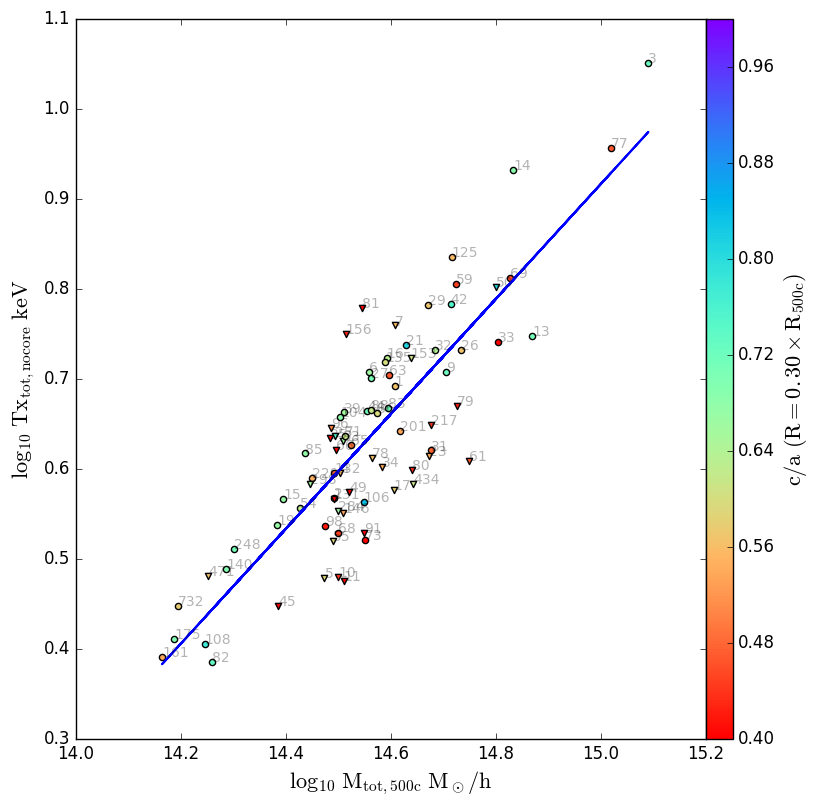

In [38]:

fig=plt.figure(figsize=(9,9))
ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
ax.plot(np.log10(M), line)

cnormell=colors.Normalize(vmin=0.4,vmax=1)
scalarmapell=cm.ScalarMappable(norm=cnormell,cmap=cm.rainbow_r)
cmap=cm.rainbow_r

# xlabels=dict(zip([Massdef,obstr],['M_{HSE,500c}',]))
for ids in z0idnew:
    i=np.where(z0idnew==ids)[0][0]
    color=scalarmapell.to_rgba(ell_r500c_new[i])
    if ell_r500c_new[i]>0:
        if ids in majormergerid:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v')
        else:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color)
    txt=str(int(z0idnew[i])) 
    ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)

# plt.xlabel(r'$\rm log10 \ %s \ Msun/h$'%(Massdef))
plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef))

plt.ylabel(r'$\rm log_{10} \ %s \ %s$'%(obsstr,unitstr))
colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormell)
colorb_ax.set_ylabel(r'$\rm c/a \ (R=%.2f \times R_{500c})$'%(rlist[ir]))
plt.savefig('scaling_'+Massdef+'_'+obsstr+'_color_ell.png')
plt.show()



default definition is M_total_200m


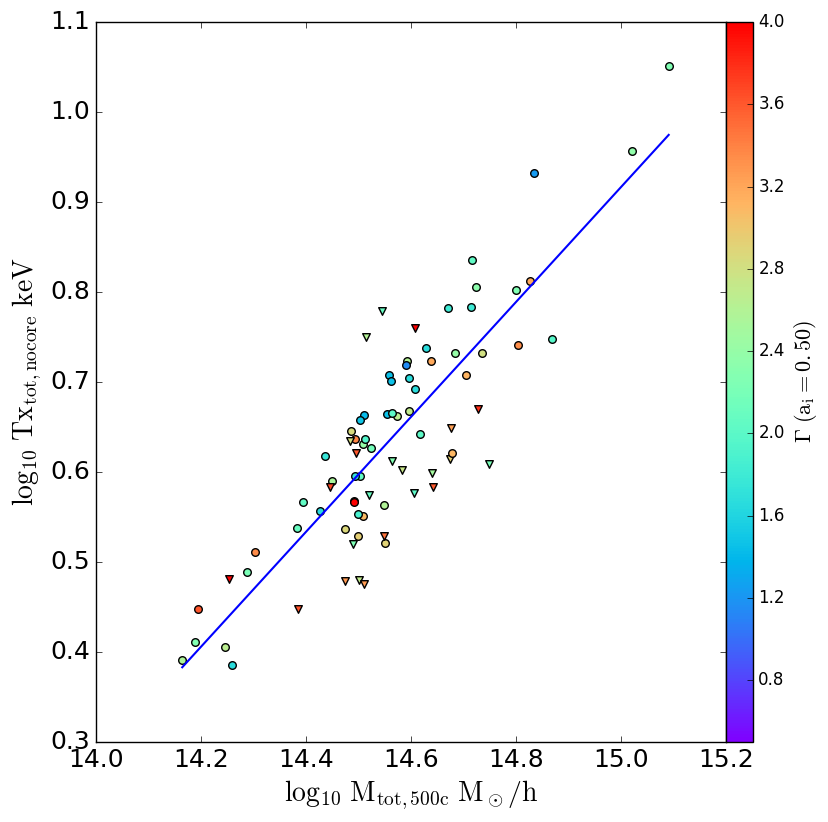

0.5 SpearmanrResult(correlation=-0.36458040318799817, pvalue=0.00088479886722390587)


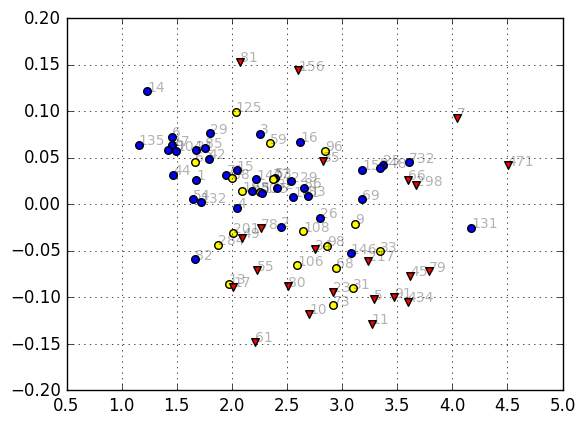

default definition is M_total_200m


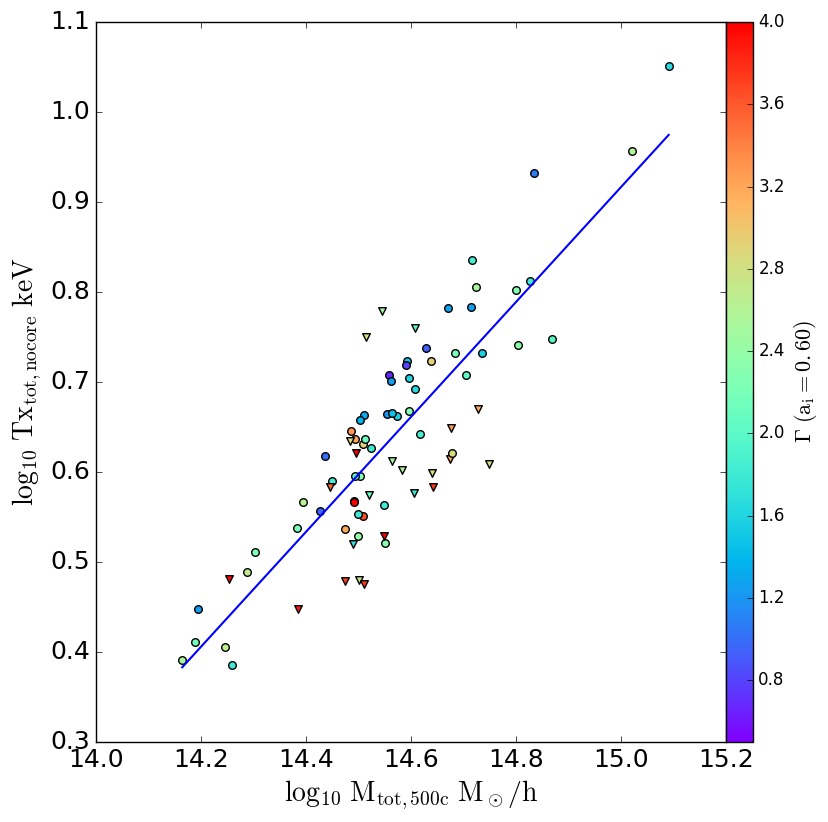

0.6 SpearmanrResult(correlation=-0.44064697609001413, pvalue=4.3022483026860516e-05)


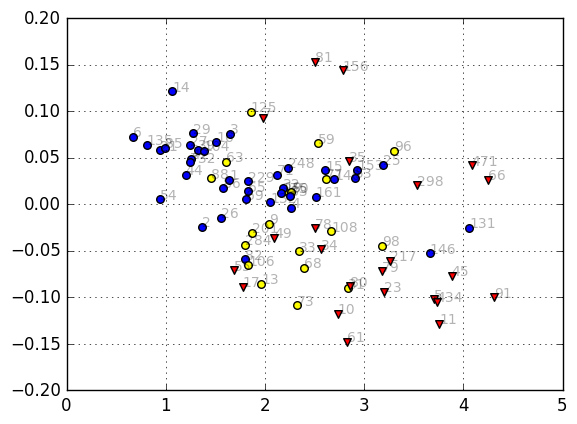

default definition is M_total_200m


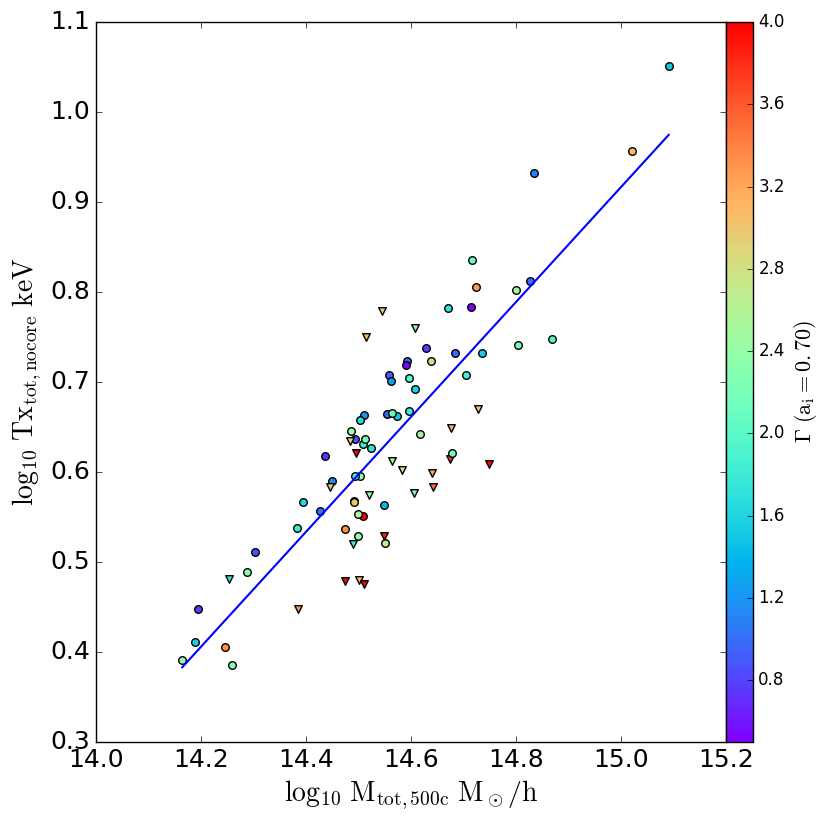

0.7 SpearmanrResult(correlation=-0.52283169245194561, pvalue=6.5213691747021081e-07)


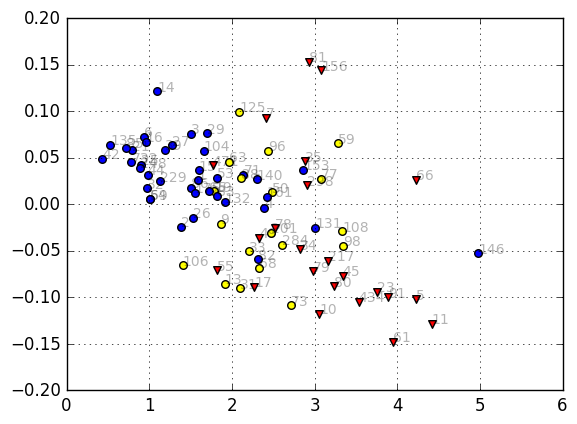

default definition is M_total_200m


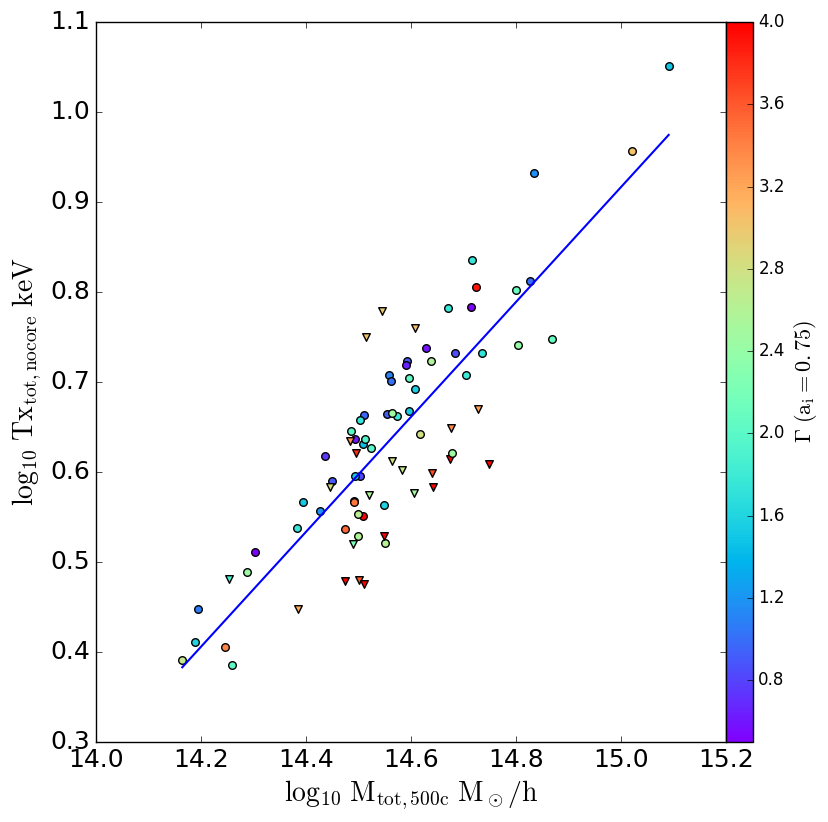

0.75 SpearmanrResult(correlation=-0.53844350679793718, pvalue=2.5815736099281138e-07)


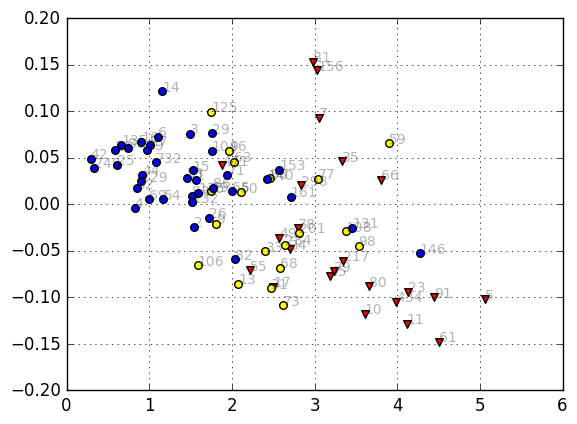

default definition is M_total_200m


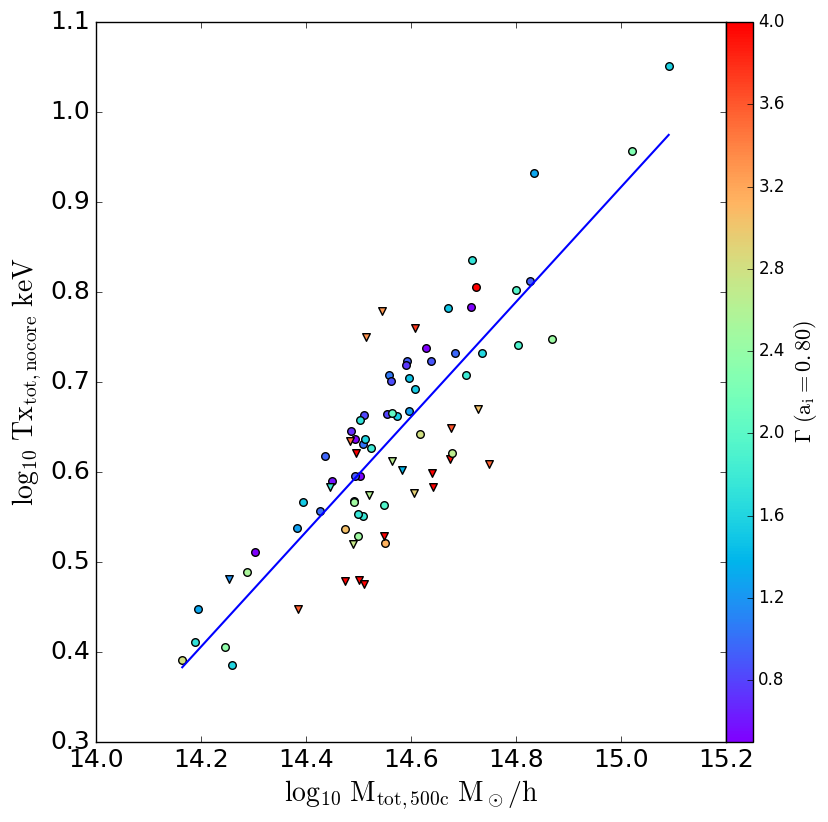

0.8 SpearmanrResult(correlation=-0.53216127519924994, pvalue=3.7693569464540187e-07)


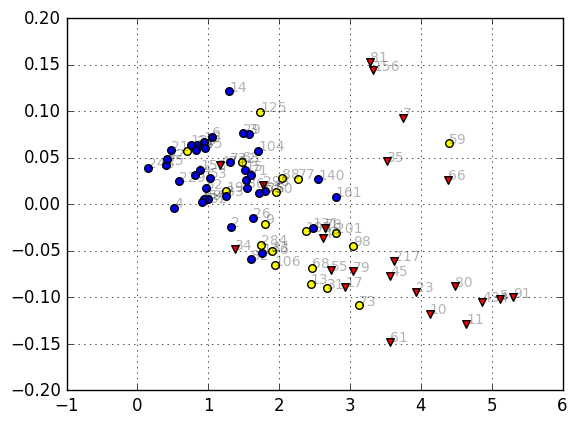

default definition is M_total_200m


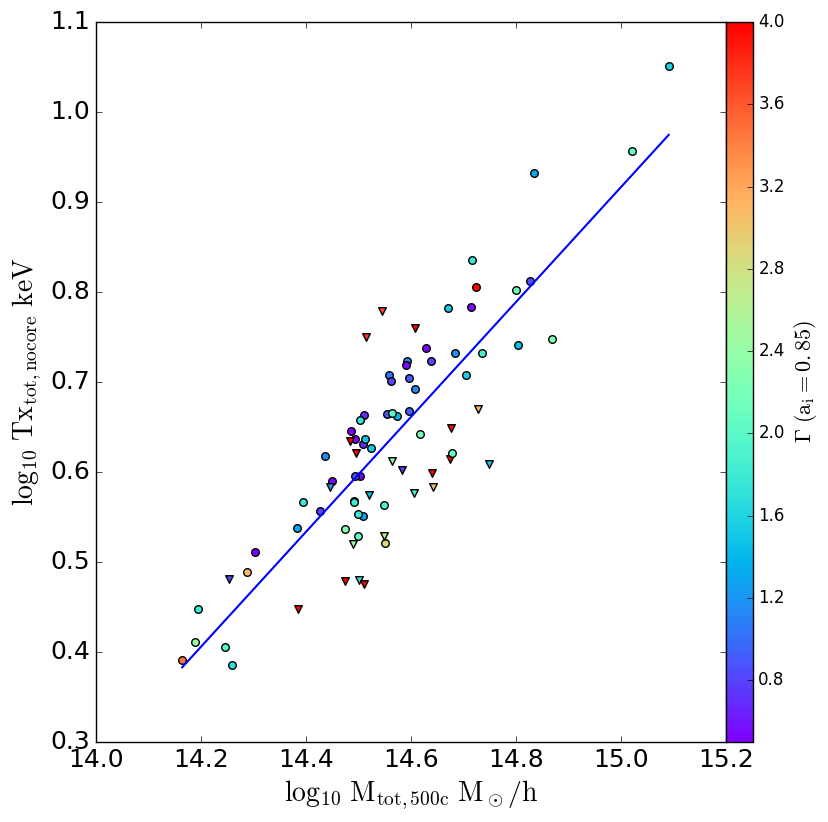

0.85 SpearmanrResult(correlation=-0.37294889826535399, pvalue=0.00065666382596836731)


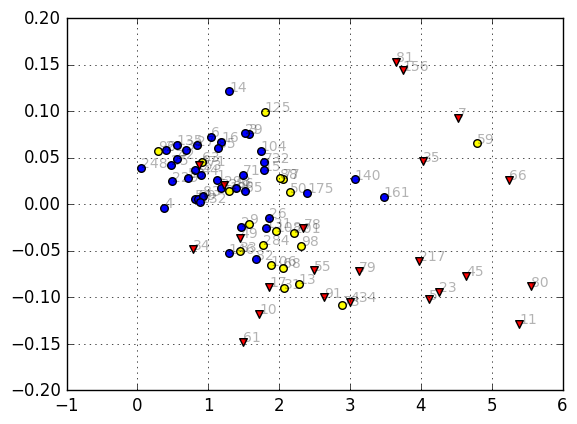

default definition is M_total_200m


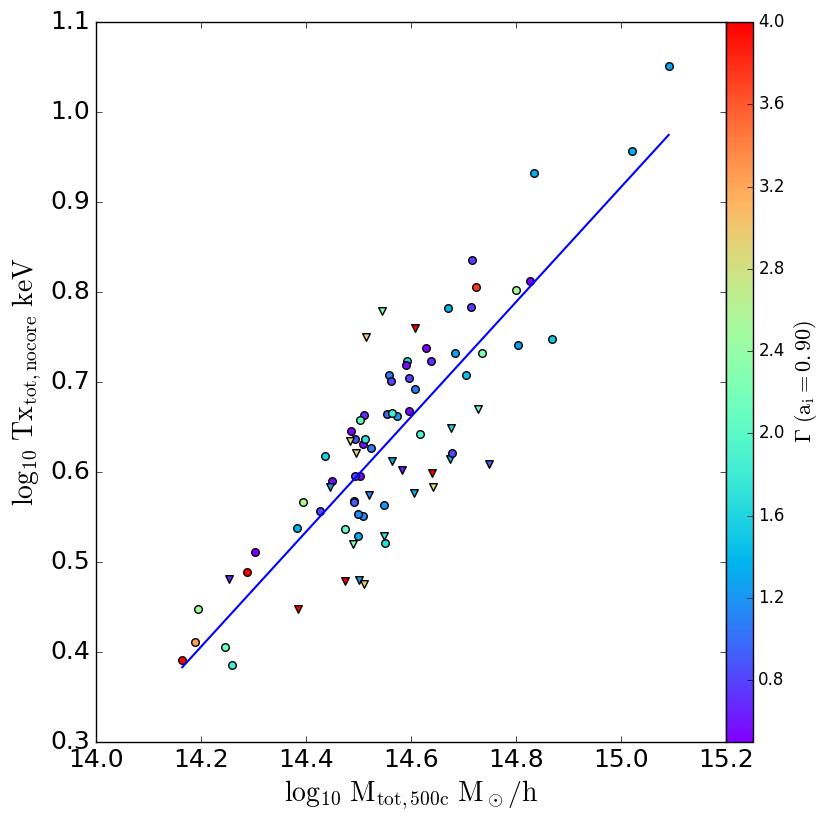

0.9 SpearmanrResult(correlation=-0.1775199249882794, pvalue=0.11517863542729714)


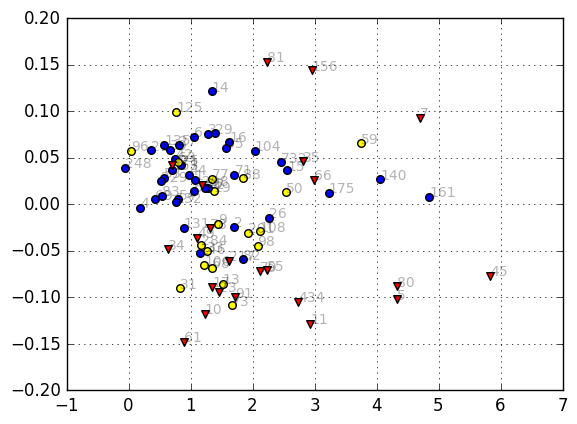

In [82]:
for a in [0.5,0.6,0.7,0.75,0.8,0.85,0.9]:
    acutgamma=a
    Gamma=calc_Gamma(acutgamma,Mdef='M_total_200m')
    Gamma_new=[]
    for ids in z0idnew:
    #old database
        i=np.where(allz0id==ids)[0][0]
        Gamma_new.append(Gamma[i])
    M=np.array(M)
    slope, intercept, r_value, p_value, std_err = \
        stats.linregress(np.log10(M),np.log10(obs))
#     print 'slope=',slope
#     print 'intercept=',intercept
#     print 'correlation r_value=',r_value
#     print 'p_value=',p_value
#     print 'Standard error of the estimated gradient=',std_err
#     line = slope*np.log10(M)+intercept
#     print 'scatter from best-fit=', (np.sum(((np.log10(obs)-line))**2)/(len(obs)-2))**0.5



    fig=plt.figure(figsize=(9,9))
    ax=fig.add_axes([0.15, 0.1, 0.7, 0.8])
    # ax.plot(np.log10(M), line)
    tm=np.array([M.min(),M.max()])
    pltline = slope*np.log10(tm)+intercept
    ax.plot(np.log10(tm), pltline)

    change_tick(ax)
    # ax.plot(np.log10(Mtot[filter_relax]), line_exmajor,'.')


    cnormgamma=colors.Normalize(vmin=0.5,vmax=4)
    scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)
    cmap='rainbow'

    for ids in z0idnew:
        i=np.where(z0idnew==ids)[0][0]
        color=scalarmapgamma.to_rgba(Gamma_new[i])
        if ids in majormergerid:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,marker='v',s=30)
        else:
            ax.scatter(np.log10(M[i]),np.log10(obs[i]),c=color,s=30)
        txt=str(int(z0idnew[i])) 
    #     ax.annotate(txt, (np.log10(M[i]),np.log10(obs[i])),alpha=0.3)
    # plt.xlim(14.0,15.2)
    plt.xlabel(r'$\rm log_{10} \ %s \ M_\odot/h$'%(Massdef),fontsize=20)

    plt.ylabel(r'$\rm log_{10} \ %s  \ %s $'%(obsstr,unitstr),fontsize=20)

    colorb_ax = fig.add_axes([0.85, 0.1, 0.03, 0.8])
    matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
    colorb_ax.set_ylabel(r'$\rm \Gamma \ (a_i= %.2f)$'%(np.around(a,decimals=2)))

    plt.show()

    spx=[]
    spy=[]
    for isubsample,ids in enumerate(z0idnew):
        i=np.where(z0idnew==ids)[0][0]
        if ids in minormajormergerid:
            if ids in majormergerid:
                plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='r',marker='v',s=30)
            else:
                plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='yellow',s=30)
        else:
            plt.scatter(Gamma_new[i],(np.log10(obs[i])-line[isubsample]),c='b',s=30)
        txt=str(int(z0idnew[i])) 
        plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3)
    #     if z0idnew[i]==83:
    #         plt.annotate(txt, (Gamma_new[i],(np.log10(obs[i])-line[isubsample])),alpha=0.3,fontsize=30)
        spx.append(Gamma_new[i])
        spy.append(np.log10(obs[i])-line[isubsample])

    print a,spearmanr(spx,spy)
    plt.grid()

    plt.show()

### load observable

#### load ell at a certain radius

In [205]:
ir=9
print rlist[ir]
ell_r500c=allelldata[:,ir]

0.8


### plot relation between Gamma and Scatter

#### choose Mass definition

#### Fit Mtot and observable